# Name: Hanan Fared Mohamed Omara , ID =  20398559

## Q1  Describe how you want to make use of merchants.csv, historical transactions.csv, and new merchant transactions.csv, for user loyalty prediction. Note, this is a very important question, you may want to update your whole pipeline multiple times to find the best usage of three files.

- After multiple times to find the best usage of files, i found data is very very big especially` historical transactions dataset` so i decided to deal Individually with every dataframe and clean it very well then join them together.
    - Because the historical transactions dataframe and new merchant transactions have the same columns ,i join them using `concat` on `card_id` col and called the new dataframe "result"
    - Then join the result dataframe with userscore dataframe using ` inner merge` on`card_id` col and called the dataframe "data".
    - Then join the result dataframe with merchants dataframe using ` inner merge` on`merchant_id` col and called the dataframe "total_data"which is the final dataframe we will train the model on it after ensuring the cleaning and quality of it .
    - the below code show all steps to clean the datasets well and also how join them together.

## Q2 Discuss the quality of the dataset, considering missing values, missing value patterns, missing value mechanism, and noise (e.g.,consistency). Note, you do not need to discuss each attribute in each table. Focus on the ones you believe are the most important for user (card) loyalty analysis and prediction.

- As I mention before i deal Individually with every dataframe and clean it very well, considering removing null values through imputation or drop the columns also remove noise through removing the outliers or any other noise , also ensuring the consistency of data in  the same columns in different dataframe like `category_1 and category_2` in each historical transactions dataframe and new merchant transactions dataframe have the same values so they achive the consistency of data.


## Q3 Perform necessary data cleaning based on your answer to Q2

- Yes, I perfom all necessary data cleaning on each dataframe , as the code below show that.

## Import Libraries

In [ ]:
# import the libraries you need, make sure they are installed within your Python env
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import plotly.express as px
!pip install missingno
import missingno as msno
from scipy.stats import skew, norm
from scipy import stats
from sklearn.model_selection import train_test_split
!pip install yellowbrick
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#here error appears so i will install this package first
!pip install cliffs_delta
from cliffs_delta import cliffs_delta

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
# import libraries
import pandas as pd
# use the following to suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower, TTestPower

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.options.display.width = None

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_lg-0.4.0.tar.gz


  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_lg-0.4.0.tar.gz (538.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [ ]:
!pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from IPython.utils import io
# with io.capture_output() as captured:
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_lg-0.4.0.tar.gz
# !pip install en_core_sci_lg
import en_core_sci_lg  # import downlaoded model
import string
!pip install minisom
from minisom import MiniSom
from sklearn.cluster import SpectralClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS

## Load  historical_transactions dataset

In [ ]:
#load the historical_transactions dataset to our notebook
historical = pd.read_csv('historical_transactions.csv')

In [ ]:
#show the first 10 rows in data
historical.head(10)
# we can also check the end of the table, why this might help? because sometimes there would be extra content provided by the data author at the end of the table and you keep that as part of the da
historical.tail(10)
historical.info()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703,2017-06-25 15:33:07,1.000,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733,2017-07-15 12:10:45,1.000,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720,2017-08-09 22:04:29,1.000,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735,2017-09-02 10:06:26,1.000,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.723,2017-03-10 01:14:19,1.000,16,37
5,Y,C_ID_4e6213e9bc,333,N,0,A,80,M_ID_50af771f8d,0,-0.735,2018-02-24 08:45:05,1.000,9,37
6,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-11,-0.717,2017-03-21 00:10:51,1.000,16,37
7,Y,C_ID_4e6213e9bc,3,N,0,A,80,M_ID_9d41786a50,-3,-0.657,2017-11-18 20:05:55,1.000,16,37
8,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-8,-0.738,2017-06-01 22:02:56,1.000,16,37
9,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_74ba14b5fc,-11,-0.715,2017-03-16 15:41:22,1.000,16,37


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
29112351,Y,C_ID_62df280b20,168,N,2,C,506,M_ID_aa18020893,-3,-0.613,2017-08-29 11:43:46,1.000,9,30
29112352,Y,C_ID_62df280b20,24,N,3,C,87,M_ID_94f6f392c4,-3,-0.459,2017-08-29 11:28:25,1.000,9,27
29112353,Y,C_ID_e49b1996b0,11,N,1,B,705,M_ID_b692f6f5d1,-2,-0.619,2017-12-29 14:43:53,2.000,23,33
29112354,Y,C_ID_e49b1996b0,-1,Y,1,B,550,M_ID_09d7a200d1,-1,-0.657,2018-01-23 01:52:28,NaN,-1,3
29112355,Y,C_ID_e49b1996b0,11,N,1,B,130,M_ID_ea5d727248,0,-0.694,2018-02-07 18:17:01,2.000,23,41
29112356,Y,C_ID_2863d2fa95,-1,Y,1,B,360,M_ID_edd92b6720,-1,-0.633,2017-01-20 08:52:04,NaN,-1,34
29112357,Y,C_ID_2863d2fa95,-1,Y,1,B,360,M_ID_edd92b6720,0,-0.633,2017-02-20 04:40:50,NaN,-1,34
29112358,Y,C_ID_5c240d6e3c,3,N,0,A,278,M_ID_9cdcfe8673,0,-0.658,2017-12-26 18:37:51,1.000,16,37
29112359,Y,C_ID_5c240d6e3c,331,N,0,A,514,M_ID_1a75f94f92,-1,0.771,2017-11-24 14:18:15,1.000,16,9
29112360,Y,C_ID_5c240d6e3c,331,N,0,A,514,M_ID_1a75f94f92,-2,1.134,2017-10-26 14:09:40,1.000,16,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


In [ ]:
historical.describe()
historical.describe(include="all")

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,29112361.000,29112361.000,29112361.000,29112361.000,29112361.000,26459497.000,29112361.000,29112361.000
mean,129.326,0.648,481.013,-4.487,0.036,2.195,10.567,26.848
std,104.256,2.796,249.376,3.589,1123.522,1.532,6.367,9.693
min,-1.000,-1.000,-1.000,-13.000,-0.747,1.000,-1.000,-1.000
25%,53.000,0.000,307.000,-7.000,-0.720,1.000,9.000,19.000
50%,90.000,0.000,454.000,-4.000,-0.688,1.000,9.000,29.000
75%,212.000,1.000,705.000,-2.000,-0.603,3.000,16.000,34.000
max,347.000,999.000,891.000,0.000,6010603.972,5.000,24.000,41.000


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
count,29112361,29112361,29112361.000,29112361,29112361.000,28934202,29112361.000,28973880,29112361.000,29112361.000,29112361,26459497.000,29112361.000,29112361.000
unique,2,325540,NaN,2,NaN,3,NaN,326311,NaN,NaN,16395300,NaN,NaN,NaN
top,Y,C_ID_3d3dfdc692,NaN,N,NaN,A,NaN,M_ID_00a6ca8a8a,NaN,NaN,2017-11-24 00:00:00,NaN,NaN,NaN
freq,26595452,5582,NaN,27028332,NaN,15411747,NaN,1115097,NaN,NaN,26184,NaN,NaN,NaN
mean,NaN,NaN,129.326,NaN,0.648,NaN,481.013,NaN,-4.487,0.036,NaN,2.195,10.567,26.848
std,NaN,NaN,104.256,NaN,2.796,NaN,249.376,NaN,3.589,1123.522,NaN,1.532,6.367,9.693
min,NaN,NaN,-1.000,NaN,-1.000,NaN,-1.000,NaN,-13.000,-0.747,NaN,1.000,-1.000,-1.000
25%,NaN,NaN,53.000,NaN,0.000,NaN,307.000,NaN,-7.000,-0.720,NaN,1.000,9.000,19.000
50%,NaN,NaN,90.000,NaN,0.000,NaN,454.000,NaN,-4.000,-0.688,NaN,1.000,9.000,29.000
75%,NaN,NaN,212.000,NaN,1.000,NaN,705.000,NaN,-2.000,-0.603,NaN,3.000,16.000,34.000


What are the findings from this step ?

1. We have 29112361  data entries and 14 attributes.
2. As the data is very big so info() method is not useful enough so i can't know the number of null and the datatype of every attributes so i will check it.

### Check duplicated

In [ ]:
duplicated= historical[historical.duplicated()]
duplicated.count()
#as we see the output,there is no any duplicated

authorized_flag         0
card_id                 0
city_id                 0
category_1              0
installments            0
category_3              0
merchant_category_id    0
merchant_id             0
month_lag               0
purchase_amount         0
purchase_date           0
category_2              0
state_id                0
subsector_id            0
dtype: int64

### Check Unique

In [ ]:
def check_unique(historical):
  ls=[]
  for col in historical.columns:
    n=historical[col].nunique()
    if n==1: ls.append(col)
    elif  n>100 and historical[col].dtypes == object:
      ls.append(col)
  return ls

In [ ]:
drop_column=check_unique(historical)
drop_column

['card_id', 'merchant_id', 'purchase_date']

- As we see here these coulmns are unique but they are important and it is ok to be unique so we can't drop them.

### Check Null

In [ ]:
# Calculate the percentage of null values in each column
null_percentages = historical.isnull().sum() / len(historical) * 100

# Print the results
print(null_percentages)

authorized_flag         0.000000
card_id                 0.000000
city_id                 0.000000
category_1              0.000000
installments            0.000000
category_3              0.611970
merchant_category_id    0.000000
merchant_id             0.475678
month_lag               0.000000
purchase_amount         0.000000
purchase_date           0.000000
category_2              9.112500
state_id                0.000000
subsector_id            0.000000
dtype: float64


#### Visulization the missing values

2969504

<AxesSubplot:>

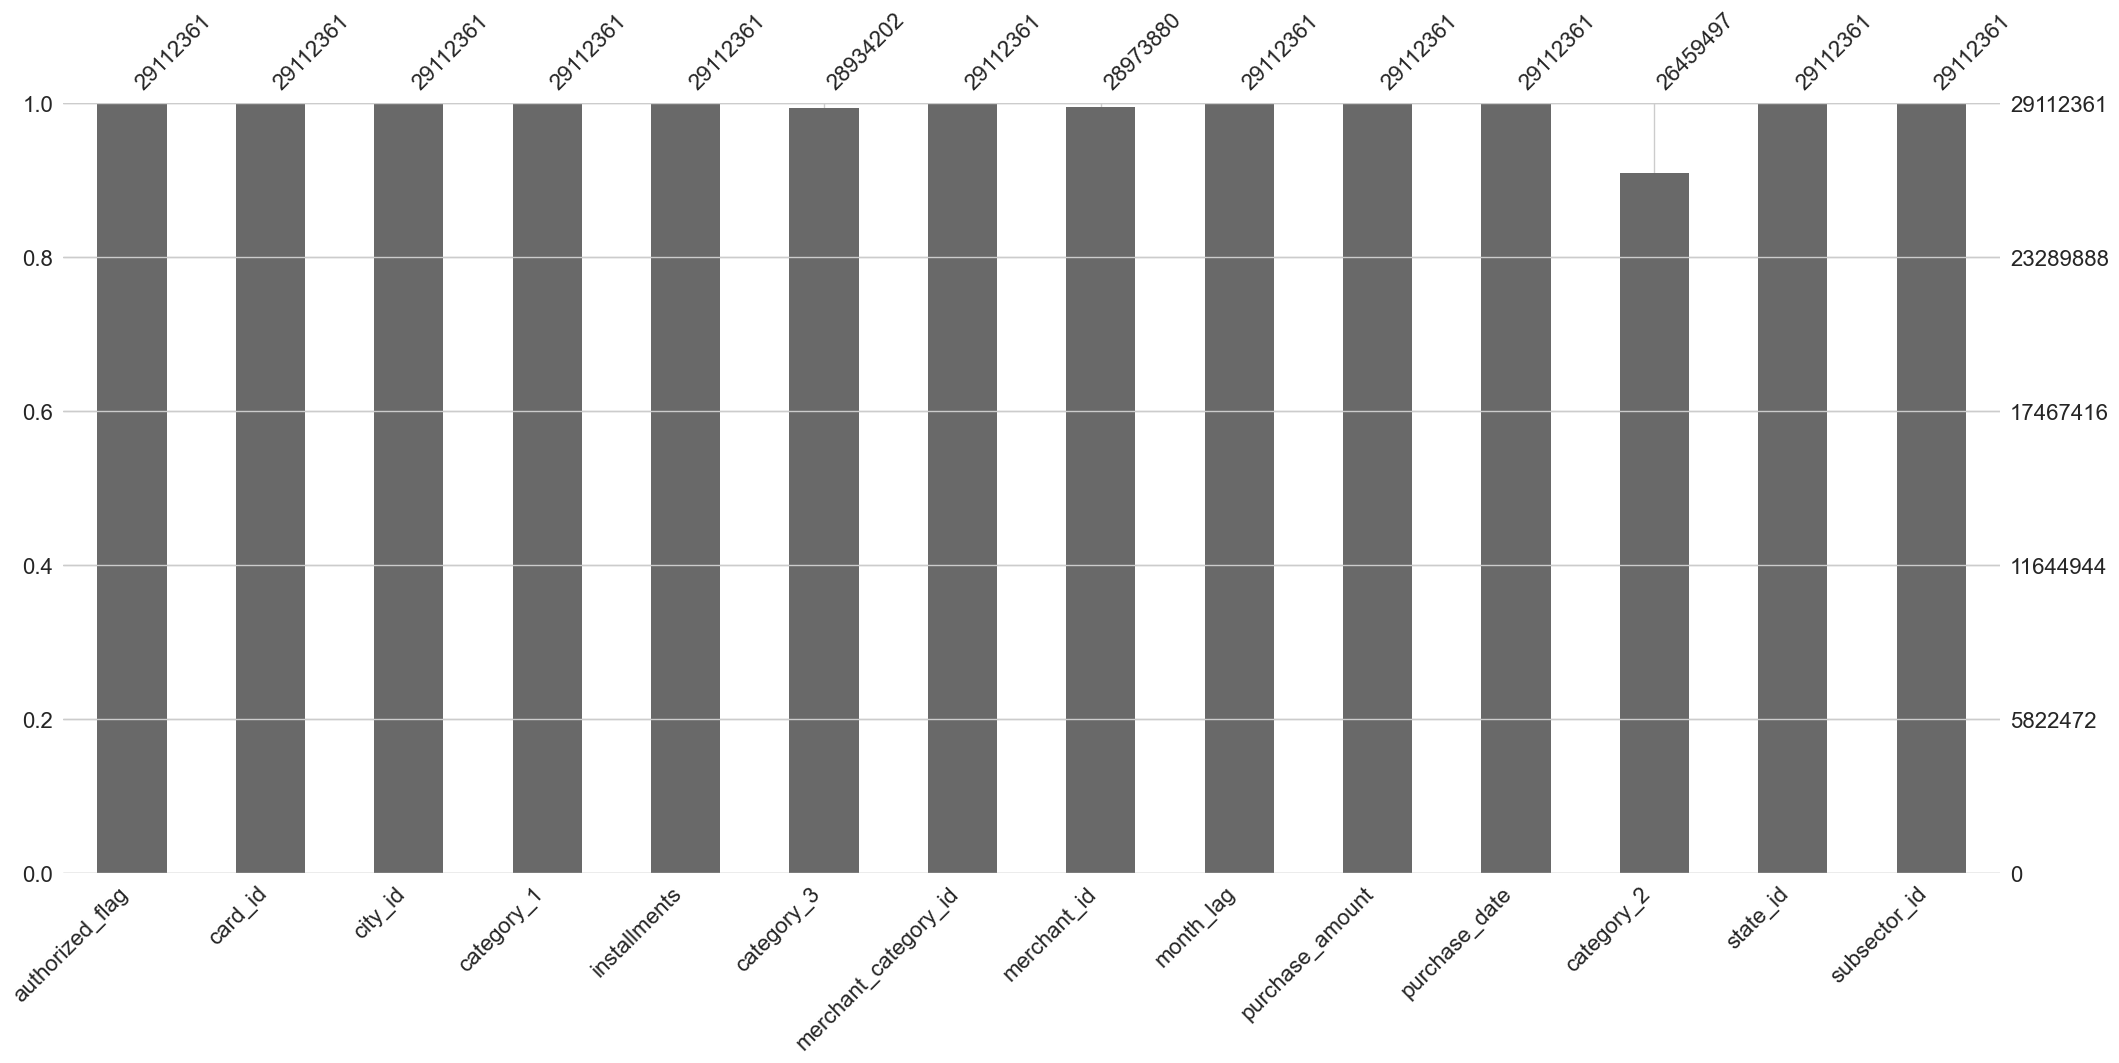

In [ ]:
# count the total number of missing values
historical.isnull().values.sum()

# visualize using msno package, no need in this case, just give for demo purpose.
msno.bar(historical)

<AxesSubplot:>

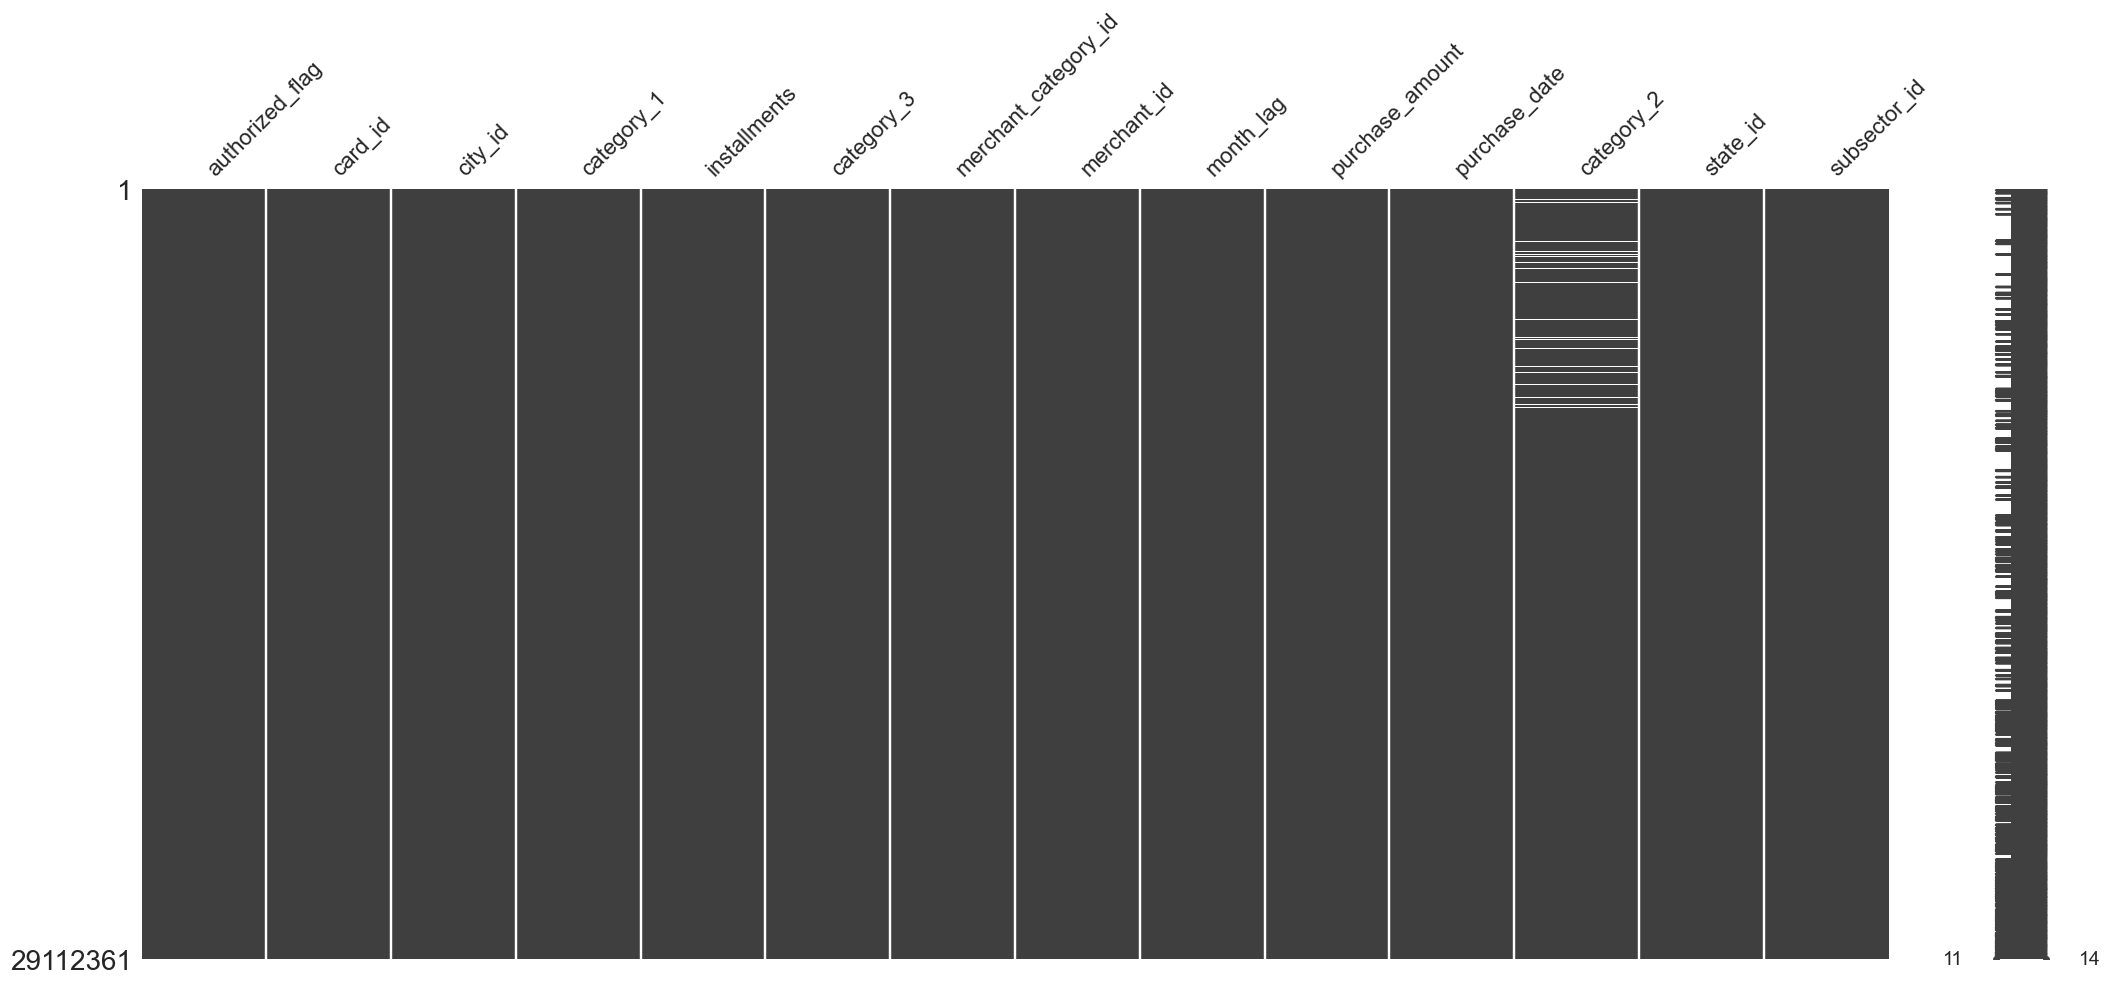

In [ ]:
msno.matrix(historical)
plt.show()

<AxesSubplot:>

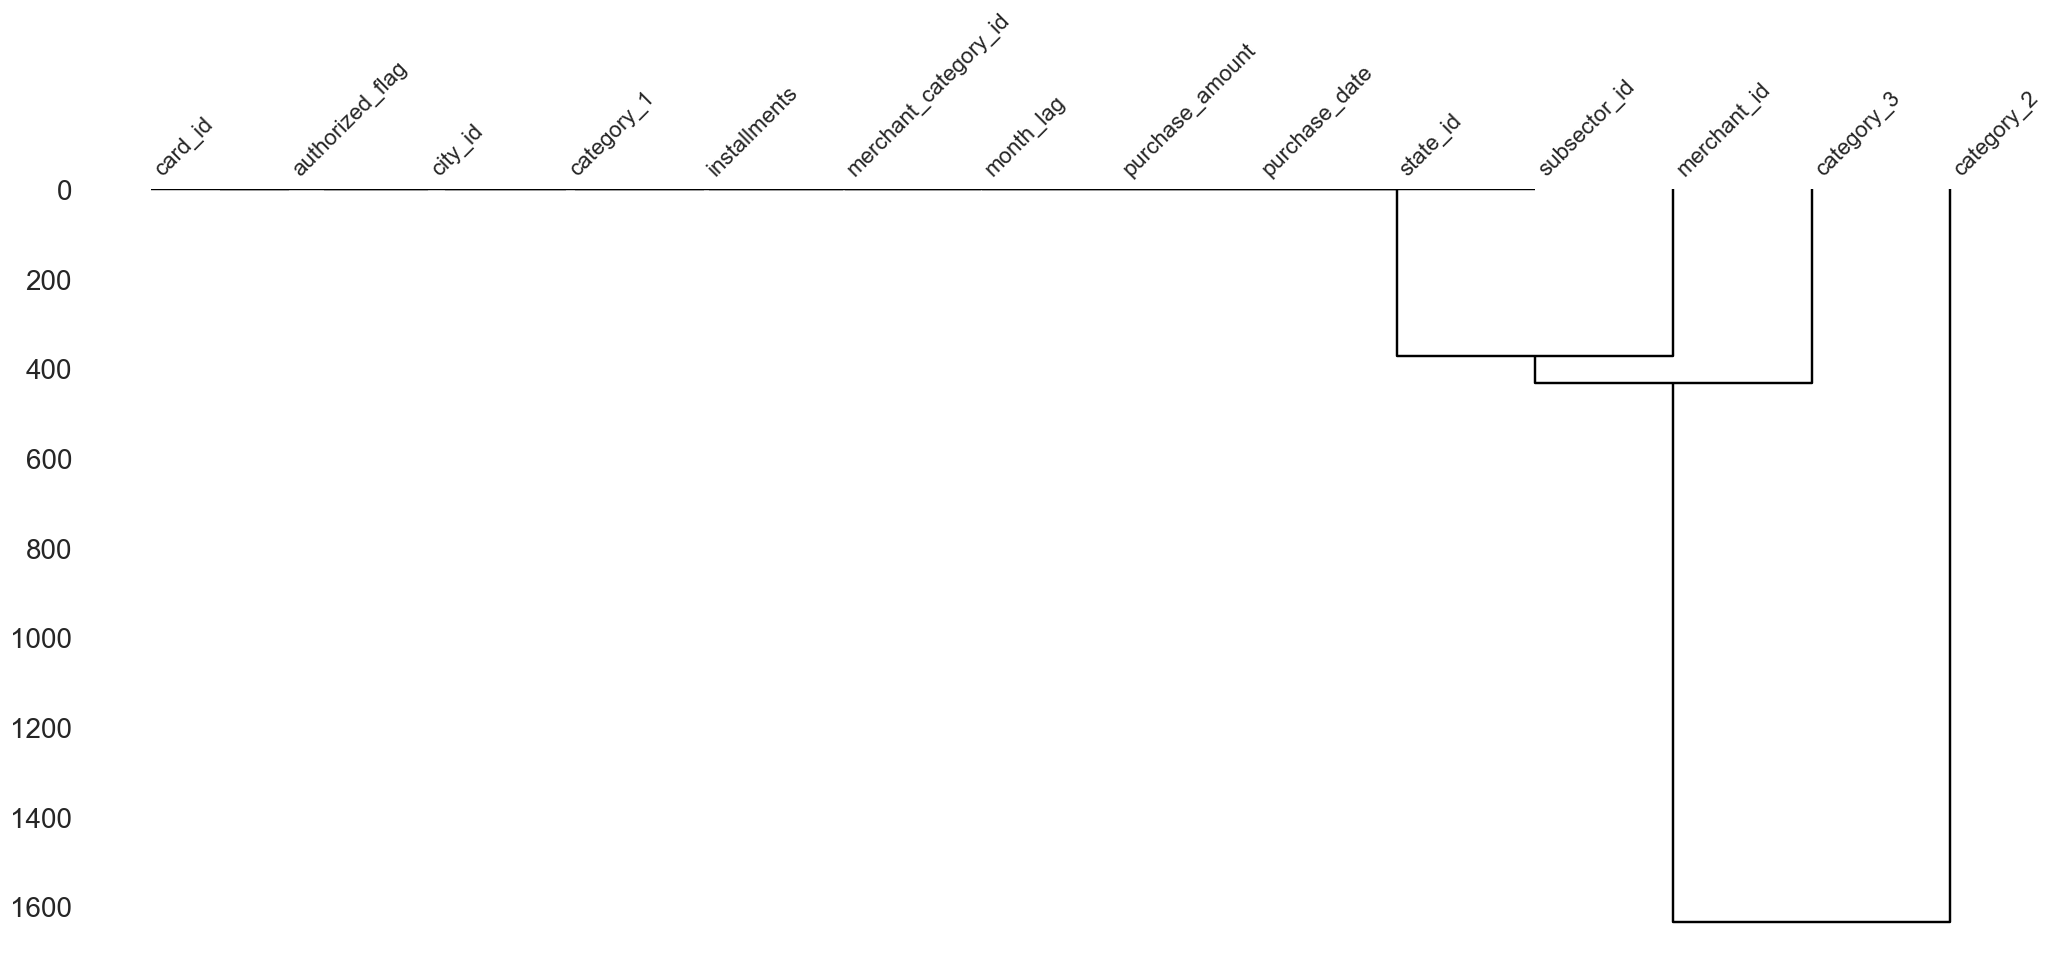

In [ ]:
# Create a dendrogram for missing data
msno.dendrogram(historical)

<AxesSubplot:>

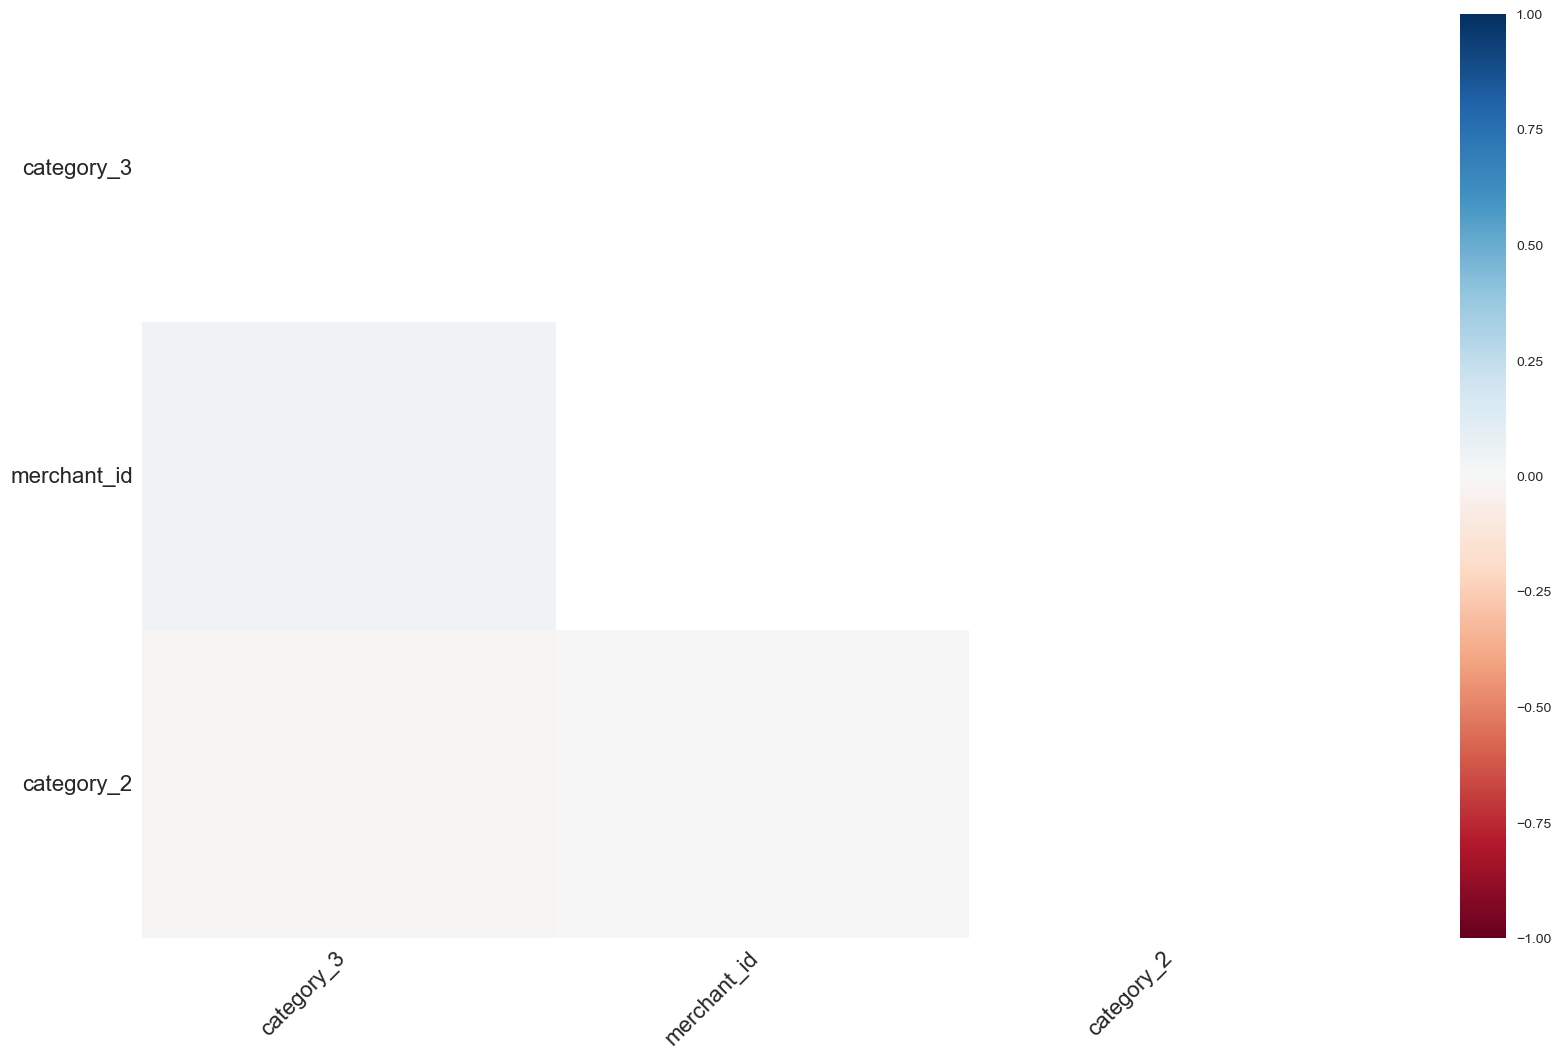

In [ ]:
# Create a heatmap for missing data
msno.heatmap(historical)
plt.show()


- the pattern of missing datd is `general pattern`
- Mechanisms of Missing Data
     - I think the mechanism of missing data here is `MCAR (missing completely at Random) ` in all columns which include missing values because there happen in random way
- How to deal with this missing data?
     - I will impute the missing data with aggregation function

### apply the imputation

In [ ]:
# Calculate the mode of the column
mode_value = historical["category_3"].mode().iloc[0]

# Impute the missing values with the mode
historical["category_3"].fillna(mode_value, inplace=True)

# Print the result
historical.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703,2017-06-25 15:33:07,1.000,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733,2017-07-15 12:10:45,1.000,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720,2017-08-09 22:04:29,1.000,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735,2017-09-02 10:06:26,1.000,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.723,2017-03-10 01:14:19,1.000,16,37
5,Y,C_ID_4e6213e9bc,333,N,0,A,80,M_ID_50af771f8d,0,-0.735,2018-02-24 08:45:05,1.000,9,37
6,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-11,-0.717,2017-03-21 00:10:51,1.000,16,37
7,Y,C_ID_4e6213e9bc,3,N,0,A,80,M_ID_9d41786a50,-3,-0.657,2017-11-18 20:05:55,1.000,16,37
8,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-8,-0.738,2017-06-01 22:02:56,1.000,16,37
9,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_74ba14b5fc,-11,-0.715,2017-03-16 15:41:22,1.000,16,37


In [ ]:
# Calculate the mode of the column
mode_value = historical['category_2'].mode().iloc[0]

# Impute the missing values with the mode
historical['category_2'].fillna(mode_value, inplace=True)

# Print the result
historical.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703,2017-06-25 15:33:07,1.000,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733,2017-07-15 12:10:45,1.000,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720,2017-08-09 22:04:29,1.000,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735,2017-09-02 10:06:26,1.000,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.723,2017-03-10 01:14:19,1.000,16,37
5,Y,C_ID_4e6213e9bc,333,N,0,A,80,M_ID_50af771f8d,0,-0.735,2018-02-24 08:45:05,1.000,9,37
6,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-11,-0.717,2017-03-21 00:10:51,1.000,16,37
7,Y,C_ID_4e6213e9bc,3,N,0,A,80,M_ID_9d41786a50,-3,-0.657,2017-11-18 20:05:55,1.000,16,37
8,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-8,-0.738,2017-06-01 22:02:56,1.000,16,37
9,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_74ba14b5fc,-11,-0.715,2017-03-16 15:41:22,1.000,16,37


In [ ]:
# I will impute this column with mode although this is not good enough but i will drop this column later after merge data together
# Calculate the mode of the column
mode_value = historical['merchant_id'].mode().iloc[0]

# Impute the missing values with the mode
historical['merchant_id'].fillna(mode_value, inplace=True)

# Print the result
historical.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703,2017-06-25 15:33:07,1.000,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733,2017-07-15 12:10:45,1.000,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720,2017-08-09 22:04:29,1.000,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735,2017-09-02 10:06:26,1.000,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.723,2017-03-10 01:14:19,1.000,16,37
5,Y,C_ID_4e6213e9bc,333,N,0,A,80,M_ID_50af771f8d,0,-0.735,2018-02-24 08:45:05,1.000,9,37
6,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-11,-0.717,2017-03-21 00:10:51,1.000,16,37
7,Y,C_ID_4e6213e9bc,3,N,0,A,80,M_ID_9d41786a50,-3,-0.657,2017-11-18 20:05:55,1.000,16,37
8,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-8,-0.738,2017-06-01 22:02:56,1.000,16,37
9,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_74ba14b5fc,-11,-0.715,2017-03-16 15:41:22,1.000,16,37


In [ ]:
historical.isnull().values.sum()

0

- after the previous step ,now we don't have any null in our data.

### Check Correlation

<AxesSubplot:>

<AxesSubplot:>

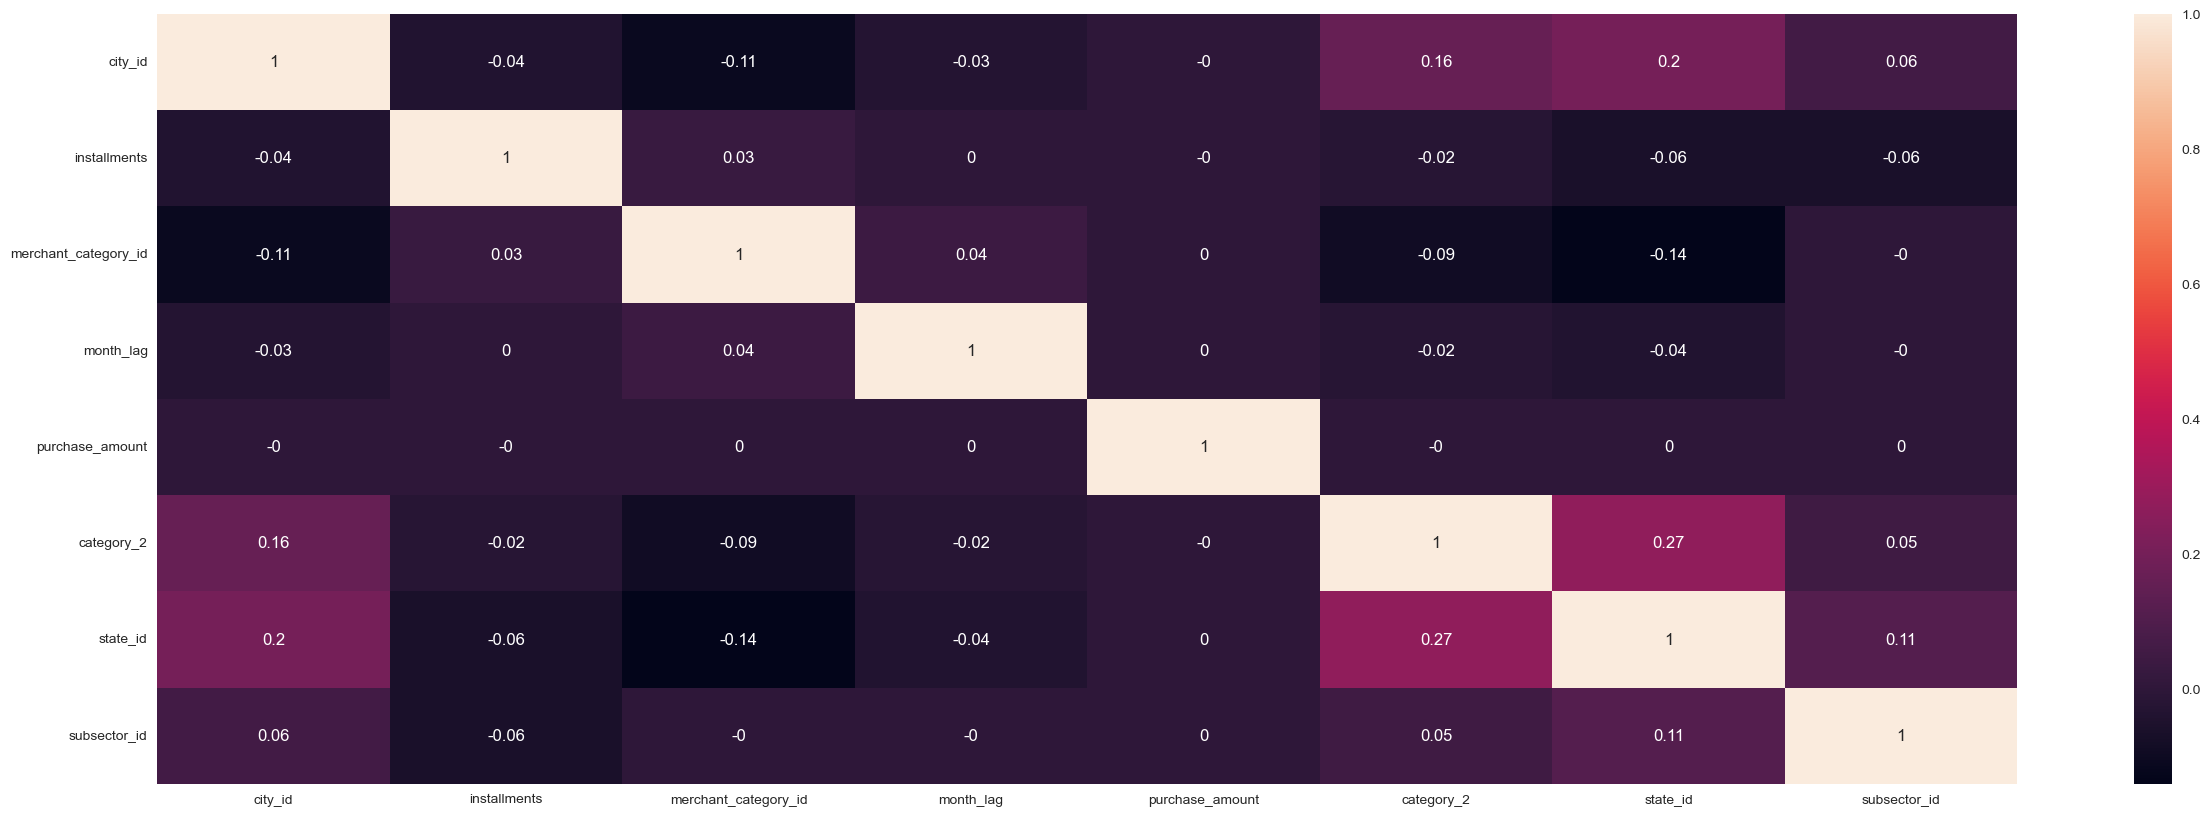

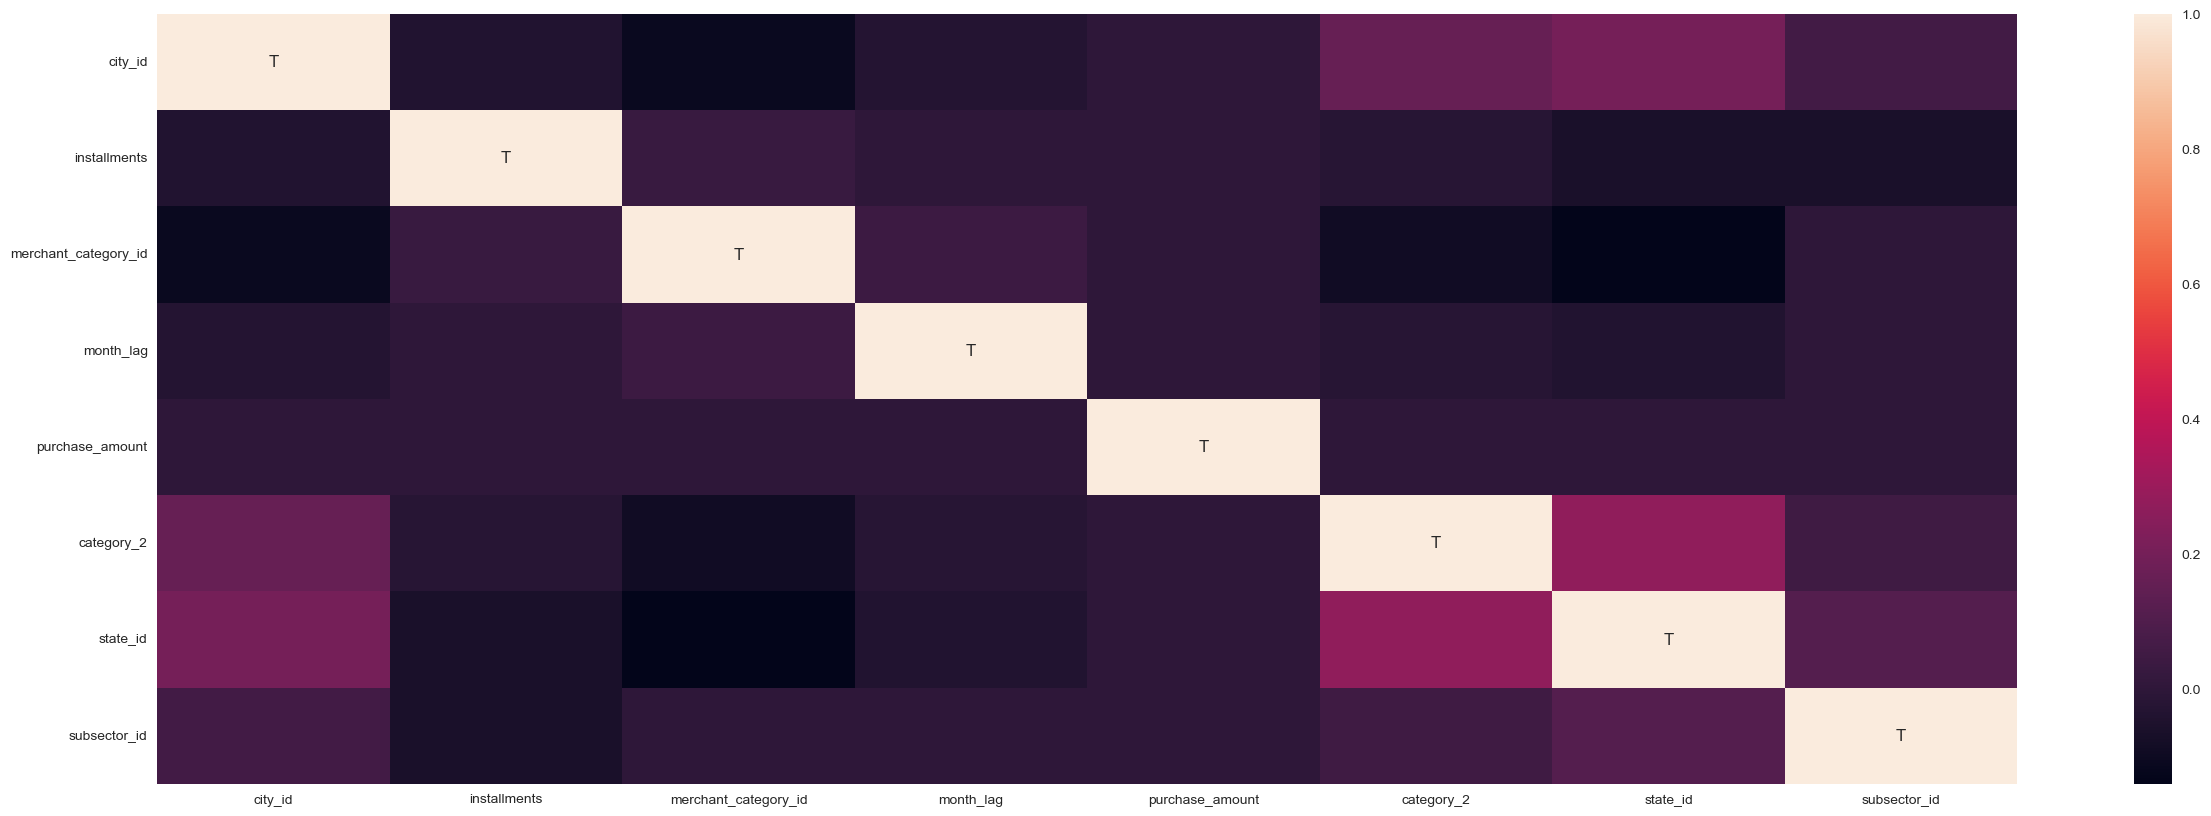

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
cor_df = historical.corr(method = "pearson").round(2)
sns.heatmap(cor_df, ax=ax, annot=True)

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T'
# Plot hearmap with the annotations
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(cor_df, annot=annot_labels, fmt='')

- here we can't benefit from this correlation as there is a little corr between cols.

### Remove Noise

#### detect the outliers and remove them

In [ ]:
# Select a single column to remove outliers from
column_name = 'purchase_amount'

# Calculate the z-scores for the column
z_scores = (historical['purchase_amount'] - historical['purchase_amount'].mean()) / historical['purchase_amount'].std()

# Identify the indices of the outliers
outlier_indices = z_scores.abs() > 3

# Remove the outliers from the DataFrame
historical = historical[~outlier_indices]

### Feature Engineering

In [ ]:
# group the rows by card_id and count the number of times when products are bought in each group
date_counts = historical.groupby('card_id')['purchase_date'].count().reset_index()

# print the resulting dataframe
print(date_counts)

                card_id  purchase_date
0       C_ID_00007093c1            149
1       C_ID_0001238066            123
2       C_ID_0001506ef0             66
3       C_ID_0001793786            216
4       C_ID_000183fdda            144
...                 ...            ...
325535  C_ID_ffff1d9928             12
325536  C_ID_ffff579d3a            114
325537  C_ID_ffff756266             24
325538  C_ID_ffff828181            190
325539  C_ID_fffffd5772             84

[325540 rows x 2 columns]


In [ ]:
# group the rows by card_id and count the number of purchase in each group
purchase_amount = historical.groupby('card_id')['purchase_amount'].mean().reset_index()

# print the resulting dataframe
print(purchase_amount)

                card_id  purchase_amount
0       C_ID_00007093c1           -0.516
1       C_ID_0001238066           -0.589
2       C_ID_0001506ef0           -0.524
3       C_ID_0001793786           -0.170
4       C_ID_000183fdda           -0.478
...                 ...              ...
325535  C_ID_ffff1d9928           -0.623
325536  C_ID_ffff579d3a           -0.704
325537  C_ID_ffff756266           -0.229
325538  C_ID_ffff828181           -0.632
325539  C_ID_fffffd5772           -0.691

[325540 rows x 2 columns]


In [ ]:
month_lag = historical.groupby('card_id')['month_lag'].mean().reset_index()

# print the resulting dataframe
print(month_lag)

                card_id  month_lag
0       C_ID_00007093c1     -5.852
1       C_ID_0001238066     -1.813
2       C_ID_0001506ef0     -4.833
3       C_ID_0001793786     -3.329
4       C_ID_000183fdda     -2.451
...                 ...        ...
325535  C_ID_ffff1d9928     -2.083
325536  C_ID_ffff579d3a     -3.737
325537  C_ID_ffff756266     -8.583
325538  C_ID_ffff828181     -6.079
325539  C_ID_fffffd5772     -1.940

[325540 rows x 2 columns]


In [ ]:

merchant_id = historical.groupby('card_id')['merchant_id'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()

# print the resulting dataframe
print(merchant_id)

                card_id      merchant_id
0       C_ID_00007093c1  M_ID_9400cf2342
1       C_ID_0001238066  M_ID_d17aabd756
2       C_ID_0001506ef0  M_ID_b1fc88154d
3       C_ID_0001793786  M_ID_923d57de8d
4       C_ID_000183fdda  M_ID_f9cfe0a43b
...                 ...              ...
325535  C_ID_ffff1d9928  M_ID_cabba1e9ae
325536  C_ID_ffff579d3a  M_ID_f0ada5d0c0
325537  C_ID_ffff756266  M_ID_0262bf62a0
325538  C_ID_ffff828181  M_ID_181cf8c379
325539  C_ID_fffffd5772  M_ID_445742726b

[325540 rows x 2 columns]


In [ ]:

authorized_flag = historical.groupby('card_id')['authorized_flag'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()

# print the resulting dataframe
print(authorized_flag)

                card_id authorized_flag
0       C_ID_00007093c1               Y
1       C_ID_0001238066               Y
2       C_ID_0001506ef0               Y
3       C_ID_0001793786               Y
4       C_ID_000183fdda               Y
...                 ...             ...
325535  C_ID_ffff1d9928               Y
325536  C_ID_ffff579d3a               Y
325537  C_ID_ffff756266               Y
325538  C_ID_ffff828181               Y
325539  C_ID_fffffd5772               Y

[325540 rows x 2 columns]


In [ ]:
city_id = historical.groupby('card_id')['city_id'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()

# print the resulting dataframe
print(city_id)

                card_id  city_id
0       C_ID_00007093c1      244
1       C_ID_0001238066      314
2       C_ID_0001506ef0      137
3       C_ID_0001793786      179
4       C_ID_000183fdda      161
...                 ...      ...
325535  C_ID_ffff1d9928      114
325536  C_ID_ffff579d3a       70
325537  C_ID_ffff756266      233
325538  C_ID_ffff828181       96
325539  C_ID_fffffd5772       -1

[325540 rows x 2 columns]


In [ ]:
merchant_category_id = historical.groupby('card_id')['merchant_category_id'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()

# print the resulting dataframe
print(merchant_category_id)

                card_id  merchant_category_id
0       C_ID_00007093c1                   307
1       C_ID_0001238066                   307
2       C_ID_0001506ef0                   705
3       C_ID_0001793786                   278
4       C_ID_000183fdda                   367
...                 ...                   ...
325535  C_ID_ffff1d9928                   705
325536  C_ID_ffff579d3a                    80
325537  C_ID_ffff756266                   529
325538  C_ID_ffff828181                   307
325539  C_ID_fffffd5772                   755

[325540 rows x 2 columns]


In [ ]:
merge_1= pd.merge(date_counts, purchase_amount, on='card_id')
merge_2= pd.merge(merge_1, month_lag, on='card_id')
merge_3= pd.merge(merge_2, merchant_id ,on='card_id')
merge_4= pd.merge(merge_3, authorized_flag, on='card_id')
merge_5= pd.merge(merge_4, city_id, on='card_id')
final_historical= pd.merge(merge_5, merchant_category_id ,on='card_id')
final_historical.head(10)
len(final_historical)

,card_id,purchase_date,purchase_amount,month_lag,merchant_id,authorized_flag,city_id,merchant_category_id
0,C_ID_00007093c1,149,-0.516,-5.852,M_ID_9400cf2342,Y,244,307
1,C_ID_0001238066,123,-0.589,-1.813,M_ID_d17aabd756,Y,314,307
2,C_ID_0001506ef0,66,-0.524,-4.833,M_ID_b1fc88154d,Y,137,705
3,C_ID_0001793786,216,-0.170,-3.329,M_ID_923d57de8d,Y,179,278
4,C_ID_000183fdda,144,-0.478,-2.451,M_ID_f9cfe0a43b,Y,161,367
5,C_ID_00024e244b,70,-0.594,-6.343,M_ID_8f71be2af9,Y,156,705
6,C_ID_0002709b5a,73,-0.653,-4.329,M_ID_543dd11ce2,Y,103,705
7,C_ID_00027503e2,42,-0.741,-4.143,M_ID_8de747a1c2,Y,146,705
8,C_ID_000298032a,30,-0.533,-4.100,M_ID_8978193c15,Y,233,560
9,C_ID_0002ba3c2e,70,-0.633,-3.314,M_ID_ec1175604c,Y,344,705


325540

In [ ]:
# Another easy and summarize way.
# Define the aggregation functions for each feature
aggregations = {'purchase_date': 'count', 'purchase_amount': 'mean', 'month_lag': 'mean',
               'merchant_id': lambda x: pd.Series.mode(x)[0], 'authorized_flag': lambda x: pd.Series.mode(x)[0],
                'city_id': lambda x: pd.Series.mode(x)[0],'merchant_category_id':lambda x: pd.Series.mode(x)[0]
               }
# Group the data by two columns and apply the defined aggregations
final_historical = historical.groupby('card_id').agg(aggregations)

# Print the result
final_historical

,purchase_date,purchase_amount,month_lag,merchant_id,authorized_flag,city_id,merchant_category_id
card_id,,,,,,,
C_ID_00007093c1,149,-0.516,-5.852,M_ID_9400cf2342,Y,244,307
C_ID_0001238066,123,-0.589,-1.813,M_ID_d17aabd756,Y,314,307
C_ID_0001506ef0,66,-0.524,-4.833,M_ID_b1fc88154d,Y,137,705
C_ID_0001793786,216,-0.170,-3.329,M_ID_923d57de8d,Y,179,278
C_ID_000183fdda,144,-0.478,-2.451,M_ID_f9cfe0a43b,Y,161,367
...,...,...,...,...,...,...,...
C_ID_ffff1d9928,12,-0.623,-2.083,M_ID_cabba1e9ae,Y,114,705
C_ID_ffff579d3a,114,-0.704,-3.737,M_ID_f0ada5d0c0,Y,70,80
C_ID_ffff756266,24,-0.229,-8.583,M_ID_0262bf62a0,Y,233,529


## Load new_merchant_transactions dataset

In [ ]:
#load the new_merchant_transactions dataset to our notebook
new_transactions = pd.read_csv('new_merchant_transactions.csv')

In [ ]:
#show the first 10 rows in data
new_transactions.head(10)
# we can also check the end of the table, why this might help? because sometimes there would be extra content provided by the data author at the end of the table and you keep that as part of the da
new_transactions.tail(10)
new_transactions.info()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.558,2018-03-11 14:57:36,1.000,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.570,2018-03-19 18:53:37,1.000,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551,2018-04-26 14:08:44,1.000,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.672,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.660,2018-03-22 21:07:53,NaN,-1,29
5,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633,2018-04-02 12:53:28,1.000,9,16
6,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.264,2018-03-28 19:50:19,1.000,9,10
7,Y,C_ID_ef55cf8d4b,231,N,1,B,307,M_ID_df1e022f41,2,-0.554,2018-04-05 08:06:52,1.000,9,19
8,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_d15eae0468,2,-0.597,2018-04-07 18:37:40,1.000,9,37
9,Y,C_ID_ef55cf8d4b,69,N,1,B,437,M_ID_5f9bffd028,1,-0.607,2018-03-17 18:10:41,1.000,9,15


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
1963021,Y,C_ID_c0dda9d36b,87,N,1,B,367,M_ID_96e6a85df9,2,-0.651,2018-04-14 09:30:29,3.000,11,16
1963022,Y,C_ID_01d35d1005,109,N,0,A,195,M_ID_f028b9c665,1,-0.679,2018-03-28 14:47:17,1.000,9,34
1963023,Y,C_ID_611d4d588f,302,N,1,B,307,M_ID_ee5a6f6a35,2,-0.732,2018-03-11 15:07:49,3.000,7,19
1963024,Y,C_ID_0509e85404,322,N,1,B,705,M_ID_531bc3b325,2,-0.182,2018-04-30 08:57:58,3.000,11,33
1963025,Y,C_ID_d3ad1091dc,51,N,0,A,560,M_ID_feaccfbea2,2,-0.744,2017-12-20 13:48:02,1.000,16,34
1963026,Y,C_ID_1320dee851,142,N,0,A,309,M_ID_7754b67f3b,2,-0.702,2018-04-06 14:36:52,3.000,19,21
1963027,Y,C_ID_f112aa3381,158,N,0,A,560,M_ID_da063195b7,2,-0.694,2018-03-07 13:19:18,1.000,15,34
1963028,Y,C_ID_bd97b86450,69,N,1,B,278,M_ID_9a9ccb6544,1,-0.621,2018-03-05 12:04:56,1.000,9,37
1963029,Y,C_ID_c0513fd84f,130,N,0,A,367,M_ID_40c28d596f,1,-0.657,2018-03-09 14:47:05,3.000,7,16
1963030,Y,C_ID_a935410f8e,19,N,0,A,278,M_ID_d855771cd9,2,-0.739,2018-04-11 07:59:46,1.000,9,37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 209.7+ MB


In [ ]:
new_transactions.describe()
new_transactions.describe(include="all")

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.851286e+06,1.963031e+06,1.963031e+06
mean,1.343867e+02,6.829643e-01,4.309701e+02,1.476515e+00,-5.509690e-01,2.197841e+00,1.088067e+01,2.597624e+01
std,1.015152e+02,1.584069e+00,2.463385e+02,4.994483e-01,6.940043e-01,1.528125e+00,6.038542e+00,1.012908e+01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-7.468928e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,6.900000e+01,0.000000e+00,2.780000e+02,1.000000e+00,-7.166294e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,1.100000e+02,1.000000e+00,3.670000e+02,1.000000e+00,-6.748406e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,6.830000e+02,2.000000e+00,-5.816162e-01,3.000000e+00,1.500000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,2.631575e+02,5.000000e+00,2.400000e+01,4.100000e+01


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
count,1963031,1963031,1.963031e+06,1963031,1.963031e+06,1907109,1.963031e+06,1936815,1.963031e+06,1.963031e+06,1963031,1.851286e+06,1.963031e+06,1.963031e+06
unique,1,290001,NaN,2,NaN,3,NaN,226129,NaN,NaN,1667025,NaN,NaN,NaN
top,Y,C_ID_b7ebee6539,NaN,N,NaN,A,NaN,M_ID_00a6ca8a8a,NaN,NaN,2017-11-18 00:00:00,NaN,NaN,NaN
freq,1963031,109,NaN,1899935,NaN,922244,NaN,23018,NaN,NaN,582,NaN,NaN,NaN
mean,NaN,NaN,1.343867e+02,NaN,6.829643e-01,NaN,4.309701e+02,NaN,1.476515e+00,-5.509690e-01,NaN,2.197841e+00,1.088067e+01,2.597624e+01
std,NaN,NaN,1.015152e+02,NaN,1.584069e+00,NaN,2.463385e+02,NaN,4.994483e-01,6.940043e-01,NaN,1.528125e+00,6.038542e+00,1.012908e+01
min,NaN,NaN,-1.000000e+00,NaN,-1.000000e+00,NaN,-1.000000e+00,NaN,1.000000e+00,-7.468928e-01,NaN,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,NaN,NaN,6.900000e+01,NaN,0.000000e+00,NaN,2.780000e+02,NaN,1.000000e+00,-7.166294e-01,NaN,1.000000e+00,9.000000e+00,1.900000e+01
50%,NaN,NaN,1.100000e+02,NaN,1.000000e+00,NaN,3.670000e+02,NaN,1.000000e+00,-6.748406e-01,NaN,1.000000e+00,9.000000e+00,2.900000e+01
75%,NaN,NaN,2.120000e+02,NaN,1.000000e+00,NaN,6.830000e+02,NaN,2.000000e+00,-5.816162e-01,NaN,3.000000e+00,1.500000e+01,3.400000e+01


What are the findings from this step ?

1. We have 1963031   data entries and 14 attributes.
2. As the data is very big so info() method is not useful enough so i can't know the number of null and the datatype of every attributes so i will check it.

### Check duplicated

In [ ]:
duplicated= new_transactions[new_transactions.duplicated()]
duplicated.count()
#as we see the output,there is no any duplicated

authorized_flag         0
card_id                 0
city_id                 0
category_1              0
installments            0
category_3              0
merchant_category_id    0
merchant_id             0
month_lag               0
purchase_amount         0
purchase_date           0
category_2              0
state_id                0
subsector_id            0
dtype: int64

### Check unique

In [ ]:
def check_unique(new_transactions):
  ls=[]
  for col in new_transactions.columns:
    n=historical[col].nunique()
    if n==1: ls.append(col)
    elif  n>100 and new_transactions[col].dtypes == object:
      ls.append(col)
  return ls

In [ ]:
drop_column_2=check_unique(new_transactions)
drop_column_2

['card_id', 'merchant_id', 'purchase_date']

- As we see here these coulmns are unique but they are important and it is ok to be unique so we can't drop them.

### Check Null

In [ ]:
# Calculate the percentage of null values in each column
null_percentages = new_transactions.isnull().sum() / len(new_transactions) * 100

# Print the results
print(null_percentages)

authorized_flag         0.000000
card_id                 0.000000
city_id                 0.000000
category_1              0.000000
installments            0.000000
category_3              2.848758
merchant_category_id    0.000000
merchant_id             1.335486
month_lag               0.000000
purchase_amount         0.000000
purchase_date           0.000000
category_2              5.692473
state_id                0.000000
subsector_id            0.000000
dtype: float64


#### Visulization the missing values

193883

<AxesSubplot:>

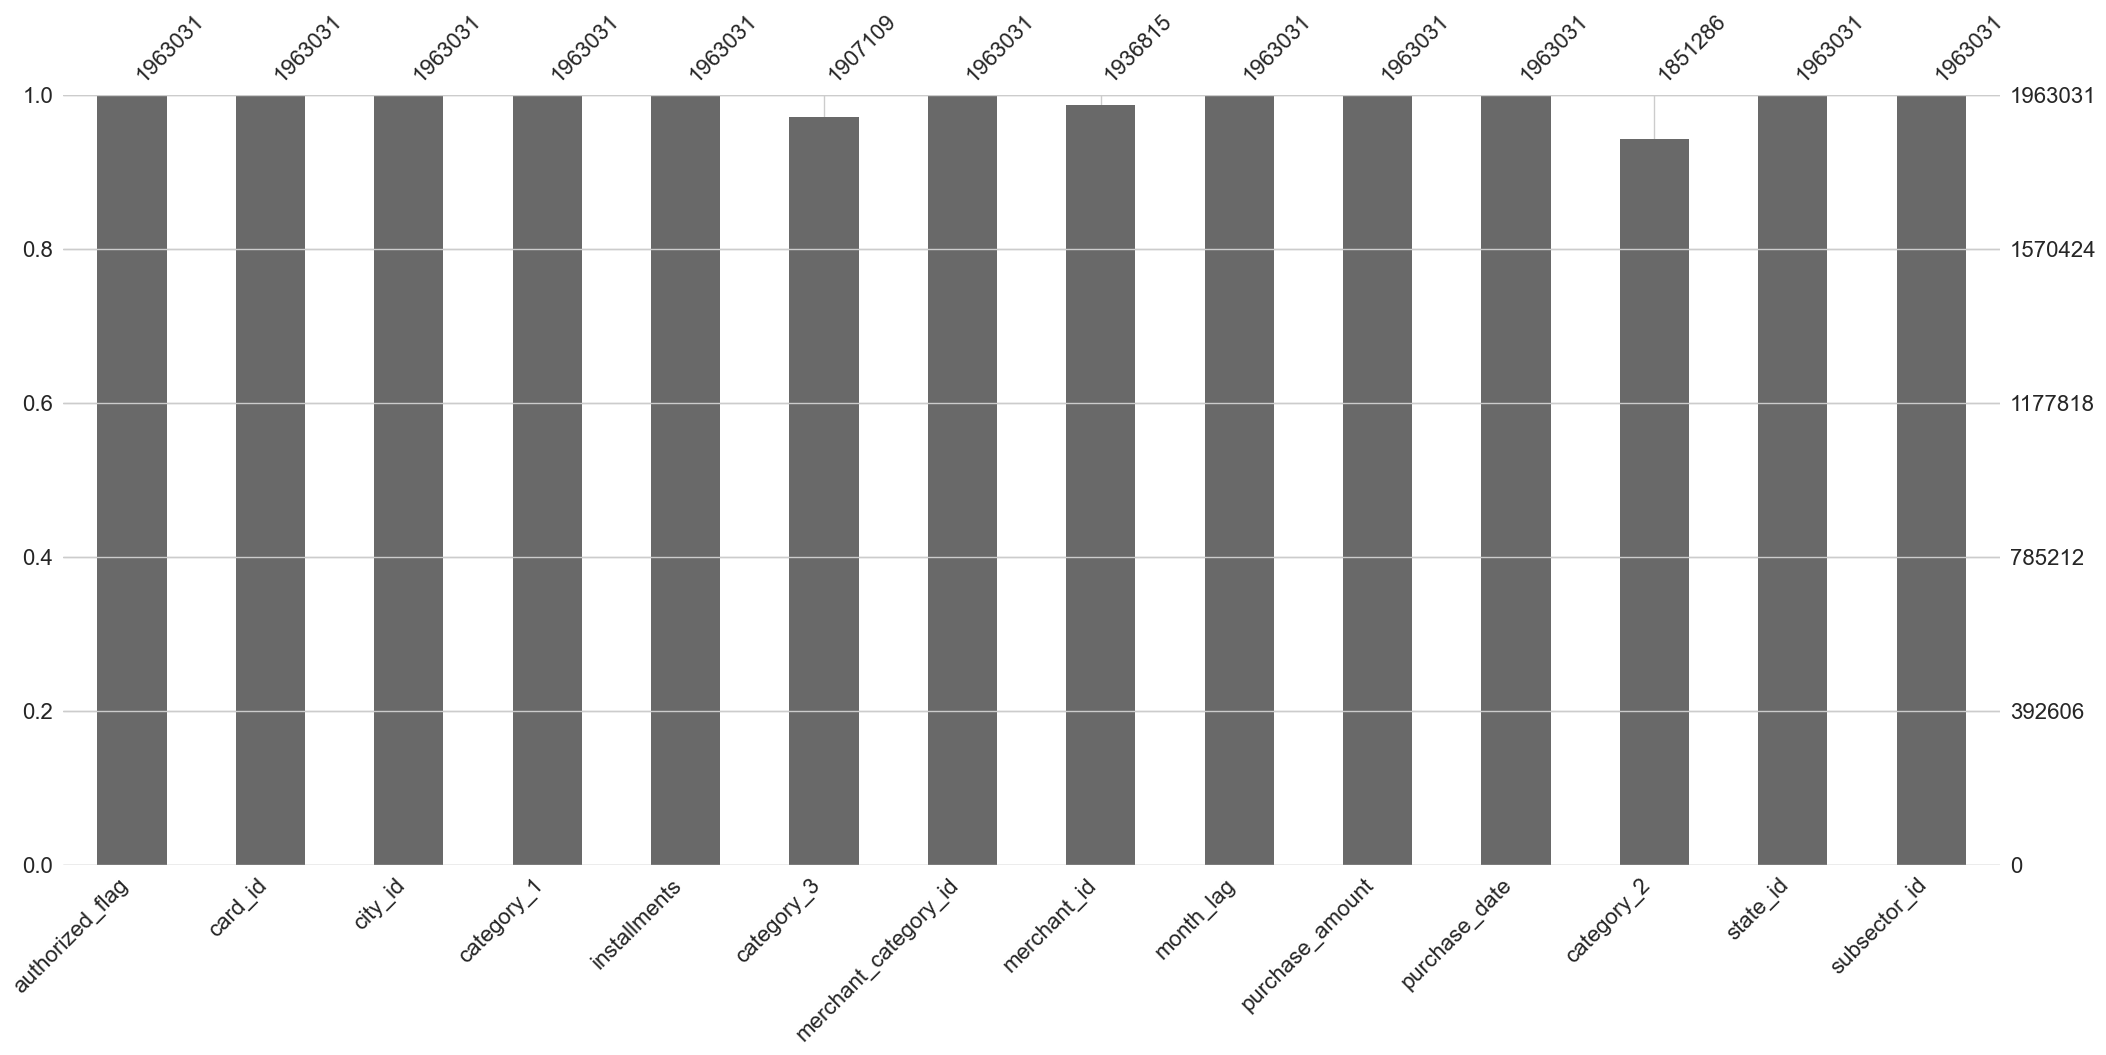

In [ ]:
# count the total number of missing values
new_transactions.isnull().values.sum()


# visualize using msno package, no need in this case, just give for demo purpose.
msno.bar(new_transactions)

<AxesSubplot:>

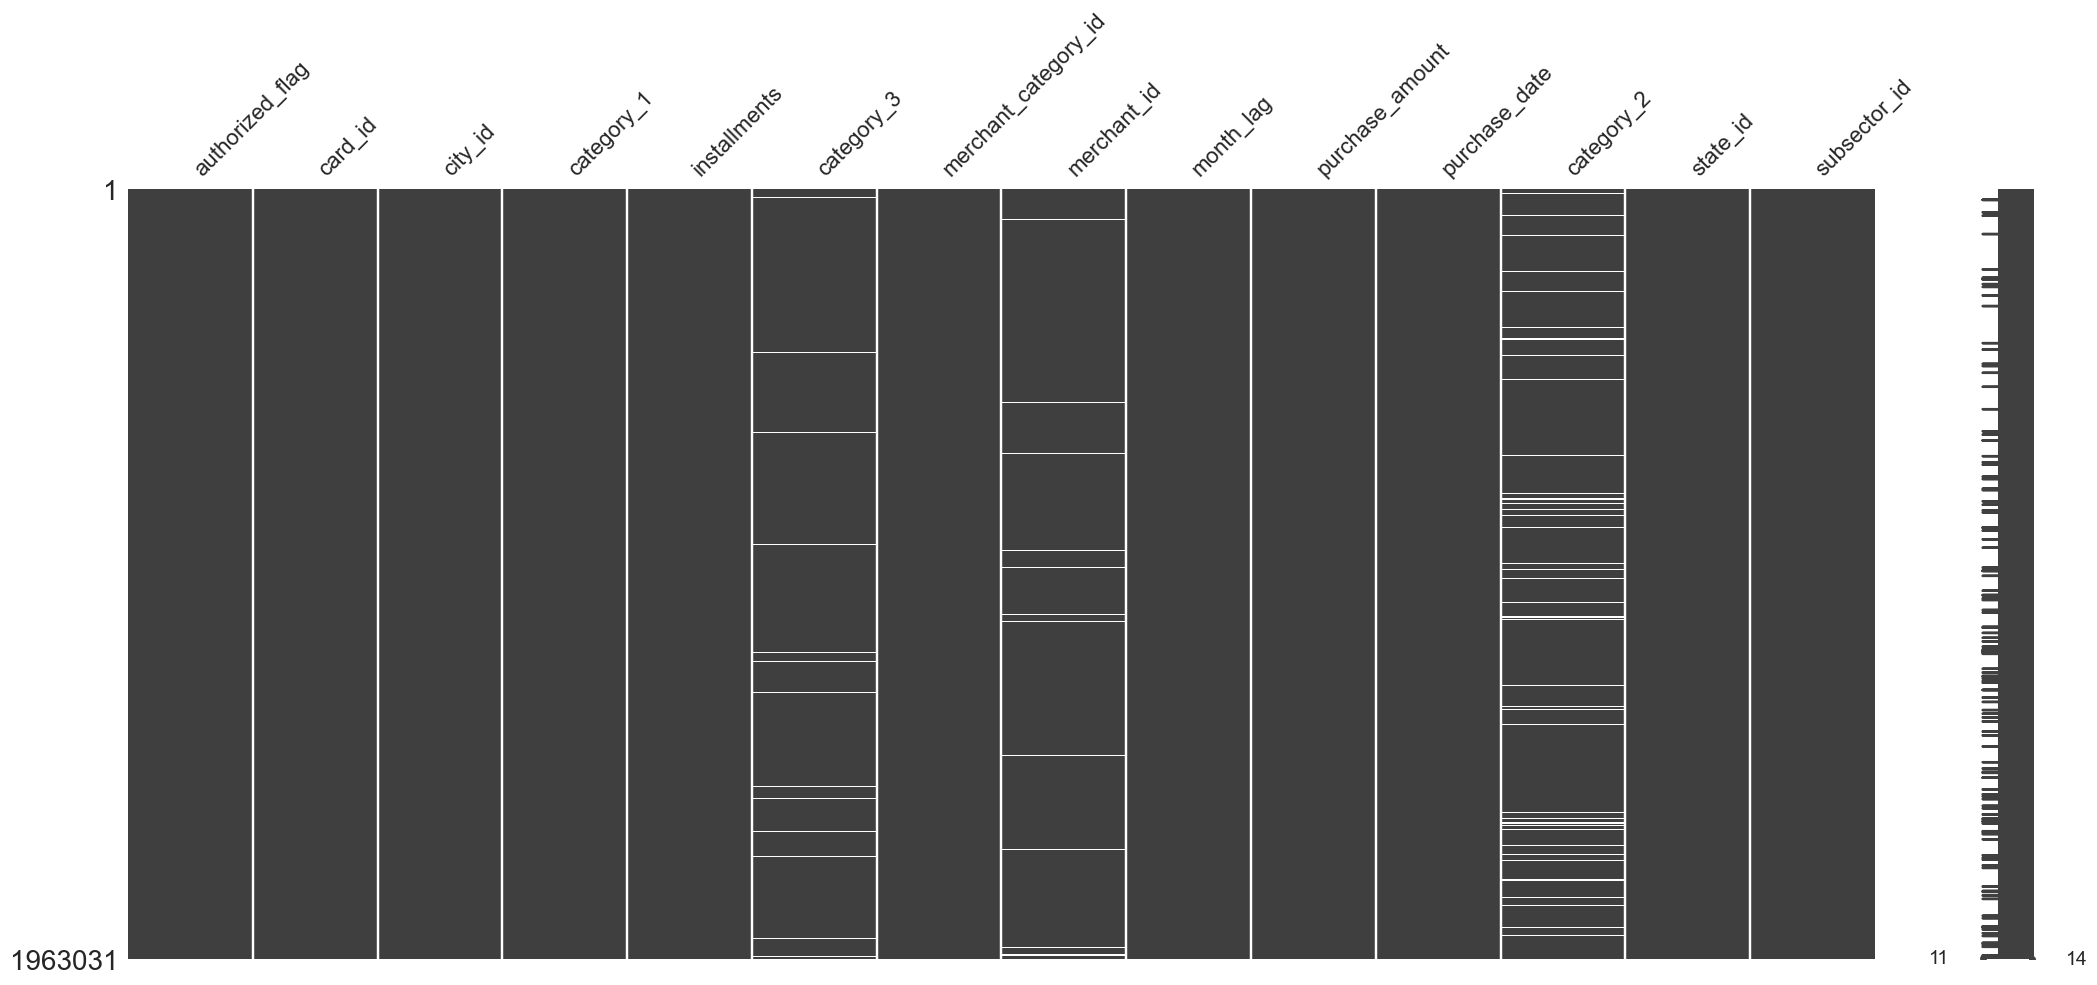

In [ ]:
msno.matrix(new_transactions)
plt.show()

<AxesSubplot:>

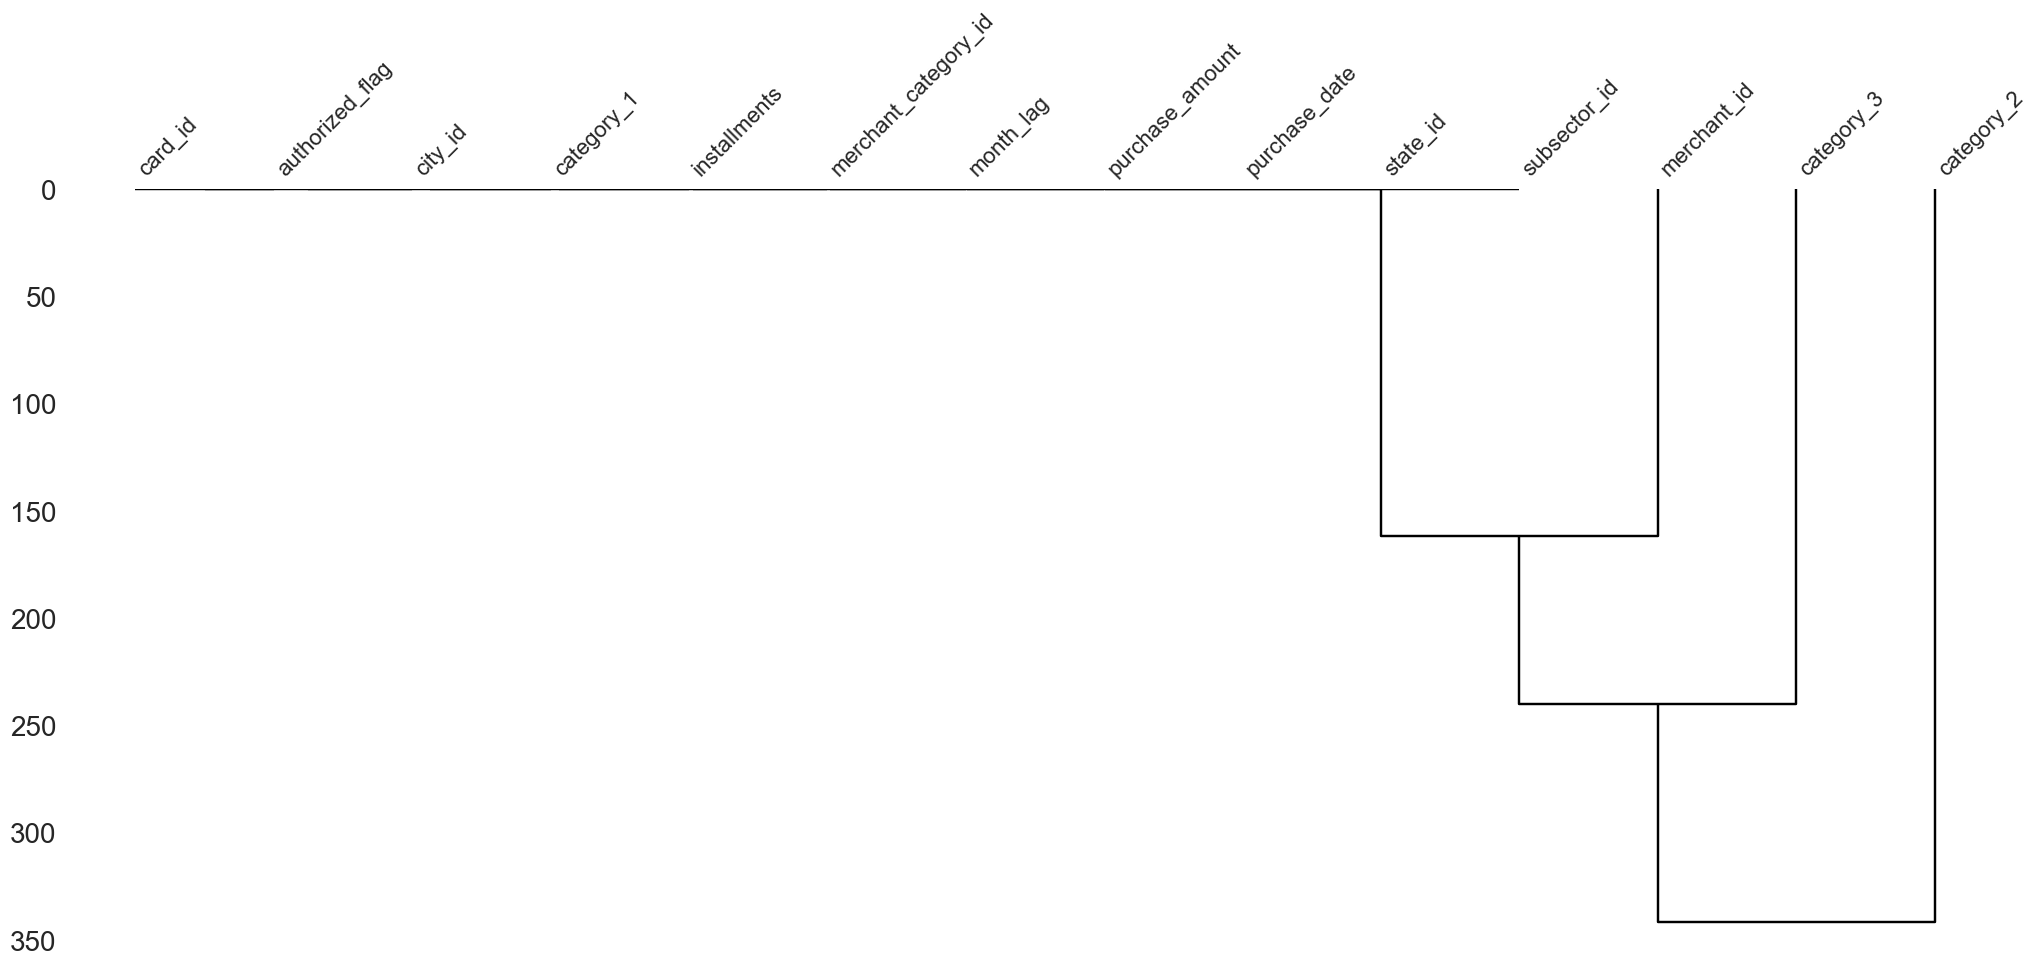

In [ ]:
# Create a dendrogram for missing data
msno.dendrogram(new_transactions)

<AxesSubplot:>

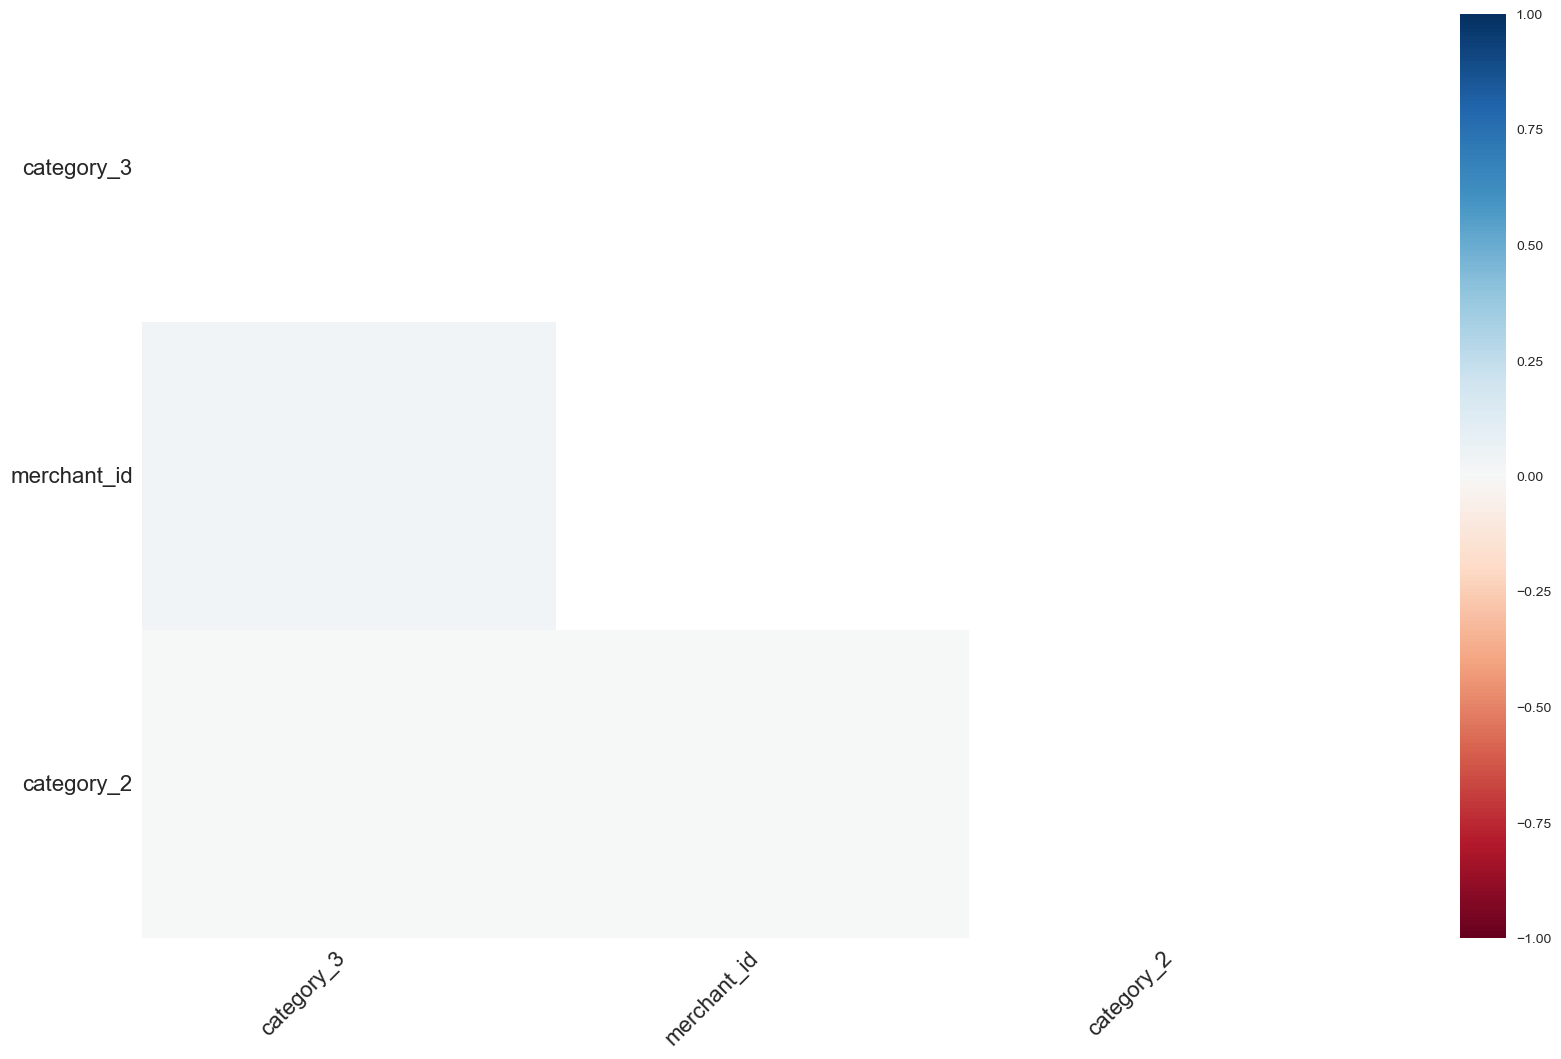

In [ ]:
# Create a heatmap for missing data
msno.heatmap(new_transactions)
plt.show()

- the pattern of missing datd is `general pattern`
- Mechanisms of Missing Data
     - I think the mechanism of missing data here is `MCAR (missing completely at Random) `because there happen in random way
- How to deal with this missing data?
     - I will impute the missing data with aggregation function

### Apply Imputation

In [ ]:
# Calculate the mode of the column
mode_value = new_transactions["category_3"].mode().iloc[0]

# Impute the missing values with the mode
new_transactions["category_3"].fillna(mode_value, inplace=True)

# Print the result
new_transactions.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.558,2018-03-11 14:57:36,1.000,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.570,2018-03-19 18:53:37,1.000,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551,2018-04-26 14:08:44,1.000,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.672,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.660,2018-03-22 21:07:53,NaN,-1,29
5,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633,2018-04-02 12:53:28,1.000,9,16
6,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.264,2018-03-28 19:50:19,1.000,9,10
7,Y,C_ID_ef55cf8d4b,231,N,1,B,307,M_ID_df1e022f41,2,-0.554,2018-04-05 08:06:52,1.000,9,19
8,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_d15eae0468,2,-0.597,2018-04-07 18:37:40,1.000,9,37
9,Y,C_ID_ef55cf8d4b,69,N,1,B,437,M_ID_5f9bffd028,1,-0.607,2018-03-17 18:10:41,1.000,9,15


In [ ]:
# Calculate the mode of the column
mode_value = new_transactions['category_2'].mode().iloc[0]

# Impute the missing values with the mode
new_transactions['category_2'].fillna(mode_value, inplace=True)

# Print the result
new_transactions.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.558,2018-03-11 14:57:36,1.000,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.570,2018-03-19 18:53:37,1.000,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551,2018-04-26 14:08:44,1.000,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.672,2018-03-07 09:43:21,1.000,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.660,2018-03-22 21:07:53,1.000,-1,29
5,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633,2018-04-02 12:53:28,1.000,9,16
6,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.264,2018-03-28 19:50:19,1.000,9,10
7,Y,C_ID_ef55cf8d4b,231,N,1,B,307,M_ID_df1e022f41,2,-0.554,2018-04-05 08:06:52,1.000,9,19
8,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_d15eae0468,2,-0.597,2018-04-07 18:37:40,1.000,9,37
9,Y,C_ID_ef55cf8d4b,69,N,1,B,437,M_ID_5f9bffd028,1,-0.607,2018-03-17 18:10:41,1.000,9,15


In [ ]:
# I will impute this column with mode although this is not good enough but i will drop this column later after merge data together
# Calculate the mode of the column
mode_value = new_transactions['merchant_id'].mode().iloc[0]

# Impute the missing values with the mode
new_transactions['merchant_id'].fillna(mode_value, inplace=True)

# Print the result
new_transactions.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.558,2018-03-11 14:57:36,1.000,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.570,2018-03-19 18:53:37,1.000,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551,2018-04-26 14:08:44,1.000,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.672,2018-03-07 09:43:21,1.000,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.660,2018-03-22 21:07:53,1.000,-1,29
5,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633,2018-04-02 12:53:28,1.000,9,16
6,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.264,2018-03-28 19:50:19,1.000,9,10
7,Y,C_ID_ef55cf8d4b,231,N,1,B,307,M_ID_df1e022f41,2,-0.554,2018-04-05 08:06:52,1.000,9,19
8,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_d15eae0468,2,-0.597,2018-04-07 18:37:40,1.000,9,37
9,Y,C_ID_ef55cf8d4b,69,N,1,B,437,M_ID_5f9bffd028,1,-0.607,2018-03-17 18:10:41,1.000,9,15


In [ ]:
new_transactions.isnull().values.sum()
# so, Now we don't have any null on our dataset

0

### Check Correlation

<AxesSubplot:>

<AxesSubplot:>

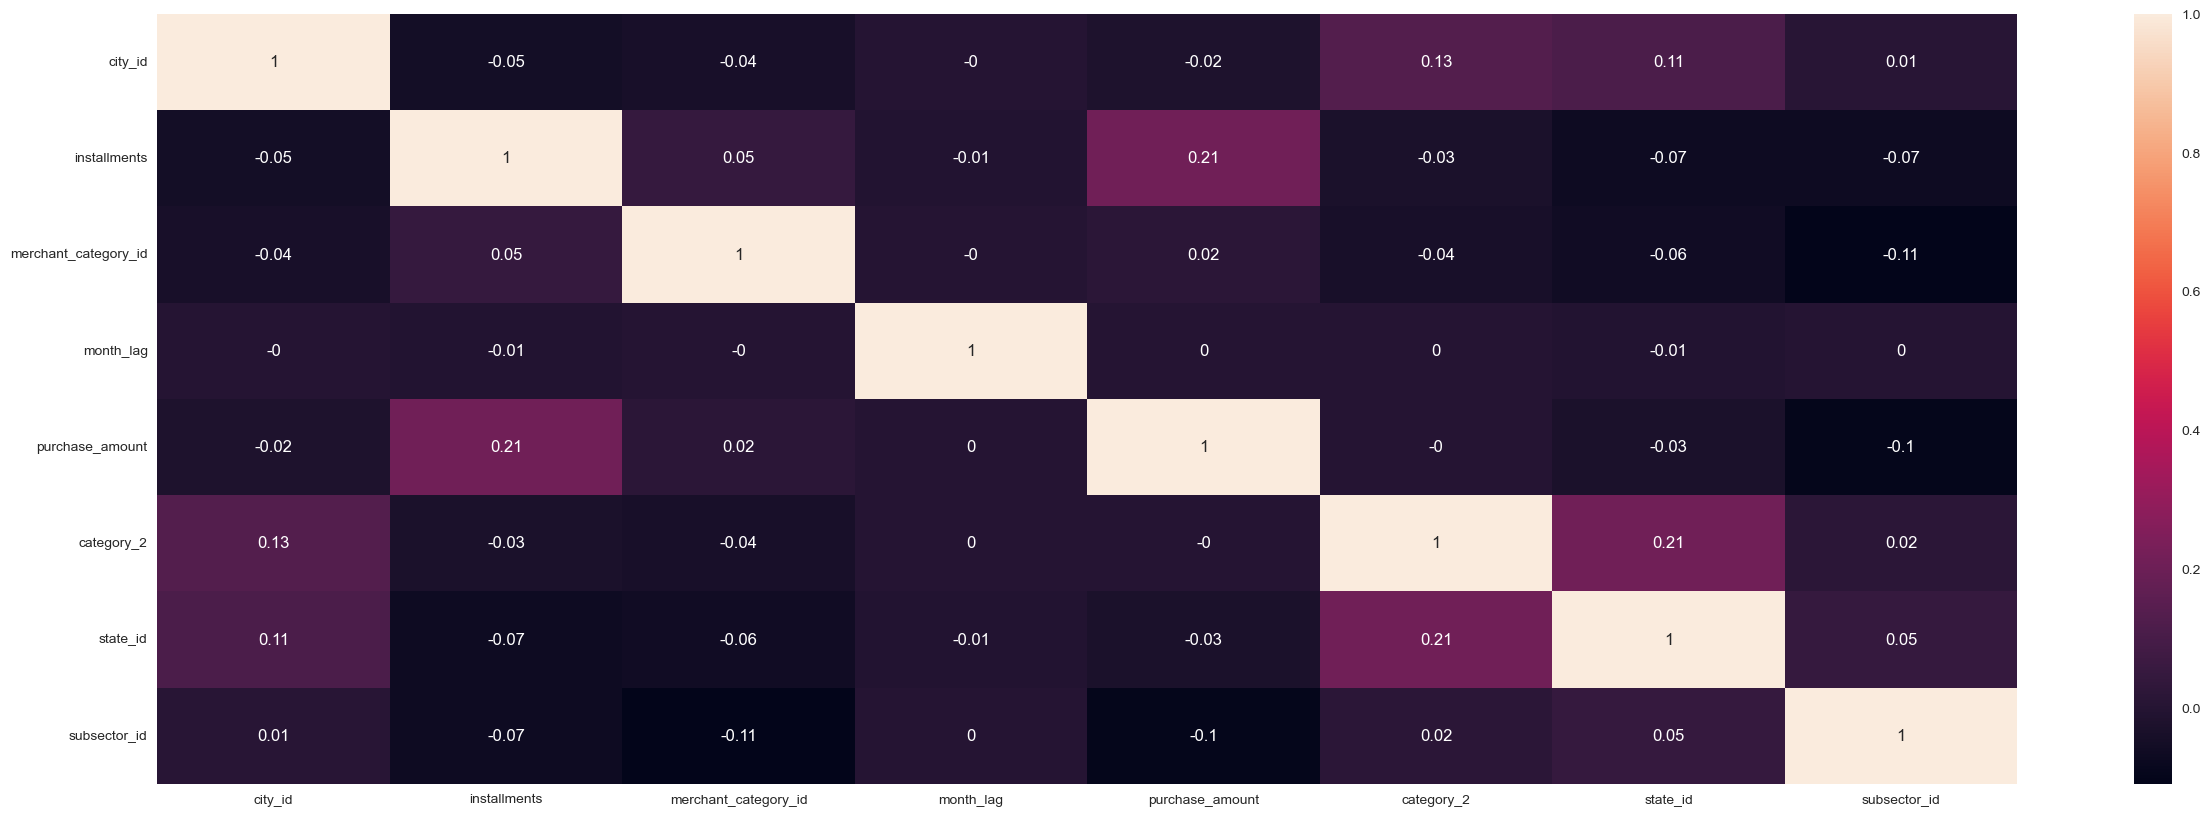

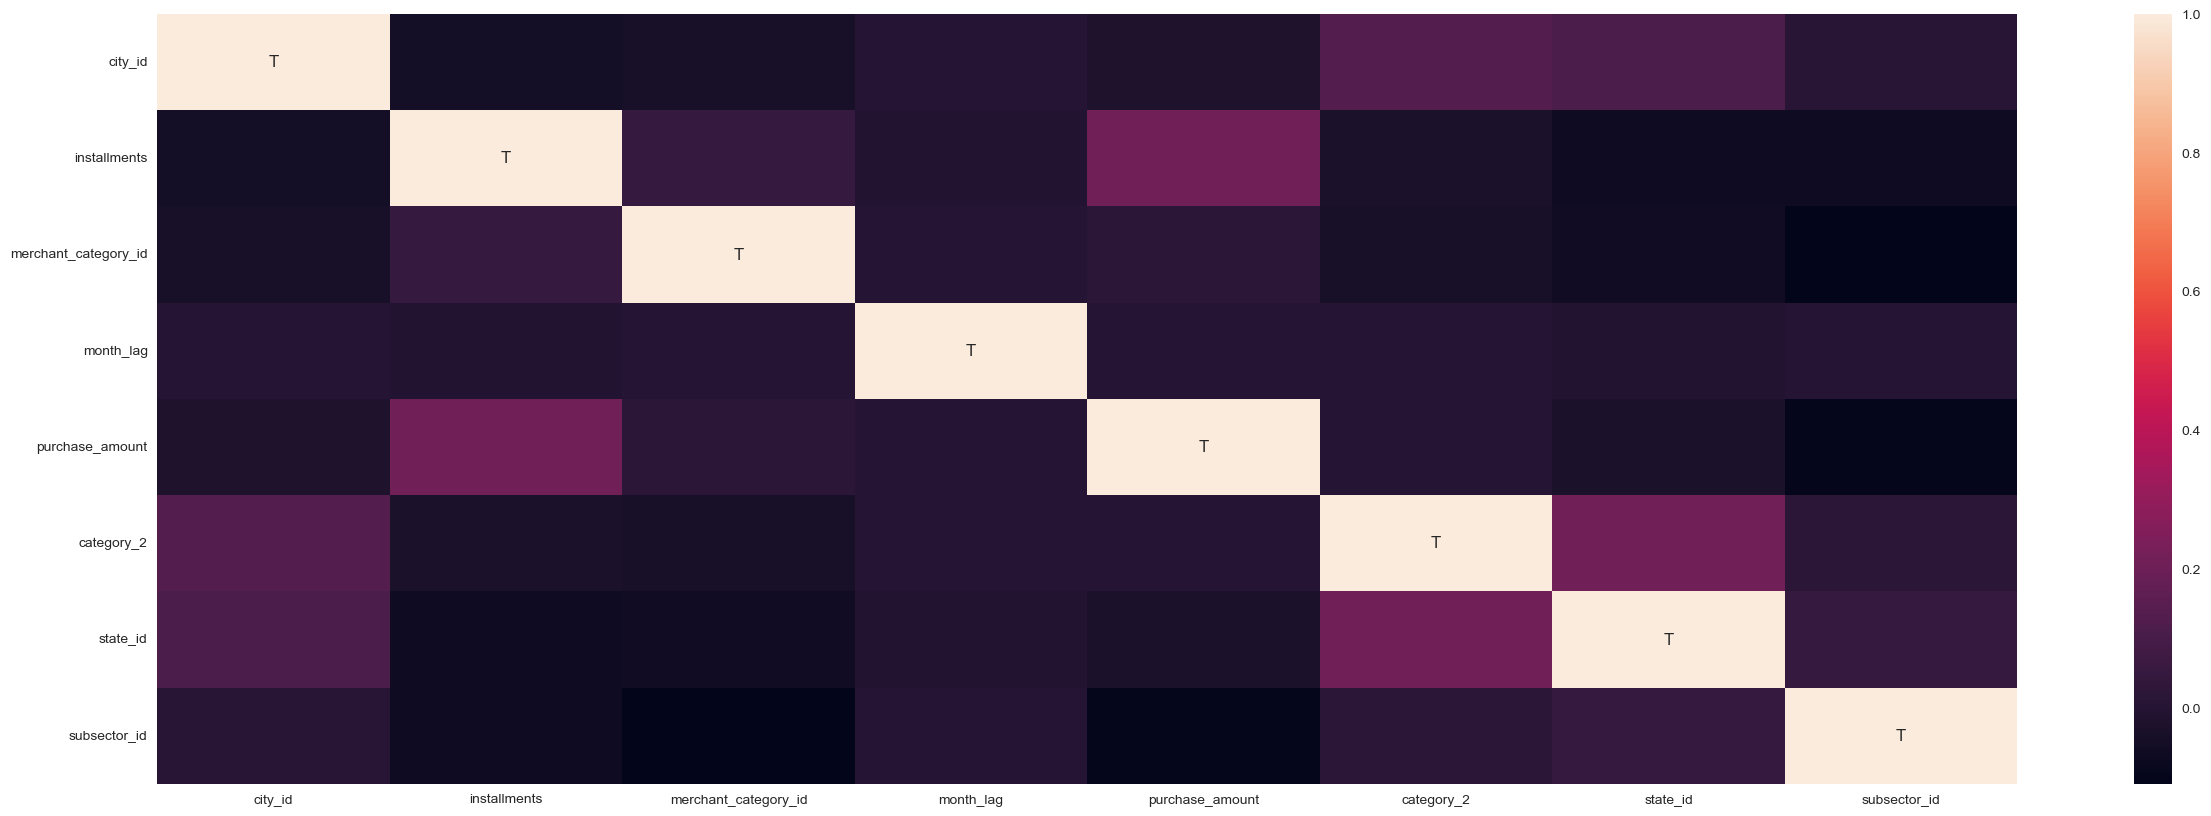

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
cor_df = new_transactions.corr(method = "pearson").round(2)
sns.heatmap(cor_df, ax=ax, annot=True)

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T'
# Plot hearmap with the annotations
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(cor_df, annot=annot_labels, fmt='')

- here we can't benefit from this correlation as there is a little corr between cols.

### Remove Noise

#### detect the outliers and remove them

In [ ]:
# Select a single column to remove outliers from
column_name = 'purchase_amount'

# Calculate the z-scores for the column
z_scores = (new_transactions['purchase_amount'] - new_transactions['purchase_amount'].mean()) / new_transactions['purchase_amount'].std()

# Identify the indices of the outliers
outlier_indices = z_scores.abs() > 3

# Remove the outliers from the DataFrame
new_transactions = new_transactions[~outlier_indices]


### Feature Engineering

In [ ]:

# Define the aggregation functions for each feature
aggregations = {'purchase_date': 'count', 'purchase_amount': 'mean', 'month_lag': 'mean',
               'merchant_id': lambda x: pd.Series.mode(x)[0], 'authorized_flag': lambda x: pd.Series.mode(x)[0],
                'city_id': lambda x: pd.Series.mode(x)[0],'merchant_category_id':lambda x: pd.Series.mode(x)[0]
               }
# Group the data by two columns and apply the defined aggregations
final_new_transactions = new_transactions.groupby('card_id').agg(aggregations)

# Print the result
final_new_transactions.head(10)

,purchase_date,purchase_amount,month_lag,merchant_id,authorized_flag,city_id,merchant_category_id
card_id,,,,,,,
C_ID_00007093c1,2,-0.664,2.000,M_ID_00a6ca8a8a,Y,69,222
C_ID_0001238066,26,-0.571,1.346,M_ID_00a6ca8a8a,Y,314,278
C_ID_0001506ef0,2,-0.724,1.000,M_ID_00a6ca8a8a,Y,137,360
C_ID_0001793786,29,-0.209,1.345,M_ID_0360f86430,Y,69,278
C_ID_000183fdda,11,-0.599,1.273,M_ID_113378fe3b,Y,161,367
C_ID_0002709b5a,3,-0.673,1.333,M_ID_00a6ca8a8a,Y,69,605
C_ID_000298032a,1,-0.642,2.000,M_ID_c33d6e0856,Y,23,432
C_ID_0002ba3c2e,3,-0.690,1.333,M_ID_1b64aff88d,Y,344,705
C_ID_0002c7c2c1,6,-0.655,1.500,M_ID_0bba934c74,Y,188,108


In [ ]:
# Concatenate the two DataFrames vertically
result = pd.concat([final_historical, final_new_transactions])

# Print the result
result

,purchase_date,purchase_amount,month_lag,merchant_id,authorized_flag,city_id,merchant_category_id
card_id,,,,,,,
C_ID_00007093c1,149,-0.516,-5.852,M_ID_9400cf2342,Y,244,307
C_ID_0001238066,123,-0.589,-1.813,M_ID_d17aabd756,Y,314,307
C_ID_0001506ef0,66,-0.524,-4.833,M_ID_b1fc88154d,Y,137,705
C_ID_0001793786,216,-0.170,-3.329,M_ID_923d57de8d,Y,179,278
C_ID_000183fdda,144,-0.478,-2.451,M_ID_f9cfe0a43b,Y,161,367
...,...,...,...,...,...,...,...
C_ID_ffff1d9928,4,-0.615,1.750,M_ID_2ad5c10ff1,Y,114,307
C_ID_ffff579d3a,1,-0.664,1.000,M_ID_69f80607d1,Y,69,419
C_ID_ffff756266,1,0.379,2.000,M_ID_b6b4f36675,Y,233,411


## Load merchants dataset

In [ ]:
#load the merchants dataset to our notebook
merchants = pd.read_csv('merchants.csv')

In [ ]:
#show the first 10 rows in data
merchants.head(10)
# we can also check the end of the table, why this might help? because sometimes there would be extra content provided by the data author at the end of the table and you keep that as part of the da
merchants.tail(10)
merchants.info()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057,-0.057,N,E,E,-0.400,...,-2.250,18.667,6,-2.320,13.917,12,N,242,9,1.000
1,M_ID_9339d880ad,3184,840,20,-0.057,-0.057,N,E,E,-0.720,...,-0.740,1.292,6,-0.570,1.688,12,N,22,16,1.000
2,M_ID_e726bbae1e,447,690,1,-0.057,-0.057,N,E,E,-82.130,...,-82.130,260.000,2,-82.130,260.000,2,N,-1,5,5.000
3,M_ID_a70e9c5f81,5026,792,9,-0.057,-0.057,Y,E,E,NaN,...,NaN,4.667,6,NaN,3.833,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057,-0.057,Y,E,E,NaN,...,NaN,0.361,6,NaN,0.347,12,Y,-1,-1,NaN
5,M_ID_a0915f62b5,20201,87,27,-0.057,-0.057,N,E,E,NaN,...,NaN,3.667,6,NaN,3.833,12,Y,160,21,5.000
6,M_ID_bfd41933db,33861,792,9,-0.057,-0.057,N,E,E,NaN,...,NaN,4.833,6,NaN,6.333,12,N,60,16,1.000
7,M_ID_d8ff08219e,16430,529,20,-0.057,-0.057,Y,E,E,NaN,...,NaN,1.667,6,NaN,1.500,11,Y,-1,-1,NaN
8,M_ID_c5b389236d,37179,813,29,-0.057,-0.057,N,E,E,NaN,...,NaN,189.917,6,NaN,197.000,7,N,248,15,1.000
9,M_ID_d2162ed113,112122,81,29,-0.057,-0.057,Y,E,E,NaN,...,NaN,1.000,2,NaN,1.000,2,Y,-1,-1,NaN


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
334686,M_ID_3111c6df35,107283,690,1,-0.057,-0.057,Y,A,A,0.950,...,0.900,0.968,6,0.790,0.891,12,Y,-1,-1,NaN
334687,M_ID_ca4d18b336,1145,437,15,0.171,-0.057,N,A,A,0.960,...,0.950,0.987,6,0.970,1.005,12,Y,69,9,1.000
334688,M_ID_59764e8cb1,17285,309,21,0.329,-0.057,Y,A,A,0.970,...,1.000,1.107,6,1.050,1.121,12,Y,-1,-1,NaN
334689,M_ID_5ba019a379,35,80,37,172.720,170.737,N,A,A,1.070,...,1.070,1.084,6,1.110,1.110,12,Y,69,9,1.000
334690,M_ID_a9d91682ad,35,241,17,-0.057,-0.057,Y,A,A,0.960,...,0.850,0.919,6,0.900,0.983,12,Y,-1,-1,NaN
334691,M_ID_1f4773aa76,1145,705,33,3.175,-0.048,N,A,A,1.000,...,0.990,1.020,6,1.000,1.025,12,Y,69,9,1.000
334692,M_ID_725a60d404,35,544,29,-0.057,-0.057,Y,A,A,0.890,...,0.780,0.813,6,0.590,0.607,12,Y,-1,-1,NaN
334693,M_ID_f2045dd267,35,561,7,-0.057,-0.057,N,A,A,0.960,...,0.900,0.925,6,0.740,0.751,8,Y,160,21,5.000
334694,M_ID_9139332ccc,35,511,7,-0.057,-0.057,Y,A,A,0.940,...,0.820,0.783,6,0.650,0.584,12,Y,-1,-1,NaN
334695,M_ID_cd2c0b07e9,35,606,17,-0.057,-0.057,N,A,A,0.900,...,0.730,0.744,6,0.530,0.540,10,Y,69,9,1.000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int64  
 2   merchant_category_id         334696 non-null  int64  
 3   subsector_id                 334696 non-null  int64  
 4   numerical_1                  334696 non-null  float64
 5   numerical_2                  334696 non-null  float64
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float64
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int64  
 12  avg_sales_lag6               334683 non-null  float64
 13 

In [ ]:
merchants.describe()
merchants.describe(include="all")

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
count,334696,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334696,334696,334696,334683.000000,...,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696,334696.000000,334696.000000,322809.000000
unique,334633,NaN,NaN,NaN,NaN,NaN,2,5,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,M_ID_42697d5d44,NaN,NaN,NaN,NaN,NaN,N,E,E,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
freq,4,NaN,NaN,NaN,NaN,NaN,327657,177104,175309,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,238596,NaN,NaN,NaN
mean,NaN,31028.736143,423.131663,25.116404,0.011476,0.008103,NaN,NaN,NaN,13.832993,...,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,NaN,102.917926,11.860942,2.380002
std,NaN,31623.043426,252.898046,9.807371,1.098154,1.070497,NaN,NaN,NaN,2395.489999,...,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,NaN,107.090673,6.176889,1.562661
min,NaN,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,NaN,NaN,NaN,-82.130000,...,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,NaN,-1.000000,-1.000000,1.000000
25%,NaN,3612.000000,222.000000,19.000000,-0.057471,-0.057471,NaN,NaN,NaN,0.880000,...,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,NaN,-1.000000,9.000000,1.000000
50%,NaN,19900.000000,373.000000,27.000000,-0.057471,-0.057471,NaN,NaN,NaN,1.000000,...,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,NaN,69.000000,9.000000,2.000000
75%,NaN,51707.250000,683.000000,33.000000,-0.047556,-0.047556,NaN,NaN,NaN,1.160000,...,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,NaN,182.000000,16.000000,4.000000


What are the findings from this step ?

1. We have 334696  data entries and 22 attributes.
2. as the data is not big so info() method is useful

### Check duplicated

In [ ]:
duplicated= merchants[merchants.duplicated()]
duplicated.count()
#as we see the output,there is no any duplicated

merchant_id                    0
merchant_group_id              0
merchant_category_id           0
subsector_id                   0
numerical_1                    0
numerical_2                    0
category_1                     0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             0
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             0
active_months_lag6             0
avg_sales_lag12                0
avg_purchases_lag12            0
active_months_lag12            0
category_4                     0
city_id                        0
state_id                       0
category_2                     0
dtype: int64

### Check unique

In [ ]:
def check_unique(merchants):
  ls=[]
  for col in merchants.columns:
    n=merchants[col].nunique()
    if n==1: ls.append(col)
    elif  n>100 and merchants[col].dtypes == object:
      ls.append(col)
  return ls

In [ ]:
drop_column_3=check_unique(merchants)
drop_column_3

['merchant_id']

- As we see here there is a unique column but i can't drop it as i will use it later to merge the dataset with another one.

### Check Null

In [ ]:
# Calculate the percentage of null values in each column
null_percentages = merchants.isnull().sum() / len(merchants) * 100

# Print the results
print(null_percentages)

merchant_id                    0.000000
merchant_group_id              0.000000
merchant_category_id           0.000000
subsector_id                   0.000000
numerical_1                    0.000000
numerical_2                    0.000000
category_1                     0.000000
most_recent_sales_range        0.000000
most_recent_purchases_range    0.000000
avg_sales_lag3                 0.003884
avg_purchases_lag3             0.000000
active_months_lag3             0.000000
avg_sales_lag6                 0.003884
avg_purchases_lag6             0.000000
active_months_lag6             0.000000
avg_sales_lag12                0.003884
avg_purchases_lag12            0.000000
active_months_lag12            0.000000
category_4                     0.000000
city_id                        0.000000
state_id                       0.000000
category_2                     3.551581
dtype: float64


#### Visulization the missing values

11926

<AxesSubplot:>

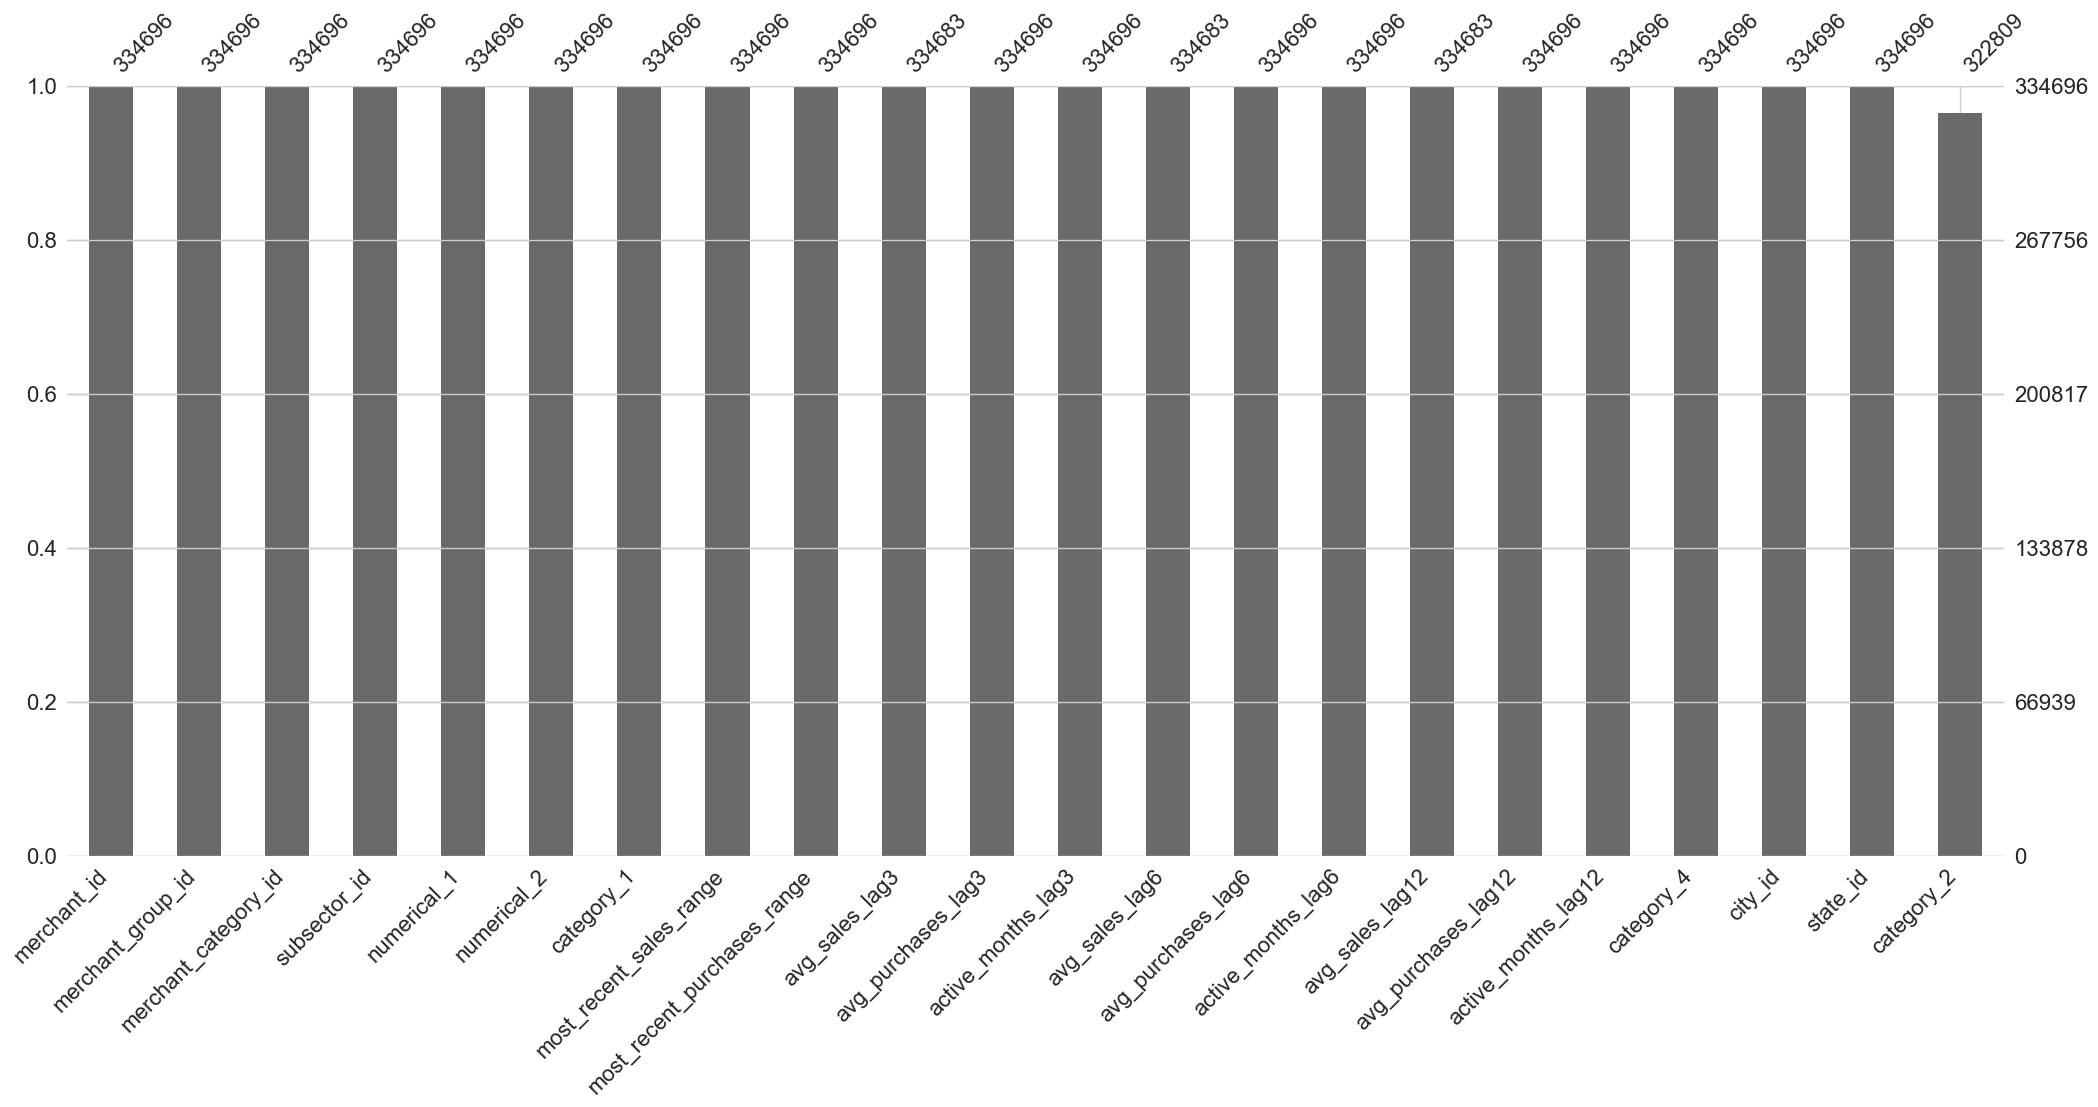

In [ ]:
# count the total number of missing values
merchants.isnull().values.sum()


# visualize using msno package, no need in this case, just give for demo purpose.
msno.bar(merchants)

<AxesSubplot:>

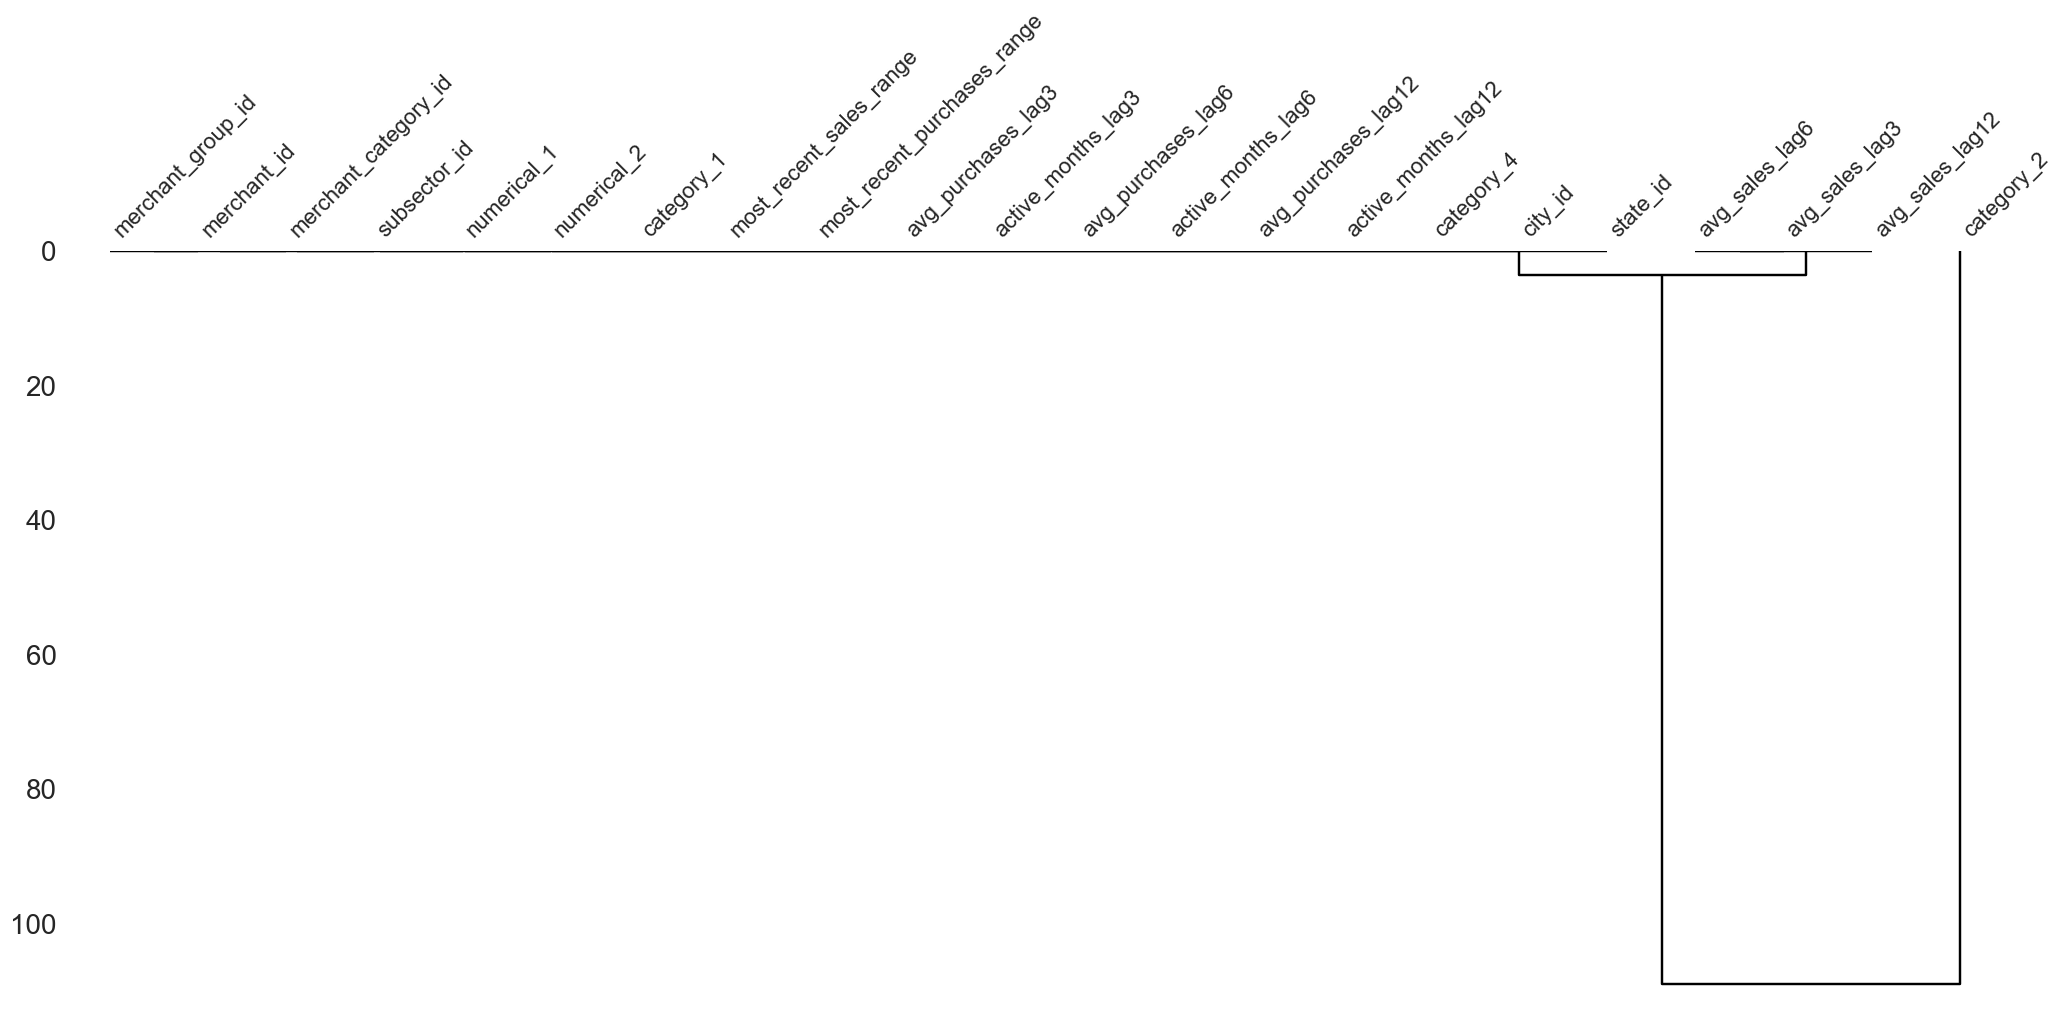

In [ ]:
# Create a dendrogram for missing data
msno.dendrogram(merchants)

<AxesSubplot:>

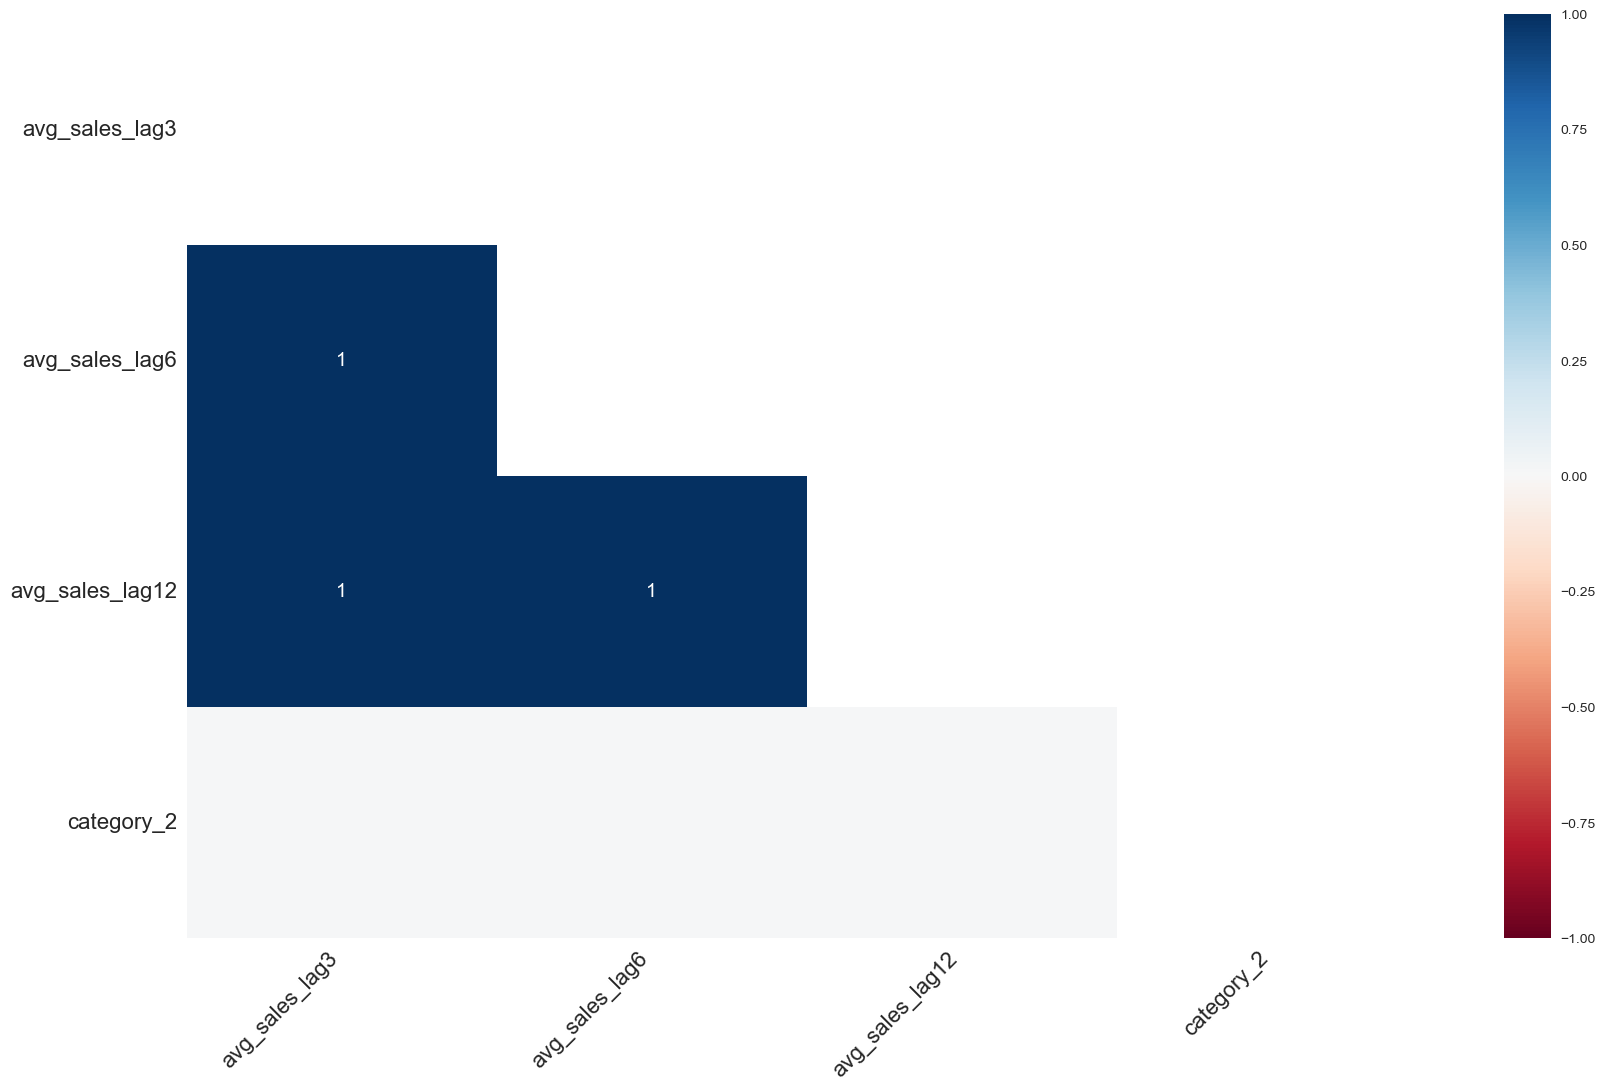

In [ ]:
# Create a heatmap for missing data
msno.heatmap(merchants)
plt.show()

<AxesSubplot:>

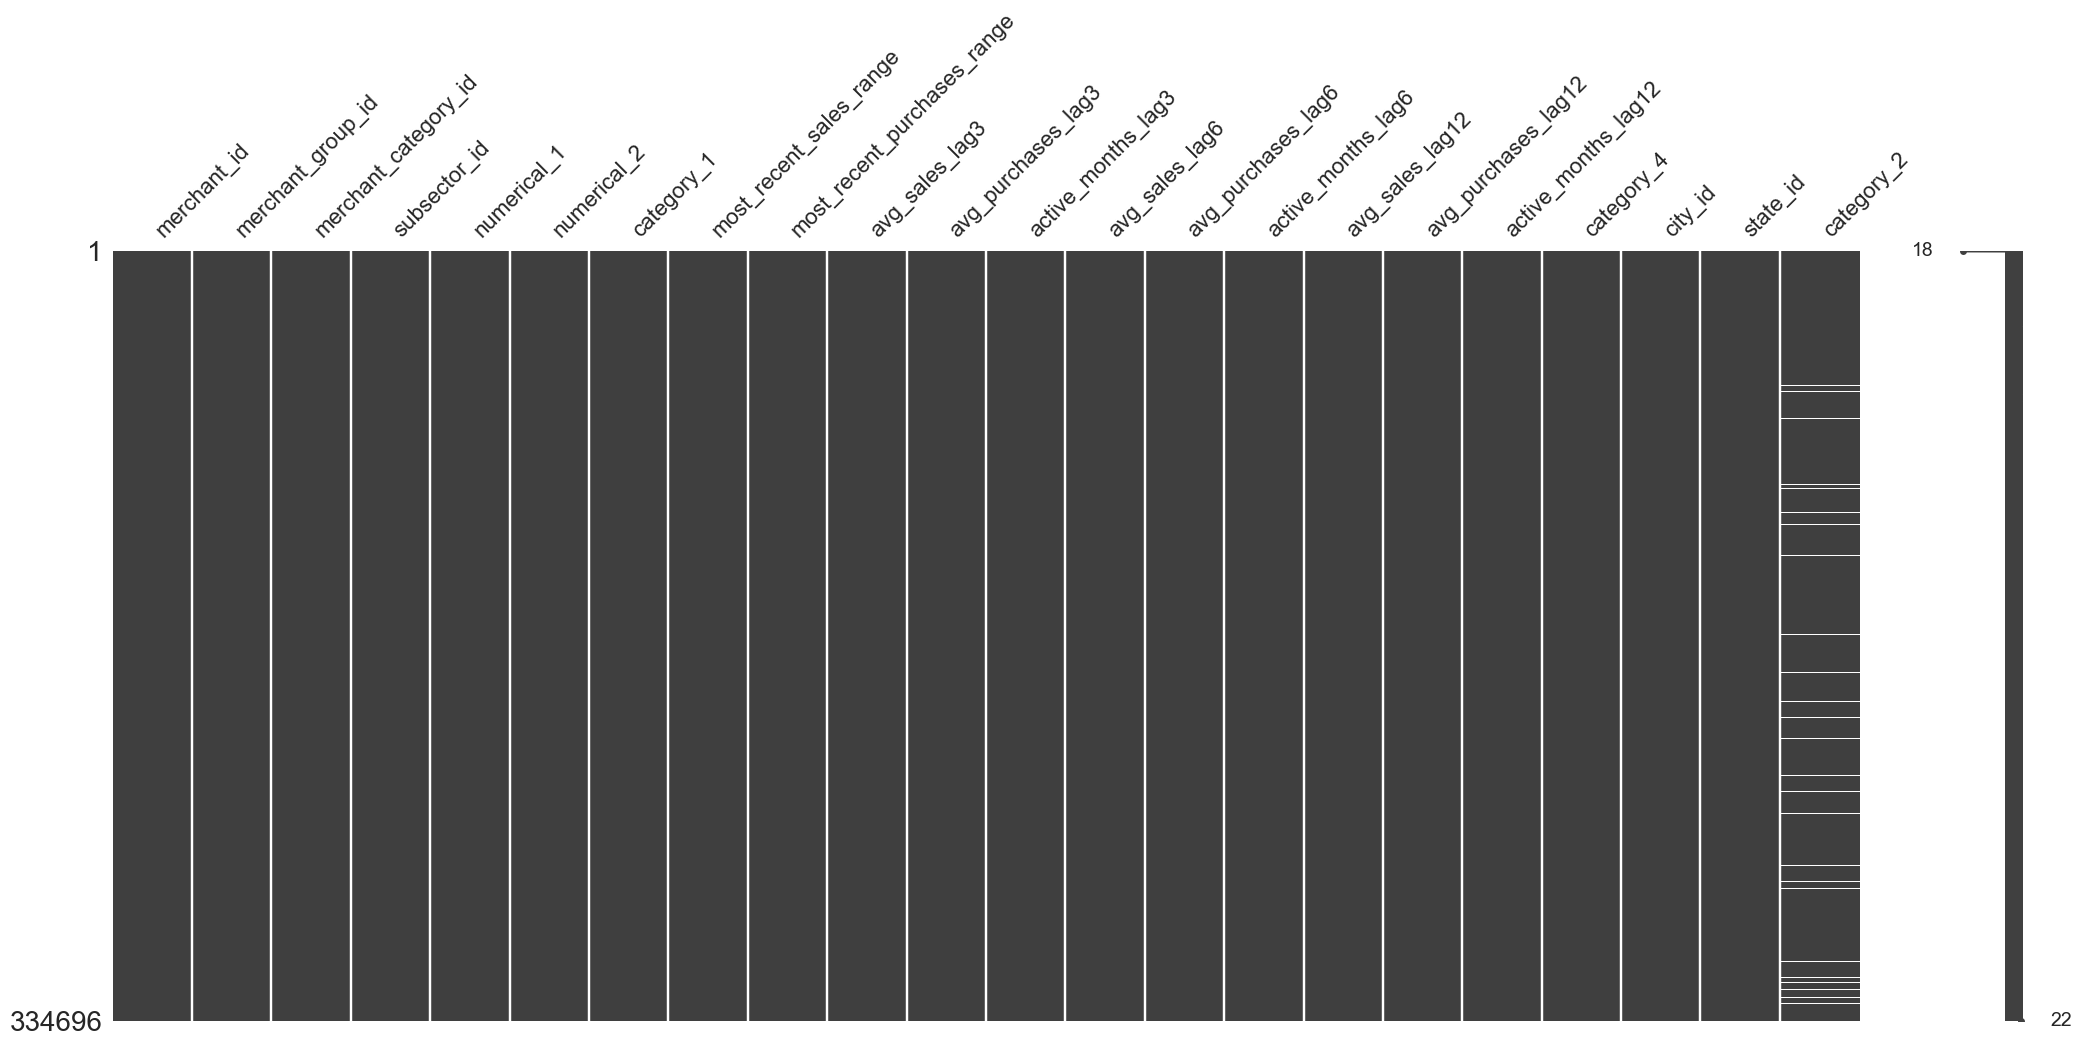

In [ ]:
msno.matrix(merchants)
plt.show()

- the pattern of missing datd is `general  pattern`
- Mechanisms of Missing Data
     - I think the mechanism of missing data here is `MAR(missing at random) ` of (avg_sales_lag3,avg_sales_lag6,avg_sales_lag12) and `MCAR (missing completely at Random)` of (category_2)
- How to deal with this missing data?
     - I will impute the missing data with aggregation function as they consider object datatype although their datatype shown as float when call info() method.

### Apply Imputation

In [ ]:
# Calculate the mode of the column
mode_value = merchants["category_2"].mode().iloc[0]

# Impute the missing values with the mode
merchants["category_2"].fillna(mode_value, inplace=True)

# Print the result
merchants.head(10)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057,-0.057,N,E,E,-0.400,...,-2.250,18.667,6,-2.320,13.917,12,N,242,9,1.000
1,M_ID_9339d880ad,3184,840,20,-0.057,-0.057,N,E,E,-0.720,...,-0.740,1.292,6,-0.570,1.688,12,N,22,16,1.000
2,M_ID_e726bbae1e,447,690,1,-0.057,-0.057,N,E,E,-82.130,...,-82.130,260.000,2,-82.130,260.000,2,N,-1,5,5.000
3,M_ID_a70e9c5f81,5026,792,9,-0.057,-0.057,Y,E,E,NaN,...,NaN,4.667,6,NaN,3.833,12,Y,-1,-1,1.000
4,M_ID_64456c37ce,2228,222,21,-0.057,-0.057,Y,E,E,NaN,...,NaN,0.361,6,NaN,0.347,12,Y,-1,-1,1.000
5,M_ID_a0915f62b5,20201,87,27,-0.057,-0.057,N,E,E,NaN,...,NaN,3.667,6,NaN,3.833,12,Y,160,21,5.000
6,M_ID_bfd41933db,33861,792,9,-0.057,-0.057,N,E,E,NaN,...,NaN,4.833,6,NaN,6.333,12,N,60,16,1.000
7,M_ID_d8ff08219e,16430,529,20,-0.057,-0.057,Y,E,E,NaN,...,NaN,1.667,6,NaN,1.500,11,Y,-1,-1,1.000
8,M_ID_c5b389236d,37179,813,29,-0.057,-0.057,N,E,E,NaN,...,NaN,189.917,6,NaN,197.000,7,N,248,15,1.000
9,M_ID_d2162ed113,112122,81,29,-0.057,-0.057,Y,E,E,NaN,...,NaN,1.000,2,NaN,1.000,2,Y,-1,-1,1.000


In [ ]:
# Calculate the mode of the column
mode_value = merchants["avg_sales_lag3"].mode().iloc[0]

# Impute the missing values with the mode
merchants["avg_sales_lag3"].fillna(mode_value, inplace=True)

# Print the result
merchants.head(10)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057,-0.057,N,E,E,-0.400,...,-2.250,18.667,6,-2.320,13.917,12,N,242,9,1.000
1,M_ID_9339d880ad,3184,840,20,-0.057,-0.057,N,E,E,-0.720,...,-0.740,1.292,6,-0.570,1.688,12,N,22,16,1.000
2,M_ID_e726bbae1e,447,690,1,-0.057,-0.057,N,E,E,-82.130,...,-82.130,260.000,2,-82.130,260.000,2,N,-1,5,5.000
3,M_ID_a70e9c5f81,5026,792,9,-0.057,-0.057,Y,E,E,1.000,...,NaN,4.667,6,NaN,3.833,12,Y,-1,-1,1.000
4,M_ID_64456c37ce,2228,222,21,-0.057,-0.057,Y,E,E,1.000,...,NaN,0.361,6,NaN,0.347,12,Y,-1,-1,1.000
5,M_ID_a0915f62b5,20201,87,27,-0.057,-0.057,N,E,E,1.000,...,NaN,3.667,6,NaN,3.833,12,Y,160,21,5.000
6,M_ID_bfd41933db,33861,792,9,-0.057,-0.057,N,E,E,1.000,...,NaN,4.833,6,NaN,6.333,12,N,60,16,1.000
7,M_ID_d8ff08219e,16430,529,20,-0.057,-0.057,Y,E,E,1.000,...,NaN,1.667,6,NaN,1.500,11,Y,-1,-1,1.000
8,M_ID_c5b389236d,37179,813,29,-0.057,-0.057,N,E,E,1.000,...,NaN,189.917,6,NaN,197.000,7,N,248,15,1.000
9,M_ID_d2162ed113,112122,81,29,-0.057,-0.057,Y,E,E,1.000,...,NaN,1.000,2,NaN,1.000,2,Y,-1,-1,1.000


In [ ]:
# Calculate the mode of the column
mode_value = merchants["avg_sales_lag6"].mode().iloc[0]

# Impute the missing values with the mode
merchants["avg_sales_lag6"].fillna(mode_value, inplace=True)

# Print the result
merchants.head(10)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057,-0.057,N,E,E,-0.400,...,-2.250,18.667,6,-2.320,13.917,12,N,242,9,1.000
1,M_ID_9339d880ad,3184,840,20,-0.057,-0.057,N,E,E,-0.720,...,-0.740,1.292,6,-0.570,1.688,12,N,22,16,1.000
2,M_ID_e726bbae1e,447,690,1,-0.057,-0.057,N,E,E,-82.130,...,-82.130,260.000,2,-82.130,260.000,2,N,-1,5,5.000
3,M_ID_a70e9c5f81,5026,792,9,-0.057,-0.057,Y,E,E,1.000,...,1.000,4.667,6,NaN,3.833,12,Y,-1,-1,1.000
4,M_ID_64456c37ce,2228,222,21,-0.057,-0.057,Y,E,E,1.000,...,1.000,0.361,6,NaN,0.347,12,Y,-1,-1,1.000
5,M_ID_a0915f62b5,20201,87,27,-0.057,-0.057,N,E,E,1.000,...,1.000,3.667,6,NaN,3.833,12,Y,160,21,5.000
6,M_ID_bfd41933db,33861,792,9,-0.057,-0.057,N,E,E,1.000,...,1.000,4.833,6,NaN,6.333,12,N,60,16,1.000
7,M_ID_d8ff08219e,16430,529,20,-0.057,-0.057,Y,E,E,1.000,...,1.000,1.667,6,NaN,1.500,11,Y,-1,-1,1.000
8,M_ID_c5b389236d,37179,813,29,-0.057,-0.057,N,E,E,1.000,...,1.000,189.917,6,NaN,197.000,7,N,248,15,1.000
9,M_ID_d2162ed113,112122,81,29,-0.057,-0.057,Y,E,E,1.000,...,1.000,1.000,2,NaN,1.000,2,Y,-1,-1,1.000


In [ ]:
# Calculate the mode of the column
mode_value = merchants["avg_sales_lag12"].mode().iloc[0]

# Impute the missing values with the mode
merchants["avg_sales_lag12"].fillna(mode_value, inplace=True)

# Print the result
merchants.head(10)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057,-0.057,N,E,E,-0.400,...,-2.250,18.667,6,-2.320,13.917,12,N,242,9,1.000
1,M_ID_9339d880ad,3184,840,20,-0.057,-0.057,N,E,E,-0.720,...,-0.740,1.292,6,-0.570,1.688,12,N,22,16,1.000
2,M_ID_e726bbae1e,447,690,1,-0.057,-0.057,N,E,E,-82.130,...,-82.130,260.000,2,-82.130,260.000,2,N,-1,5,5.000
3,M_ID_a70e9c5f81,5026,792,9,-0.057,-0.057,Y,E,E,1.000,...,1.000,4.667,6,1.000,3.833,12,Y,-1,-1,1.000
4,M_ID_64456c37ce,2228,222,21,-0.057,-0.057,Y,E,E,1.000,...,1.000,0.361,6,1.000,0.347,12,Y,-1,-1,1.000
5,M_ID_a0915f62b5,20201,87,27,-0.057,-0.057,N,E,E,1.000,...,1.000,3.667,6,1.000,3.833,12,Y,160,21,5.000
6,M_ID_bfd41933db,33861,792,9,-0.057,-0.057,N,E,E,1.000,...,1.000,4.833,6,1.000,6.333,12,N,60,16,1.000
7,M_ID_d8ff08219e,16430,529,20,-0.057,-0.057,Y,E,E,1.000,...,1.000,1.667,6,1.000,1.500,11,Y,-1,-1,1.000
8,M_ID_c5b389236d,37179,813,29,-0.057,-0.057,N,E,E,1.000,...,1.000,189.917,6,1.000,197.000,7,N,248,15,1.000
9,M_ID_d2162ed113,112122,81,29,-0.057,-0.057,Y,E,E,1.000,...,1.000,1.000,2,1.000,1.000,2,Y,-1,-1,1.000


In [ ]:
merchants.isnull().values.sum()
# so, Now we don't have any null on our dataset

0

### detect Noise

- First, maybe there are outlier but it's important to model to learn so we can't remove them.
- second, for the consistency of data, we found `category_1 and category_2` which are exist in merchants table and also historical and new_transaction table are consistent and have the same values so the all data is consistant.

In [ ]:

# Calculate z-scores for each column
z_scores = np.abs((merchants - merchants.mean()) / merchants.std())

# Find values that are more than 3 standard deviations away from the mean
outliers = merchants[(z_scores > 3).any(axis=1)]

# Print the outliers
outliers

C:\Users\Lap-5\AppData\Local\Temp\ipykernel_13968\3404310517.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((merchants - merchants.mean()) / merchants.std())


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
2,M_ID_e726bbae1e,447,690,1,-0.057,-0.057,N,E,E,-82.130,...,-82.130,260.000,2,-82.130,260.000,2,N,-1,5,5.000
8,M_ID_c5b389236d,37179,813,29,-0.057,-0.057,N,E,E,1.000,...,1.000,189.917,6,1.000,197.000,7,N,248,15,1.000
9,M_ID_d2162ed113,112122,81,29,-0.057,-0.057,Y,E,E,1.000,...,1.000,1.000,2,1.000,1.000,2,Y,-1,-1,1.000
13,M_ID_a31332e0bc,15040,427,27,-0.057,-0.057,N,E,E,1.000,...,1.000,1.000,1,1.000,1.000,1,Y,158,15,1.000
14,M_ID_c9eb20f6f5,25449,45,18,-0.057,-0.057,N,E,E,1.000,...,1.000,1.667,3,1.000,1.667,3,N,-1,16,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334675,M_ID_d855771cd9,35,278,37,129.322,128.549,N,A,A,1.150,...,1.260,1.227,6,1.300,1.271,12,N,-1,9,1.000
334678,M_ID_98b342c0e3,35,80,37,183.735,182.079,N,A,A,1.150,...,1.250,1.227,6,1.290,1.261,12,N,-1,9,1.000
334679,M_ID_b98db225f5,35,705,33,107.648,107.133,N,A,A,1.110,...,1.190,1.182,6,1.260,1.234,12,N,-1,9,1.000
334685,M_ID_f86439cec0,35,278,37,117.831,116.889,N,A,A,1.080,...,1.090,1.096,6,1.130,1.126,12,Y,69,9,1.000


### Check Correlation

<AxesSubplot:>

<AxesSubplot:>

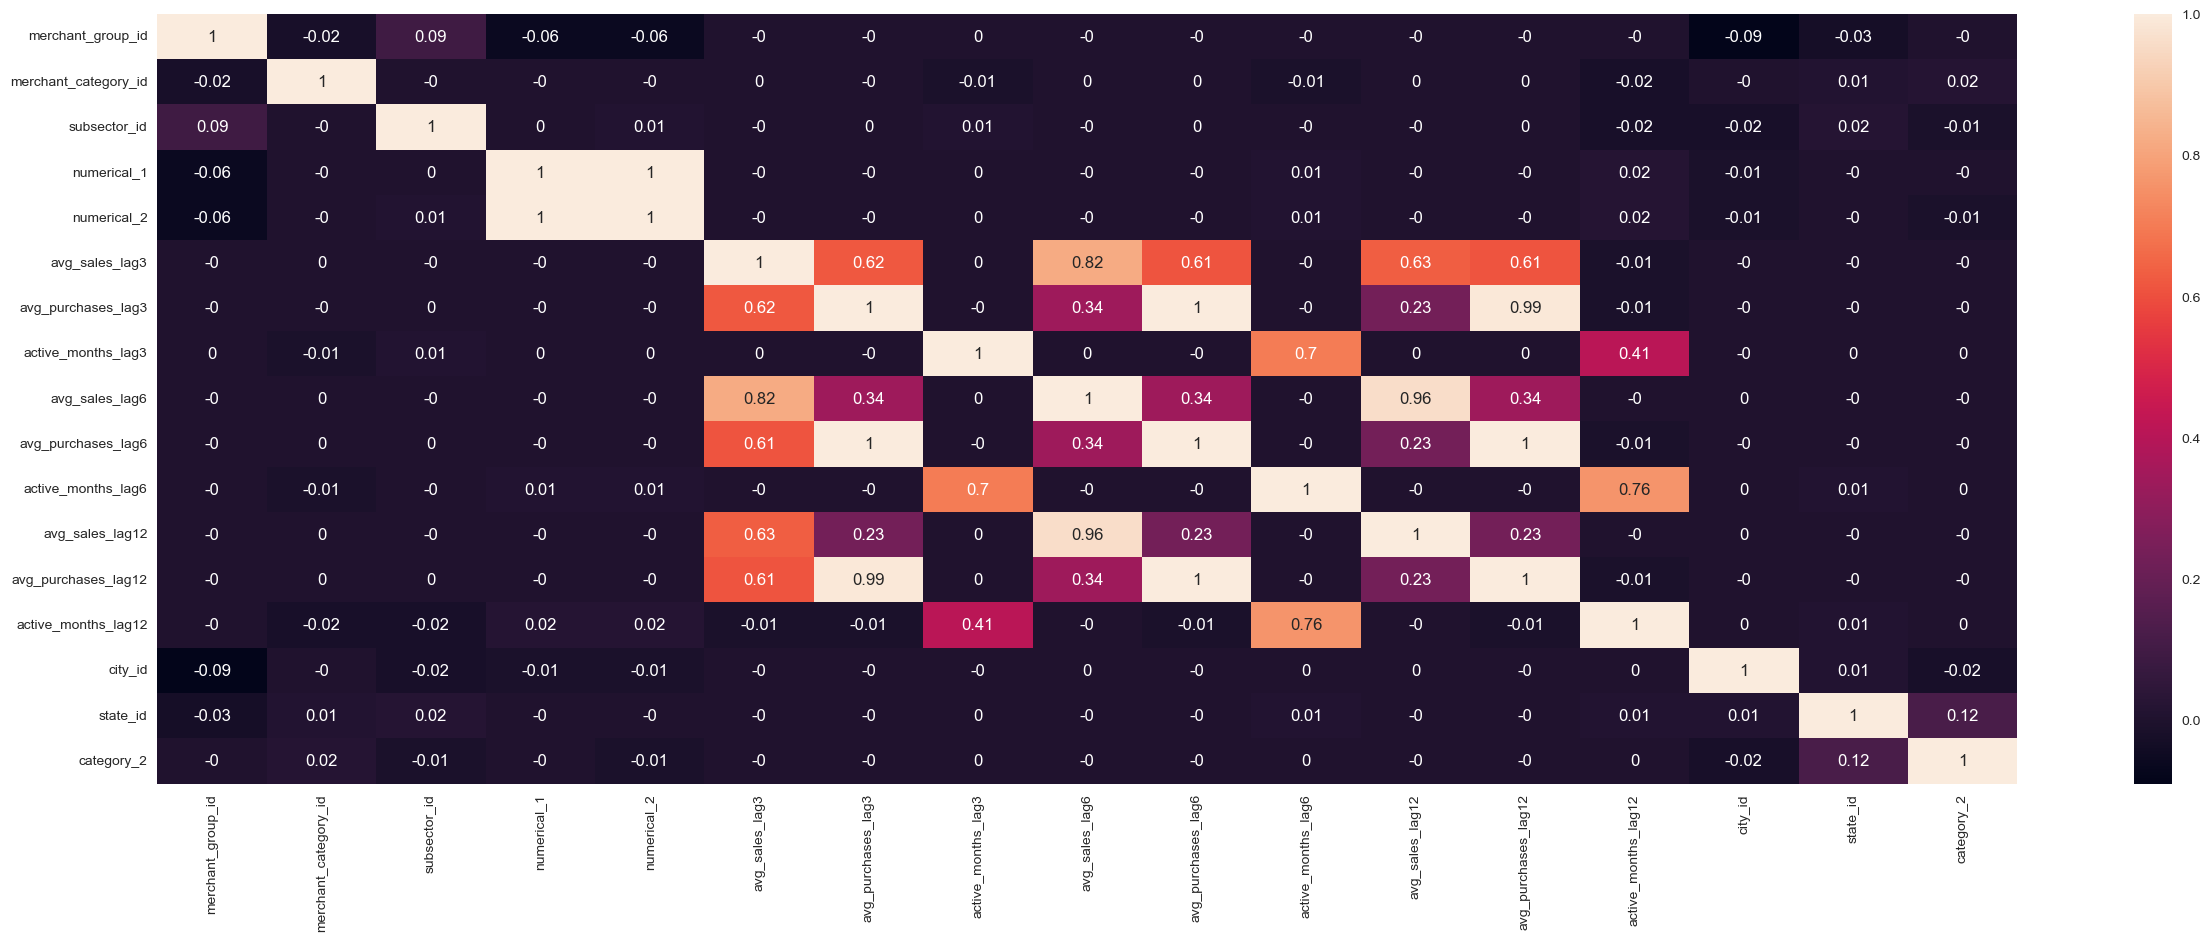

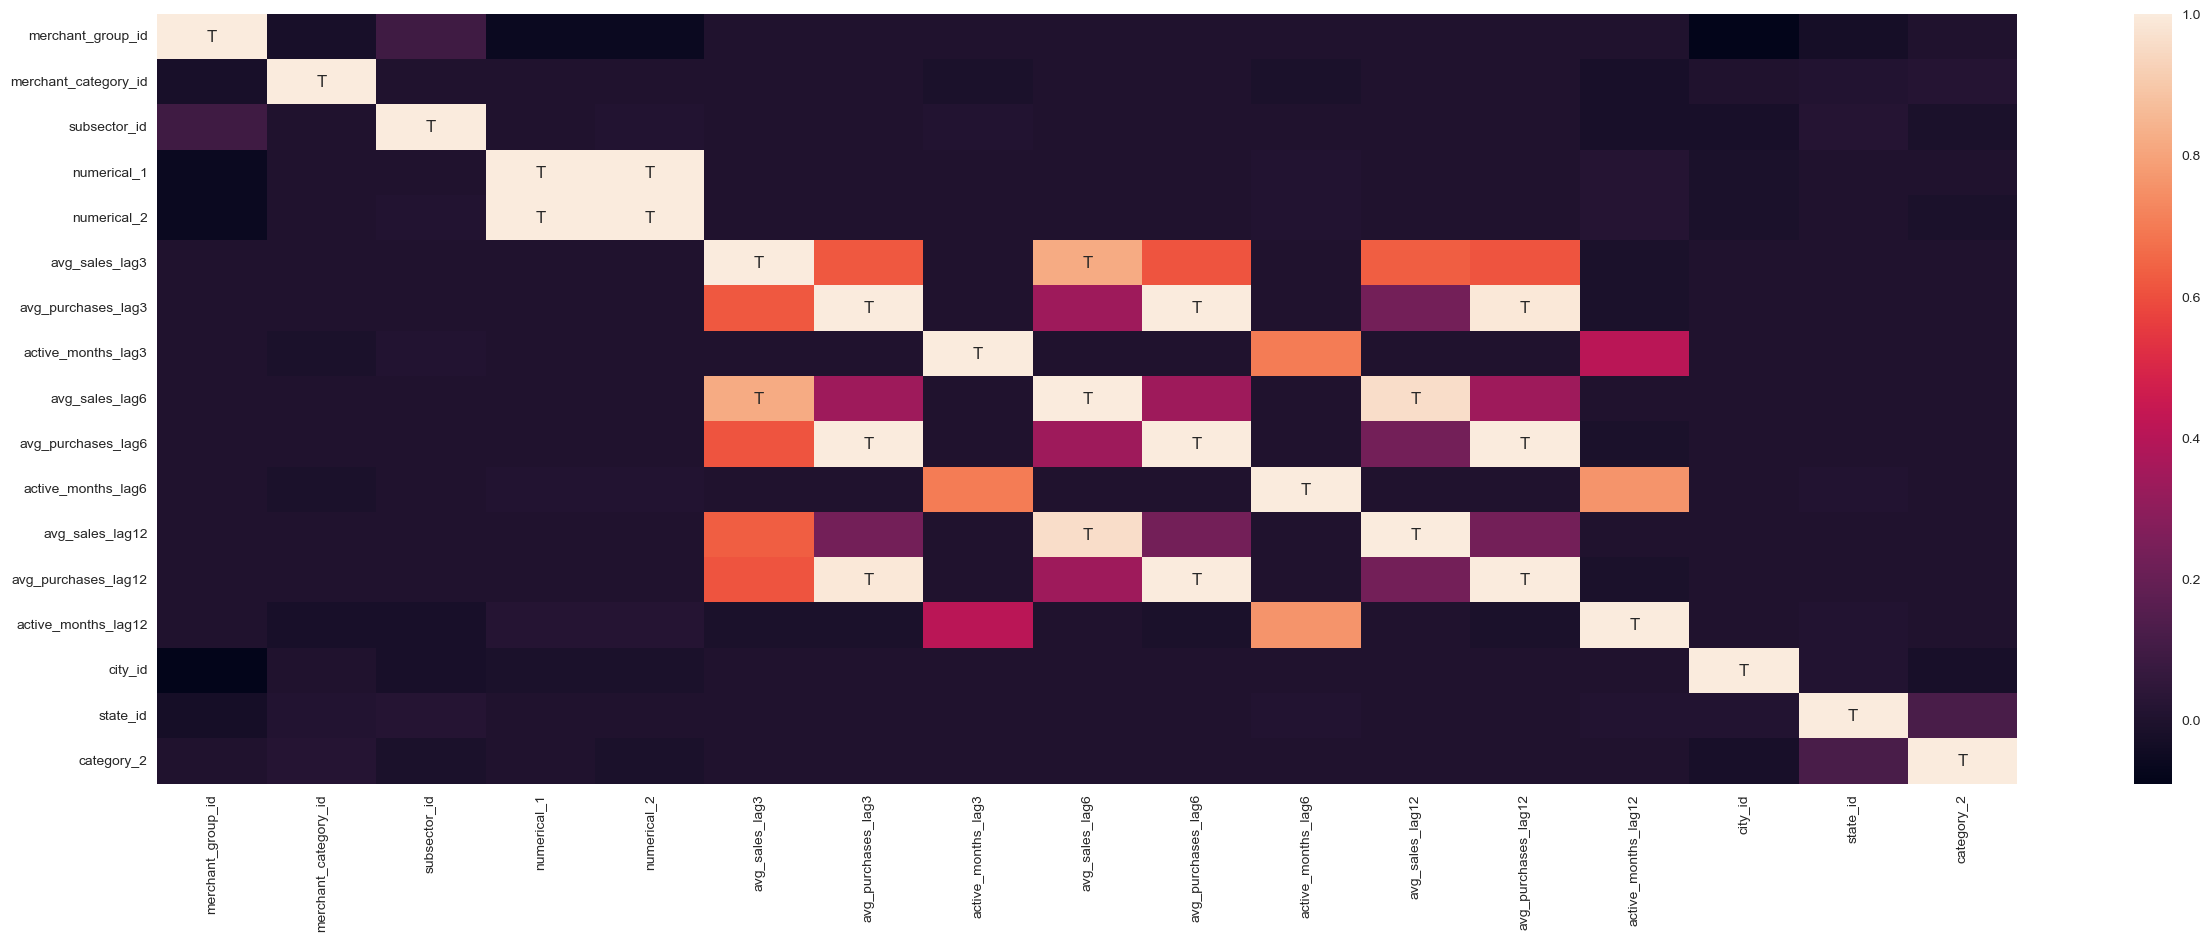

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
cor_df = merchants.corr(method = "pearson").round(2)
sns.heatmap(cor_df, ax=ax, annot=True)

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T'
# Plot hearmap with the annotations
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(cor_df, annot=annot_labels, fmt='')

## Load userscore dataset

In [ ]:
#load the historical_transactions dataset to our notebook
userscore = pd.read_csv('userscore.csv')

In [ ]:
#show the first 10 rows in data
userscore.head(10)
# we can also check the end of the table, why this might help? because sometimes there would be extra content provided by the data author at the end of the table and you keep that as part of the da
userscore.tail(10)
userscore.info()

,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820
1,C_ID_3d0044924f,Jan-17,4,1,0,0.393
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.160
5,C_ID_0894217f2f,Sep-16,4,2,0,0.872
6,C_ID_7e63323c00,Dec-16,3,2,1,0.230
7,C_ID_dfa21fc124,Sep-17,3,2,1,2.136
8,C_ID_fe0fdac8ea,Aug-17,2,1,0,-0.065
9,C_ID_bf62c0b49d,Aug-16,2,2,0,0.300


,card_id,first_active_month,feature_1,feature_2,feature_3,score
201907,C_ID_598ecf1dfe,Jun-17,2,1,0,0.146
201908,C_ID_c2124fa8ce,Jun-16,3,3,1,0.319
201909,C_ID_64545039d3,Oct-14,5,1,1,-0.822
201910,C_ID_9072609210,Oct-17,2,3,0,-1.753
201911,C_ID_0443db161f,Feb-15,3,3,1,0.100
201912,C_ID_963962de2c,Sep-17,3,2,1,-2.741
201913,C_ID_1314773c0b,Oct-15,3,1,1,0.313
201914,C_ID_7666735b3d,Aug-17,4,3,0,0.093
201915,C_ID_73f5a0efd0,Jul-16,3,2,1,-4.677
201916,C_ID_92c9984c58,Jul-17,3,1,1,-1.859


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   card_id             201917 non-null  object 
 1   first_active_month  201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   score               201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [ ]:
userscore.describe()
userscore.describe(include="all")

,feature_1,feature_2,feature_3,score
count,201917.000,201917.000,201917.000,201917.000
mean,3.105,1.745,0.566,-0.394
std,1.186,0.751,0.496,3.850
min,1.000,1.000,0.000,-33.219
25%,2.000,1.000,0.000,-0.883
50%,3.000,2.000,1.000,-0.023
75%,4.000,2.000,1.000,0.765
max,5.000,3.000,1.000,17.965


,card_id,first_active_month,feature_1,feature_2,feature_3,score
count,201917,201917,201917.000,201917.000,201917.000,201917.000
unique,201917,75,NaN,NaN,NaN,NaN
top,C_ID_92a2005557,Sep-17,NaN,NaN,NaN,NaN
freq,1,13878,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.105,1.745,0.566,-0.394
std,NaN,NaN,1.186,0.751,0.496,3.850
min,NaN,NaN,1.000,1.000,0.000,-33.219
25%,NaN,NaN,2.000,1.000,0.000,-0.883
50%,NaN,NaN,3.000,2.000,1.000,-0.023
75%,NaN,NaN,4.000,2.000,1.000,0.765


What are the findings from this step ?

1. We have 201917 entries and 6 attributes.
2. As the data is not big so info() method is useful

### check duplicated

In [ ]:
duplicated= userscore[userscore.duplicated()]
duplicated.count()
#as we see the output,there is no any duplicated

card_id               0
first_active_month    0
feature_1             0
feature_2             0
feature_3             0
score                 0
dtype: int64

### Check unique

In [ ]:
def check_unique(userscore):
  ls=[]
  for col in userscore.columns:
    n=userscore[col].nunique()
    if n==1: ls.append(col)
    elif  n>100 and userscore[col].dtypes == object:
      ls.append(col)
  return ls

In [ ]:
drop_column_4=check_unique(userscore)
drop_column_4

['card_id']

- As we see here there is a unique column but i can't drop it as i will use it later to merge the dataset with another one.

### Check Null

In [ ]:
# Calculate the percentage of null values in each column
null_percentages = userscore.isnull().sum() / len(userscore) * 100

# Print the results
print(null_percentages)

card_id              0.000
first_active_month   0.000
feature_1            0.000
feature_2            0.000
feature_3            0.000
score                0.000
dtype: float64


- as we see here there is no any NULL in this dataset

#### Visulization the missing values

0

<AxesSubplot:>

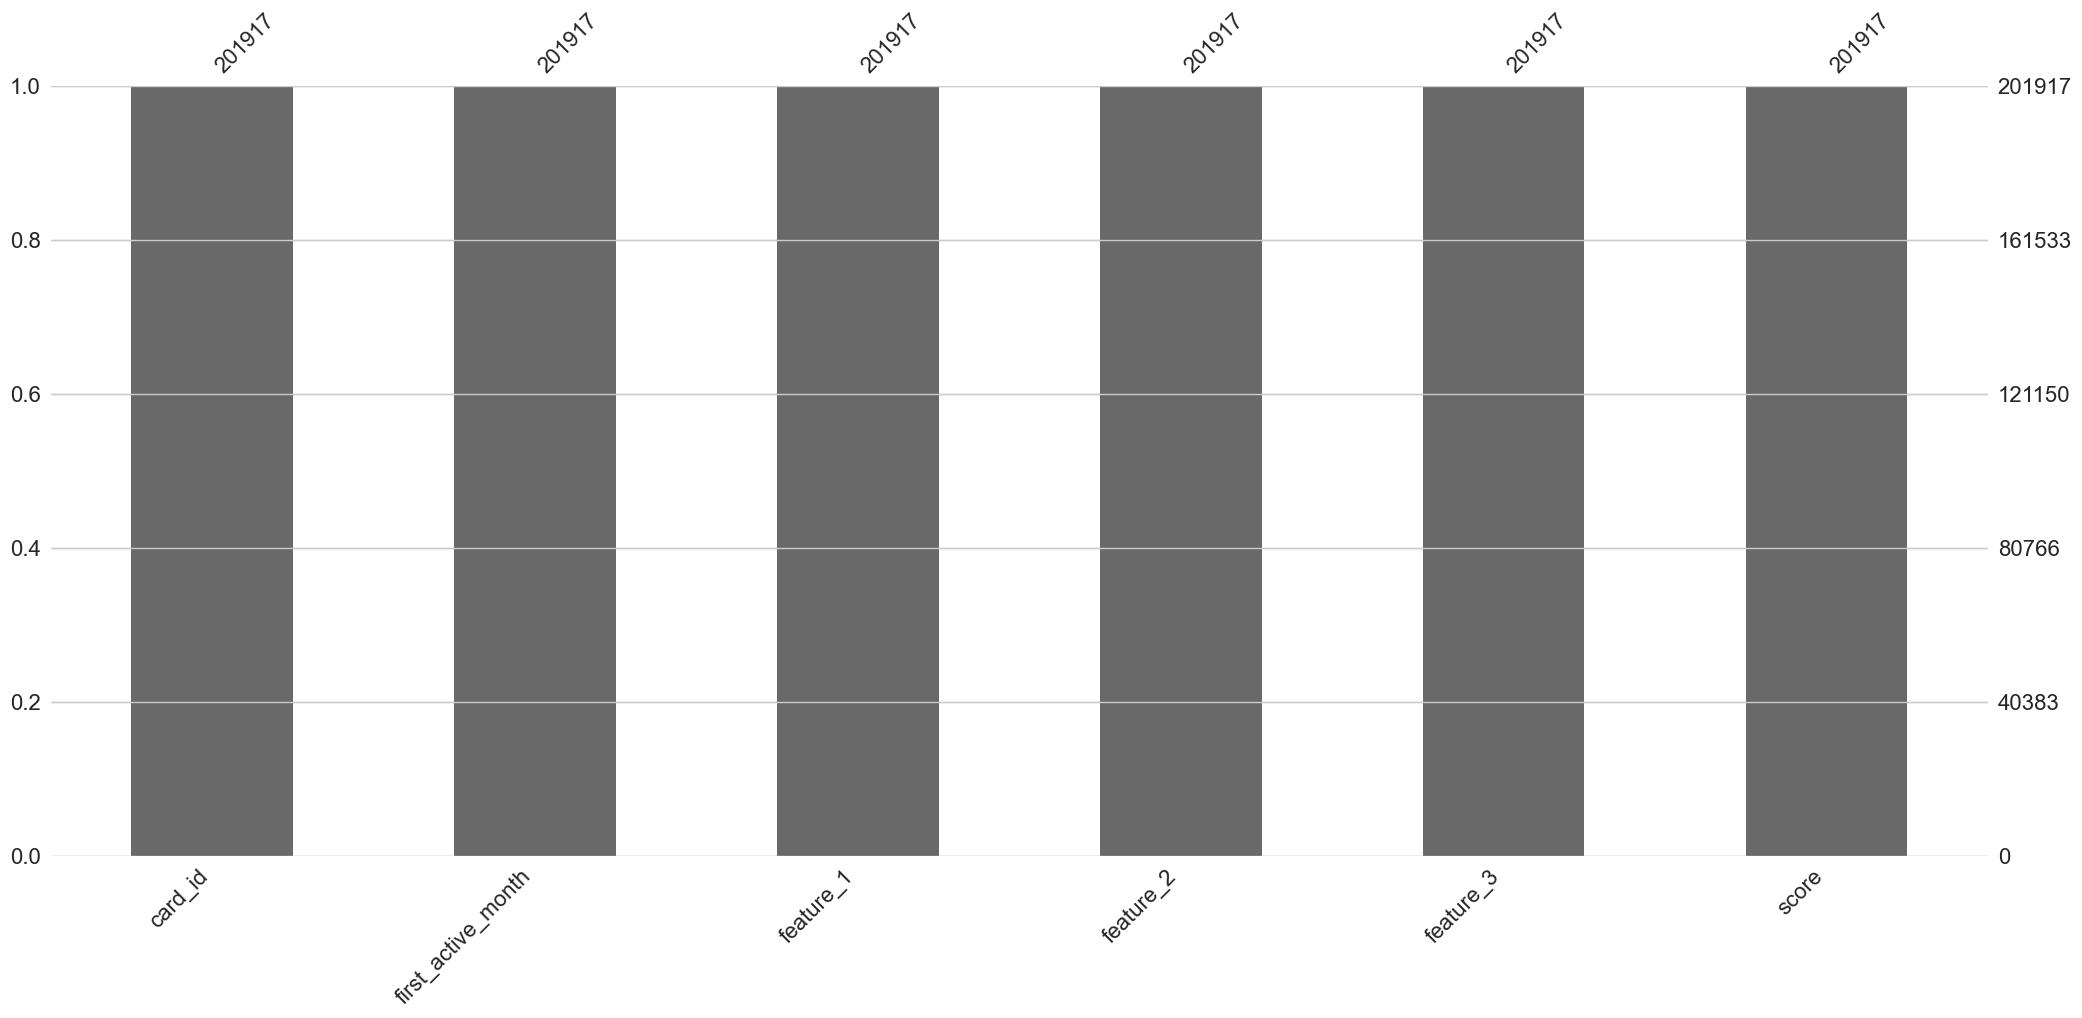

In [ ]:
# count the total number of missing values
userscore.isnull().values.sum()


# visualize using msno package, no need in this case, just give for demo purpose.
msno.bar(userscore)

- As we see there is no any missing data so we can't detect the pattern or machanism.

<AxesSubplot:>

<AxesSubplot:>

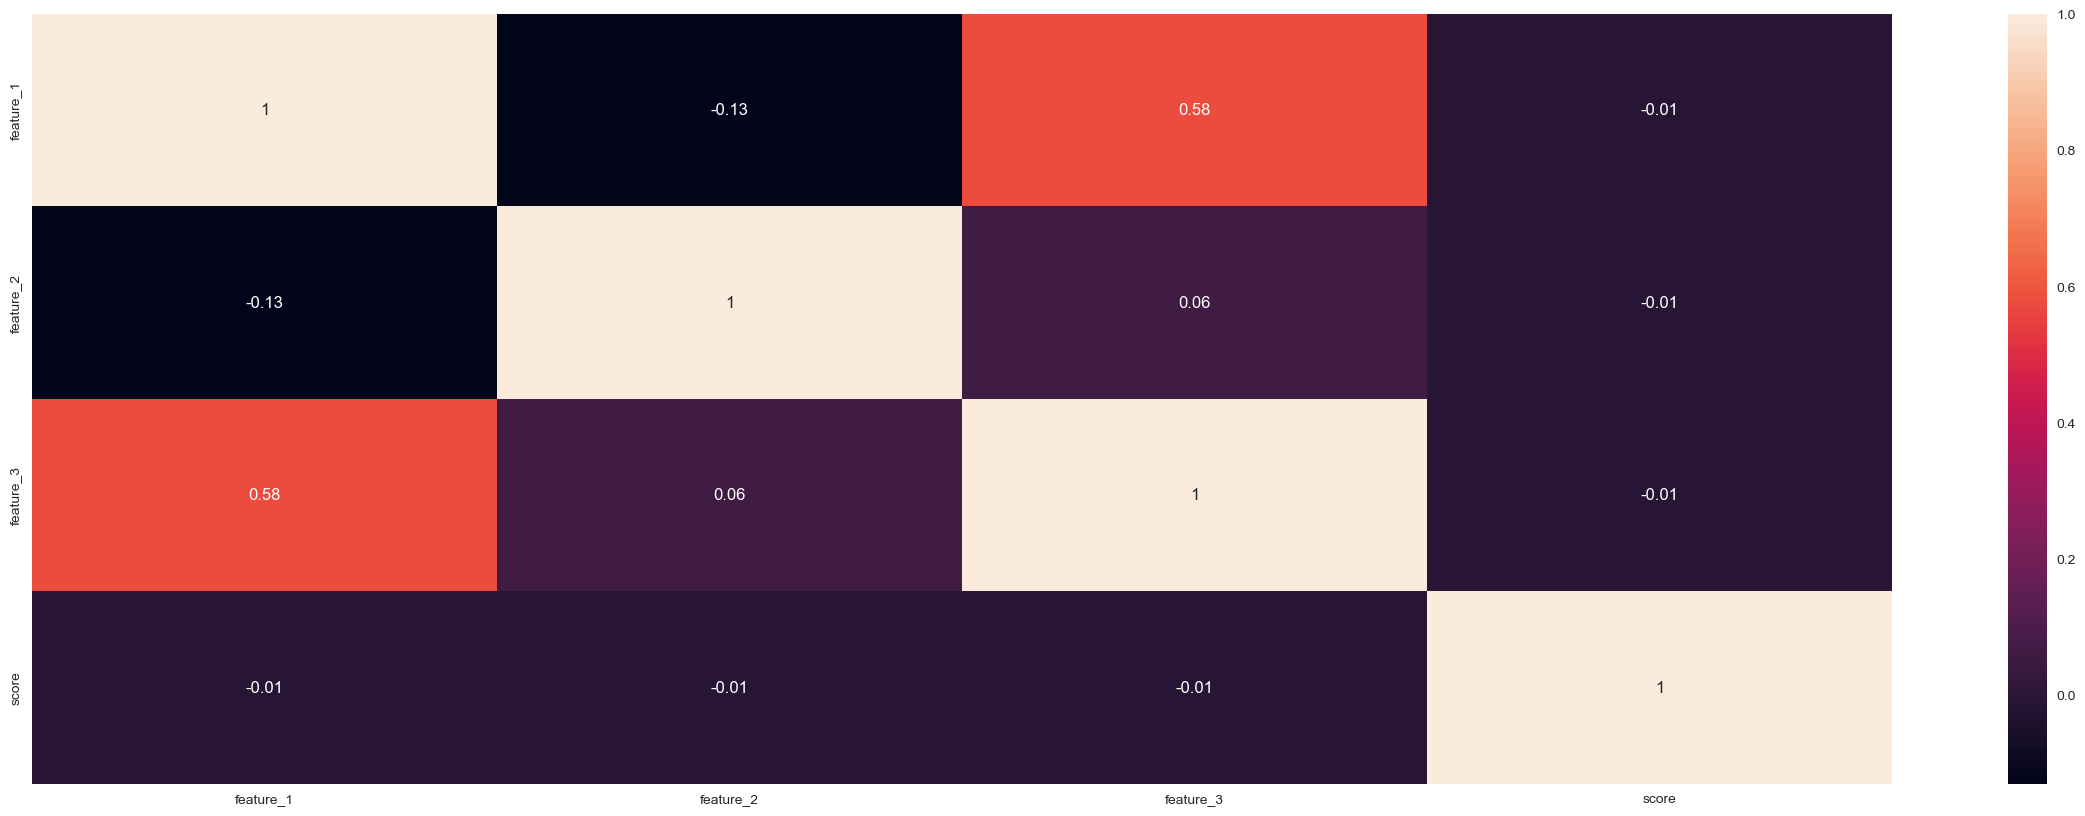

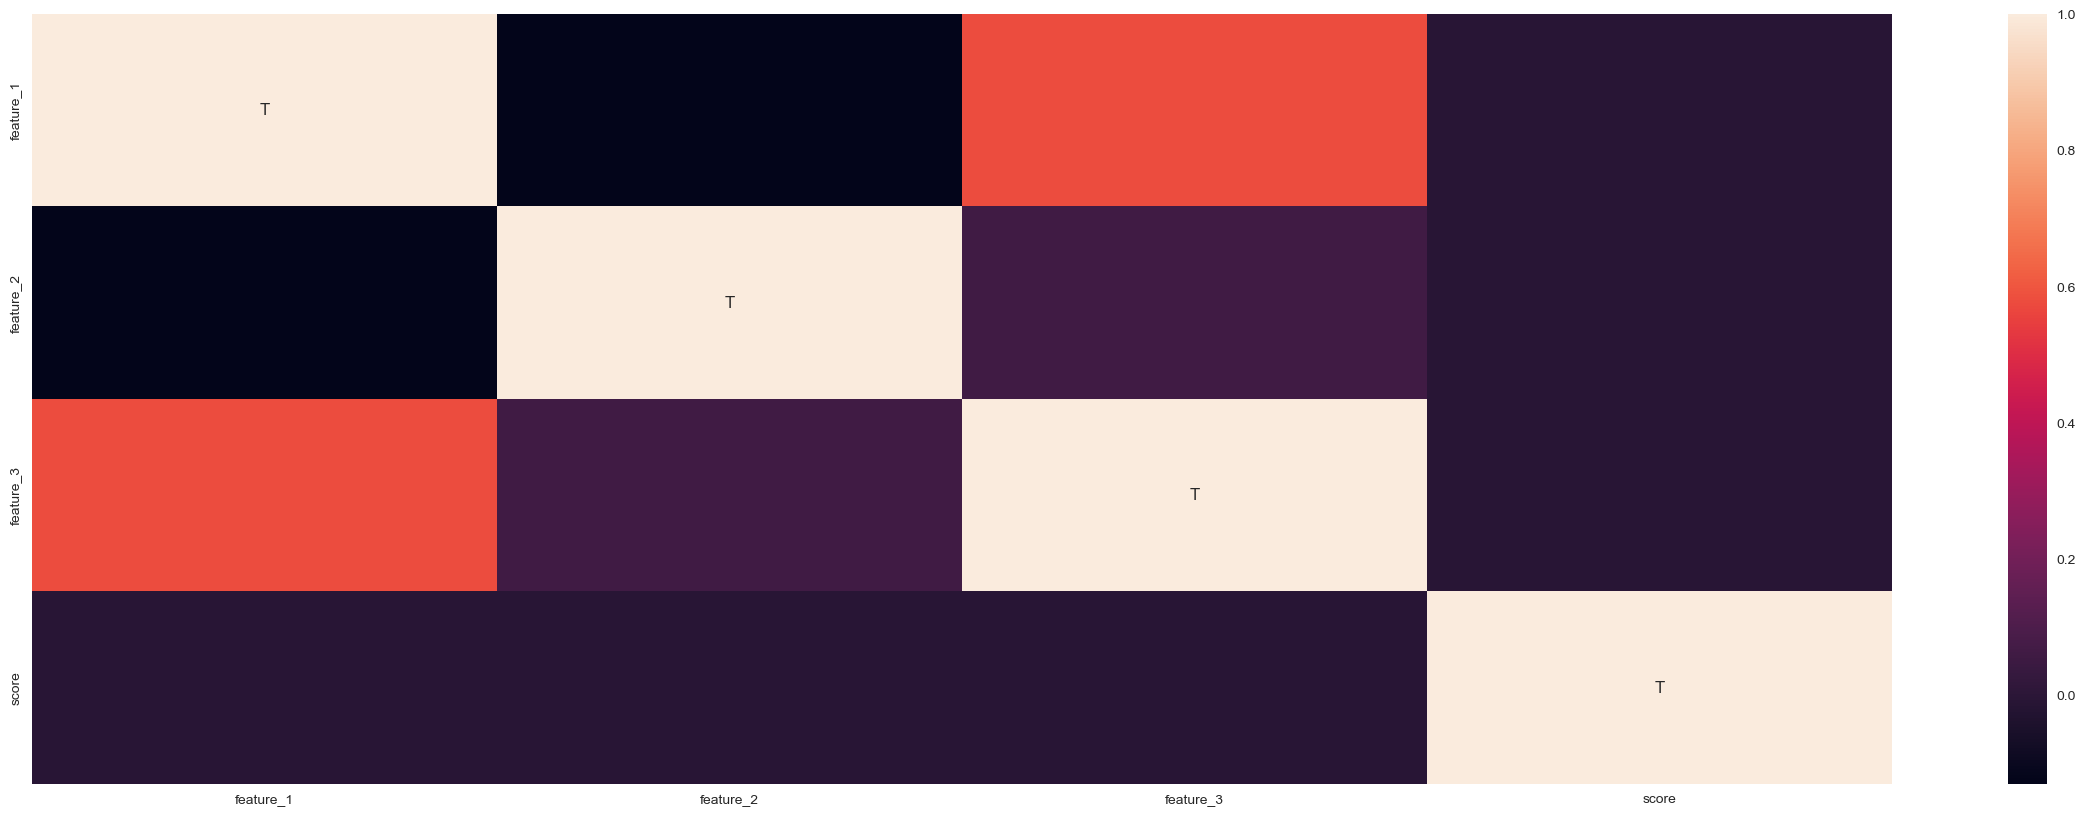

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
cor_df = userscore.corr(method = "pearson").round(2)
sns.heatmap(cor_df, ax=ax, annot=True)

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T'
# Plot hearmap with the annotations
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(cor_df, annot=annot_labels, fmt='')

In [ ]:
data= pd.merge(userscore, result, on='card_id',how = 'inner')
data

,card_id,first_active_month,feature_1,feature_2,feature_3,score,purchase_date,purchase_amount,month_lag,merchant_id,authorized_flag,city_id,merchant_category_id
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820,260,-0.638,-3.912,M_ID_1a81c358a3,Y,69,560
1,C_ID_92a2005557,Jun-17,5,2,1,-0.820,23,-0.576,1.478,M_ID_0703c10cc0,Y,69,278
2,C_ID_3d0044924f,Jan-17,4,1,0,0.393,350,-0.600,-5.031,M_ID_940fb4498f,Y,69,307
3,C_ID_3d0044924f,Jan-17,4,1,0,0.393,6,-0.726,1.500,M_ID_3b3dad217c,Y,69,307
4,C_ID_d639edf6cd,Aug-16,2,2,0,0.688,43,-0.678,-8.605,M_ID_5634fd83e0,Y,143,705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381223,C_ID_7666735b3d,Aug-17,4,3,0,0.093,3,-0.241,1.000,M_ID_1acf17675d,Y,251,80
381224,C_ID_73f5a0efd0,Jul-16,3,2,1,-4.677,26,-0.688,-3.346,M_ID_1e1f6cc067,Y,69,705
381225,C_ID_73f5a0efd0,Jul-16,3,2,1,-4.677,3,-0.712,1.333,M_ID_2a58616f9e,Y,69,206
381226,C_ID_92c9984c58,Jul-17,3,1,1,-1.859,134,-0.620,-5.082,M_ID_e5374dabc0,Y,-1,839


### Merge all data together

In [ ]:
total_data= pd.merge(merchants, data, on='merchant_id',how='inner')
total_data

,merchant_id,merchant_group_id,merchant_category_id_x,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,feature_1,feature_2,feature_3,score,purchase_date,purchase_amount,month_lag,authorized_flag,city_id_y,merchant_category_id_y
0,M_ID_c9855bf3e3,321,690,1,-0.057,-0.057,Y,E,E,1.000,...,1,2,0,4.806,11,-0.083,-5.455,Y,-1,690
1,M_ID_c9855bf3e3,321,690,1,-0.057,-0.057,Y,E,E,1.000,...,2,1,0,0.779,2,0.016,1.500,Y,-1,690
2,M_ID_c9855bf3e3,321,690,1,-0.057,-0.057,Y,E,E,1.000,...,2,3,0,5.708,30,0.323,-1.367,Y,-1,690
3,M_ID_c9855bf3e3,321,690,1,-0.057,-0.057,Y,E,E,1.000,...,2,1,0,-0.457,6,-0.279,-4.667,Y,-1,690
4,M_ID_c9855bf3e3,321,690,1,-0.057,-0.057,Y,E,E,1.000,...,2,2,0,1.540,2,-0.017,2.000,Y,-1,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430282,M_ID_cd2c0b07e9,35,606,17,-0.057,-0.057,N,A,A,0.900,...,2,2,0,0.699,152,-0.675,-2.487,Y,69,560
430283,M_ID_cd2c0b07e9,35,606,17,-0.057,-0.057,N,A,A,0.900,...,2,3,0,2.293,22,-0.565,-2.182,Y,69,278
430284,M_ID_cd2c0b07e9,35,606,17,-0.057,-0.057,N,A,A,0.900,...,5,1,1,-1.891,1,-0.678,2.000,Y,69,606
430285,M_ID_cd2c0b07e9,35,606,17,-0.057,-0.057,N,A,A,0.900,...,2,1,0,0.000,33,-0.718,-5.485,Y,69,606


In [ ]:
total_data= pd.merge(merchants, data, on='merchant_id',how='inner')
total_data

,merchant_id,merchant_group_id,merchant_category_id_x,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,feature_1,feature_2,feature_3,score,purchase_date,purchase_amount,month_lag,authorized_flag,city_id_y,merchant_category_id_y
0,M_ID_c9855bf3e3,321,690,1,-0.057,-0.057,Y,E,E,1.000,...,1,2,0,4.806,11,-0.083,-5.455,Y,-1,690
1,M_ID_c9855bf3e3,321,690,1,-0.057,-0.057,Y,E,E,1.000,...,2,1,0,0.779,2,0.016,1.500,Y,-1,690
2,M_ID_c9855bf3e3,321,690,1,-0.057,-0.057,Y,E,E,1.000,...,2,3,0,5.708,30,0.323,-1.367,Y,-1,690
3,M_ID_c9855bf3e3,321,690,1,-0.057,-0.057,Y,E,E,1.000,...,2,1,0,-0.457,6,-0.279,-4.667,Y,-1,690
4,M_ID_c9855bf3e3,321,690,1,-0.057,-0.057,Y,E,E,1.000,...,2,2,0,1.540,2,-0.017,2.000,Y,-1,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430282,M_ID_cd2c0b07e9,35,606,17,-0.057,-0.057,N,A,A,0.900,...,2,2,0,0.699,152,-0.675,-2.487,Y,69,560
430283,M_ID_cd2c0b07e9,35,606,17,-0.057,-0.057,N,A,A,0.900,...,2,3,0,2.293,22,-0.565,-2.182,Y,69,278
430284,M_ID_cd2c0b07e9,35,606,17,-0.057,-0.057,N,A,A,0.900,...,5,1,1,-1.891,1,-0.678,2.000,Y,69,606
430285,M_ID_cd2c0b07e9,35,606,17,-0.057,-0.057,N,A,A,0.900,...,2,1,0,0.000,33,-0.718,-5.485,Y,69,606


In [ ]:
total_data.describe()
total_data.describe(include="all")
total_data.info()

,merchant_group_id,merchant_category_id_x,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,...,category_2,feature_1,feature_2,feature_3,score,purchase_date,purchase_amount,month_lag,city_id_y,merchant_category_id_y
count,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,...,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000
mean,19492.726,490.459,21.296,3.194,3.112,22.101,4.120,3.000,24.264,7.318,...,1.830,3.093,1.745,0.565,-0.422,49.061,-0.536,-1.235,129.904,421.680
std,30965.807,207.511,11.918,17.033,16.848,4118.516,298.620,0.015,4372.833,276.966,...,1.377,1.180,0.753,0.496,3.662,85.009,0.888,3.046,104.415,259.689
min,2.000,2.000,1.000,-0.057,-0.057,0.330,0.333,1.000,0.160,0.167,...,1.000,1.000,1.000,0.000,-33.219,1.000,-0.747,-12.452,-1.000,-1.000
25%,35.000,307.000,7.000,-0.057,-0.057,0.940,0.949,3.000,0.880,0.919,...,1.000,2.000,1.000,0.000,-0.912,5.000,-0.687,-3.600,51.000,278.000
50%,840.000,511.000,20.000,-0.048,-0.057,1.010,1.021,3.000,1.020,1.028,...,1.000,3.000,2.000,1.000,-0.061,16.000,-0.634,-0.750,96.000,333.000
75%,28460.000,703.000,33.000,0.042,-0.038,1.110,1.109,3.000,1.160,1.162,...,3.000,4.000,2.000,1.000,0.704,57.000,-0.527,1.500,212.000,705.000
max,112586.000,891.000,41.000,183.735,182.079,851844.640,61851.333,3.000,1513959.000,56077.500,...,5.000,5.000,3.000,1.000,17.965,2912.000,238.047,2.000,347.000,891.000


,merchant_id,merchant_group_id,merchant_category_id_x,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,feature_1,feature_2,feature_3,score,purchase_date,purchase_amount,month_lag,authorized_flag,city_id_y,merchant_category_id_y
count,430287,430287.000,430287.000,430287.000,430287.000,430287.000,430287,430287,430287,430287.000,...,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287,430287.000,430287.000
unique,85262,NaN,NaN,NaN,NaN,NaN,2,5,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,M_ID_00a6ca8a8a,NaN,NaN,NaN,NaN,NaN,N,A,A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
freq,95286,NaN,NaN,NaN,NaN,NaN,283929,147195,150347,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,427212,NaN,NaN
mean,NaN,19492.726,490.459,21.296,3.194,3.112,NaN,NaN,NaN,22.101,...,3.093,1.745,0.565,-0.422,49.061,-0.536,-1.235,NaN,129.904,421.680
std,NaN,30965.807,207.511,11.918,17.033,16.848,NaN,NaN,NaN,4118.516,...,1.180,0.753,0.496,3.662,85.009,0.888,3.046,NaN,104.415,259.689
min,NaN,2.000,2.000,1.000,-0.057,-0.057,NaN,NaN,NaN,0.330,...,1.000,1.000,0.000,-33.219,1.000,-0.747,-12.452,NaN,-1.000,-1.000
25%,NaN,35.000,307.000,7.000,-0.057,-0.057,NaN,NaN,NaN,0.940,...,2.000,1.000,0.000,-0.912,5.000,-0.687,-3.600,NaN,51.000,278.000
50%,NaN,840.000,511.000,20.000,-0.048,-0.057,NaN,NaN,NaN,1.010,...,3.000,2.000,1.000,-0.061,16.000,-0.634,-0.750,NaN,96.000,333.000
75%,NaN,28460.000,703.000,33.000,0.042,-0.038,NaN,NaN,NaN,1.110,...,4.000,2.000,1.000,0.704,57.000,-0.527,1.500,NaN,212.000,705.000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 430287 entries, 0 to 430286
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  430287 non-null  object 
 1   merchant_group_id            430287 non-null  int64  
 2   merchant_category_id_x       430287 non-null  int64  
 3   subsector_id                 430287 non-null  int64  
 4   numerical_1                  430287 non-null  float64
 5   numerical_2                  430287 non-null  float64
 6   category_1                   430287 non-null  object 
 7   most_recent_sales_range      430287 non-null  object 
 8   most_recent_purchases_range  430287 non-null  object 
 9   avg_sales_lag3               430287 non-null  float64
 10  avg_purchases_lag3           430287 non-null  float64
 11  active_months_lag3           430287 non-null  int64  
 12  avg_sales_lag6               430287 non-null  float64
 13 

###  Check Normality for "score" col

In [1]:
# fig = px.box(total_data, y = 'score')
# fig.show()

# fig = px.histogram(total_data, x = 'score')
# fig.show()


# # Visualize and calculate the skewness
# skewness = total_data.skew().sort_values(ascending=False)
# skewness[abs(skewness) > 1]

# def normality_plot(X):
#     """
#     1. Draw distribution plot with normal distribution fitted curve
#     2. Draw Quantile-Quantile plot
#     """
#     fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#     sns.distplot(X, fit=norm, ax=axes[0])
#     axes[0].set_title('Distribution Plot')

#     axes[1] = stats.probplot((X), plot=plt)
#     plt.tight_layout()

# normality_plot(total_data['score'])

### Check NULL

In [ ]:
total_data.isnull().values.sum()

0

In [ ]:
# Calculate the percentage of null values in each column
null_percentages = total_data.isnull().sum() / len(total_data) * 100

# Print the results
print(null_percentages)

merchant_id                   0.000
merchant_group_id             0.000
merchant_category_id_x        0.000
subsector_id                  0.000
numerical_1                   0.000
numerical_2                   0.000
category_1                    0.000
most_recent_sales_range       0.000
most_recent_purchases_range   0.000
avg_sales_lag3                0.000
avg_purchases_lag3            0.000
active_months_lag3            0.000
avg_sales_lag6                0.000
avg_purchases_lag6            0.000
active_months_lag6            0.000
avg_sales_lag12               0.000
avg_purchases_lag12           0.000
active_months_lag12           0.000
category_4                    0.000
city_id_x                     0.000
state_id                      0.000
category_2                    0.000
card_id                       0.000
first_active_month            0.000
feature_1                     0.000
feature_2                     0.000
feature_3                     0.000
score                       

{'whiskers': [<matplotlib.lines.Line2D at 0x20b1e456ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x20b20d270a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b1e4567f0>],
 'medians': [<matplotlib.lines.Line2D at 0x20b20d27640>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b20d27910>],
 'means': []}

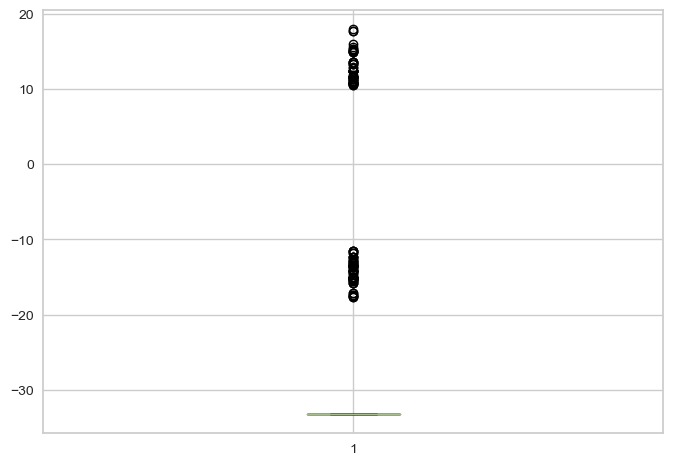

In [ ]:
# Calculate z-scores for column B
z_scores = (total_data['score'] - total_data['score'].mean()) / total_data['score'].std()

# Find values that are more than 3 standard deviations away from the mean
outliers = total_data.loc[abs(z_scores) > 3, 'score']

# Plot the outliers
plt.boxplot(outliers)
plt.show()

### Check Normality for 'score' column

In [ ]:
#seems that the score does not follow normal distribution, let's perform statistical test.
# Shapiro-wilk test
w, pvalue = stats.shapiro(total_data['score']) #p value obtained from the Shapiro-Wilk test is significant (p < 0.05), we conclude that the data is not normally distribute
print("p = {:g}".format(pvalue))

# D’Agostino-Pearson’s K² test, ref https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
k2, p = stats.normaltest(total_data['score'])
alpha = 1e-3
print("p = {:g}".format(p))
p = 8.4713e-19
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
p = 0
The null hypothesis can be rejected


C:\Users\Lap-5\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



- After shapiro-wilk test to test if "score" col follow normal distribution or not
    - the result as shown is rejecting null hypothesis which mean score col isn't follow normal distribution

In [ ]:
# check categorical and ordinal features
category_data = total_data.select_dtypes(include=['object', 'category'])
for col in total_data.columns:
    print(total_data[col].value_counts()) # to print count of every category

M_ID_00a6ca8a8a    95286
M_ID_9139332ccc     7571
M_ID_e5374dabc0     5371
M_ID_fc7d7969c3     3997
M_ID_50f575c681     2083
                   ...  
M_ID_61157443c9        1
M_ID_2f4ed73041        1
M_ID_3e40f7b03a        1
M_ID_6d75a3053f        1
M_ID_1a5278a627        1
Name: merchant_id, Length: 85262, dtype: int64
35        191753
1145        6664
104706      3997
321         2644
176         2336
           ...  
111890         1
108011         1
77069          1
63378          1
100166         1
Name: merchant_group_id, Length: 47346, dtype: int64
511    105736
705     74803
307     36710
80      18211
278     17285
        ...  
334         1
546         1
83          1
261         1
249         1
Name: merchant_category_id_x, Length: 279, dtype: int64
7     110762
33     75291
37     38639
19     37865
34     26829
27     20628
16     17155
29     16780
8      11129
21      9864
1       9072
15      8960
18      5304
22      4987
20      4129
36      4121
25      3377
30     

In [ ]:
# make a a list of different columns which we see useless
dropped=["merchant_id","card_id"]
total_data.drop(dropped, axis=1, inplace=True)

####  Detect if multicollinearity exists in selected features ?

### Check Correlation

<AxesSubplot:>

<AxesSubplot:>

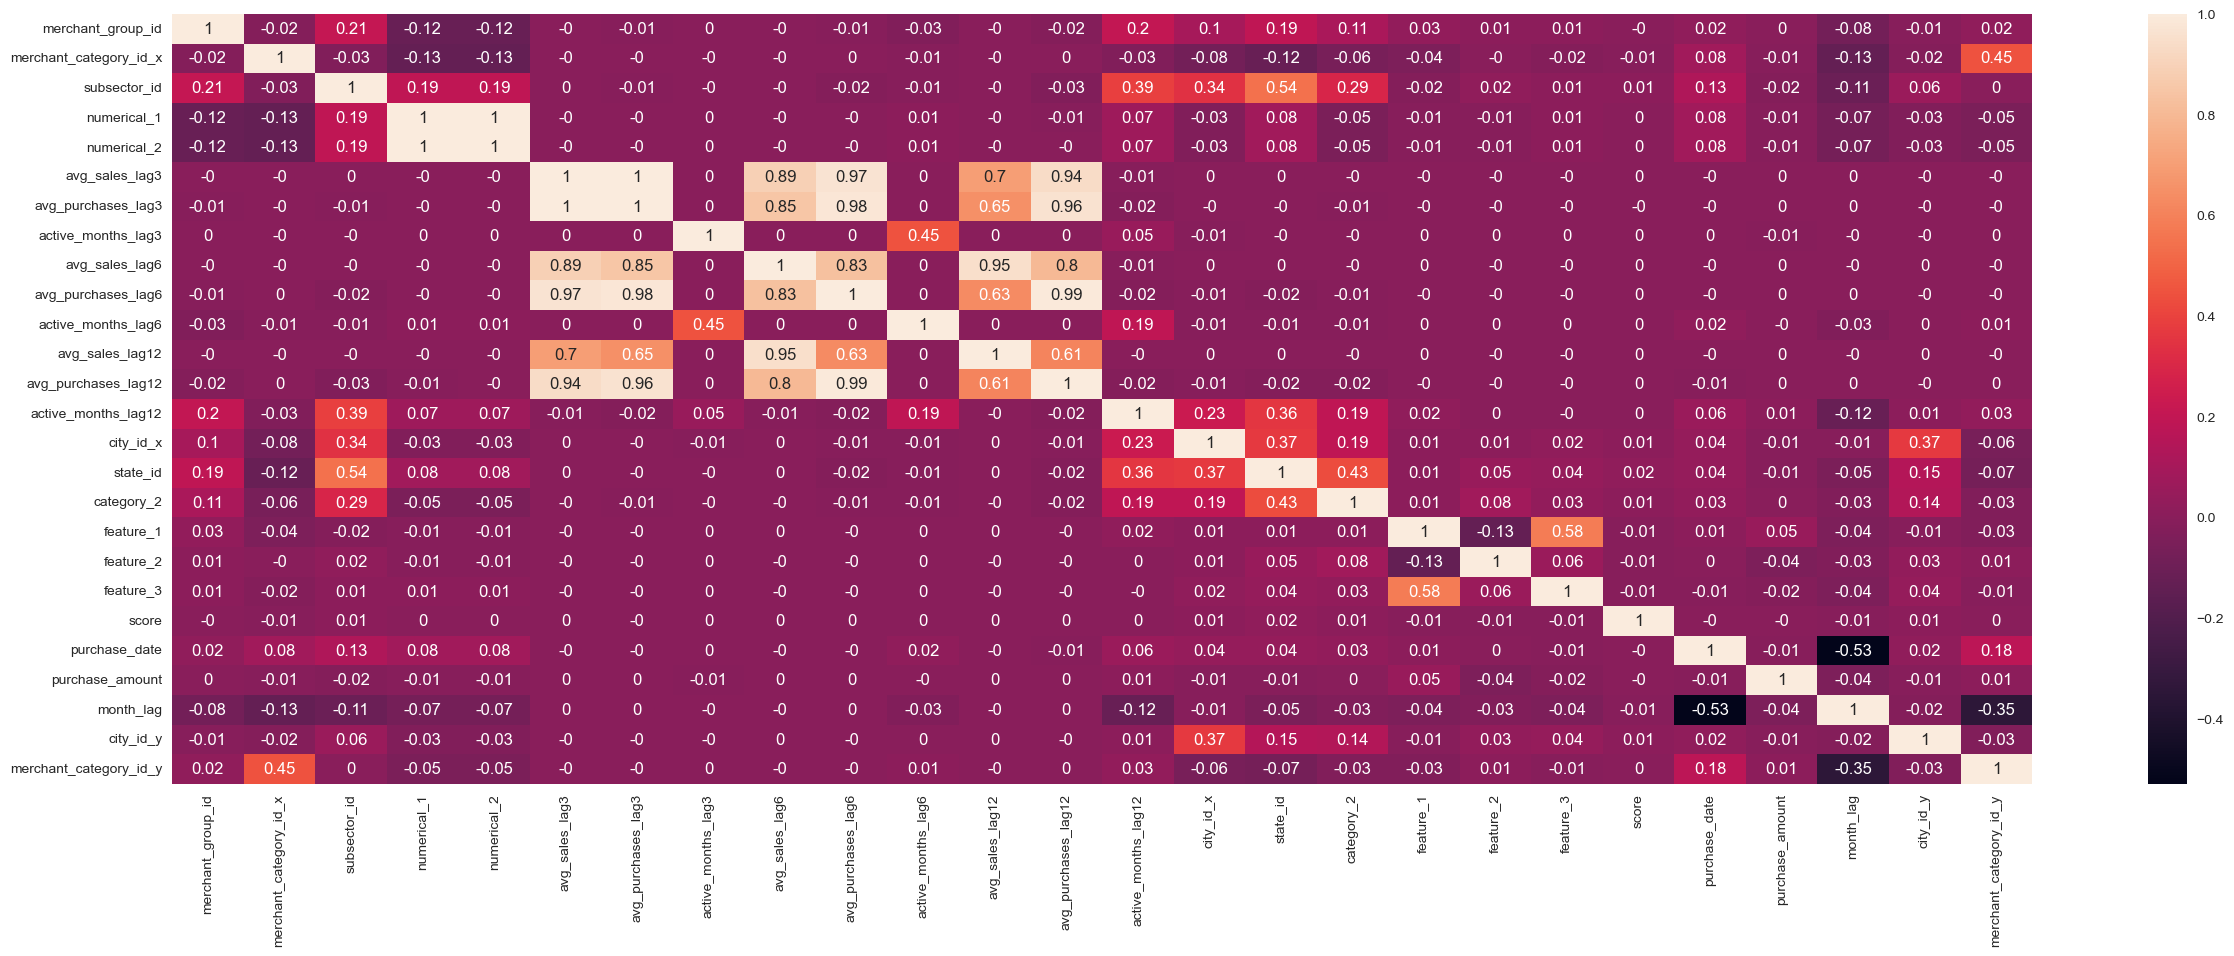

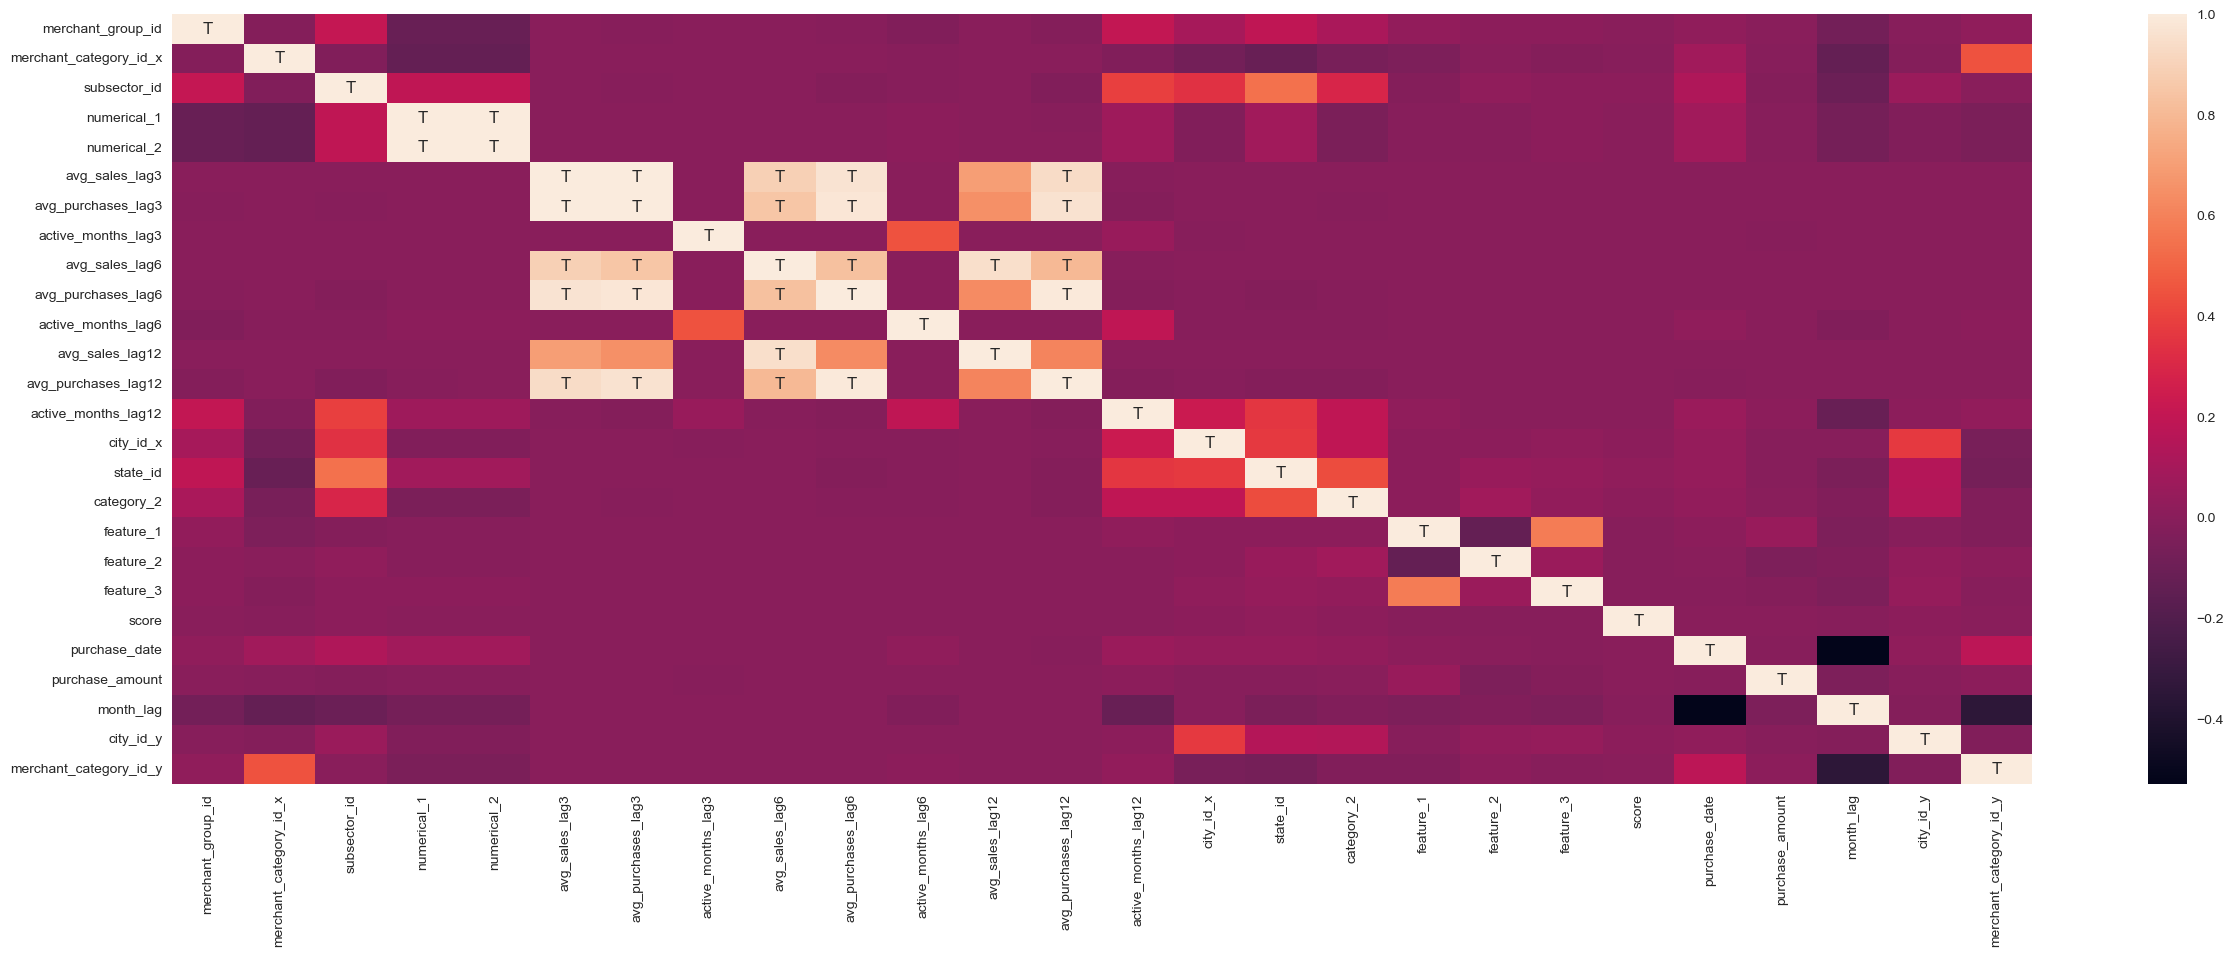

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
cor_df = total_data.corr(method = "pearson").round(2)
sns.heatmap(cor_df, ax=ax, annot=True)

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T'
# Plot hearmap with the annotations
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(cor_df, annot=annot_labels, fmt='')

<AxesSubplot:>

<AxesSubplot:>

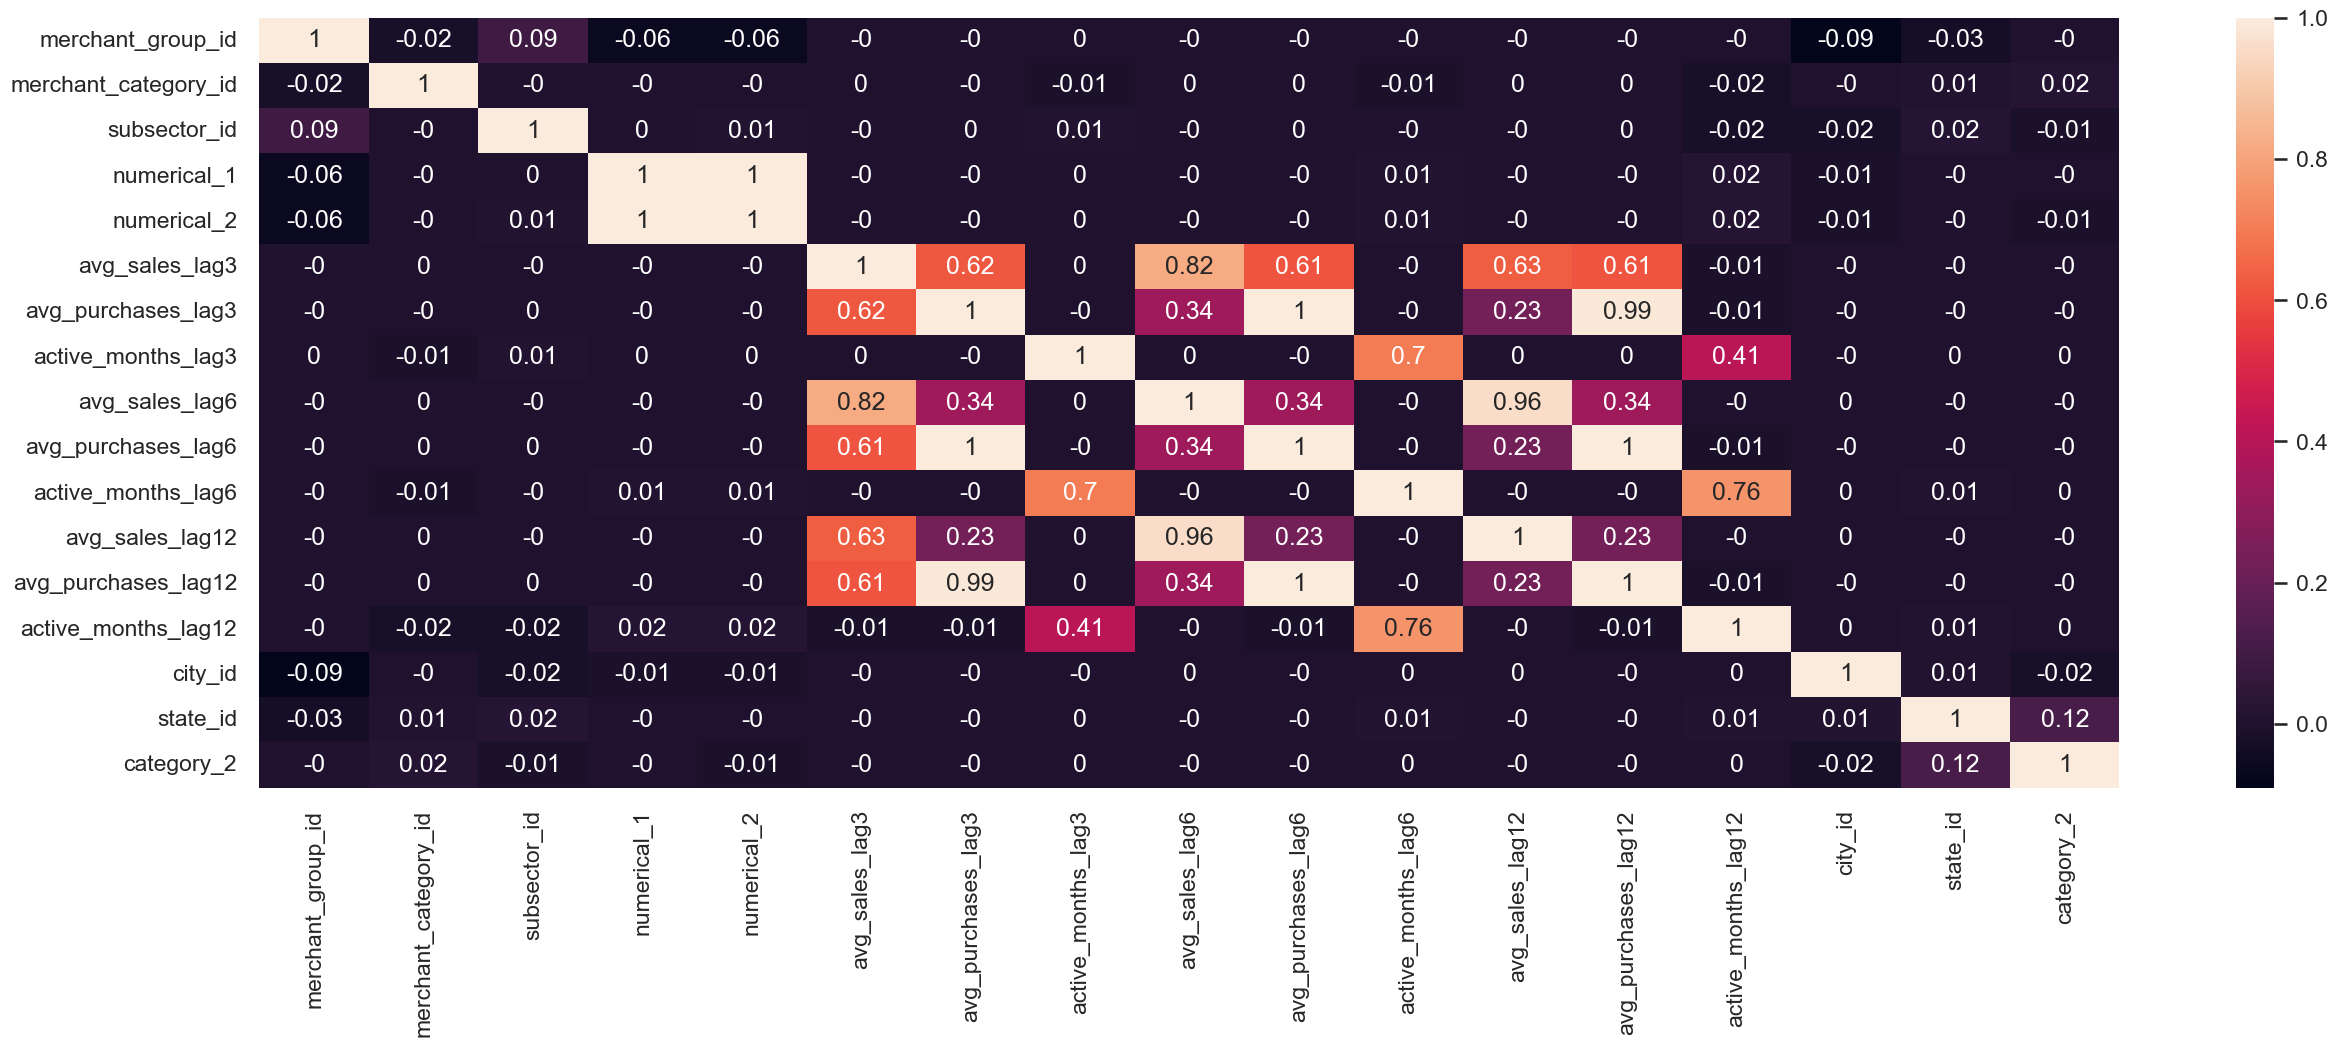

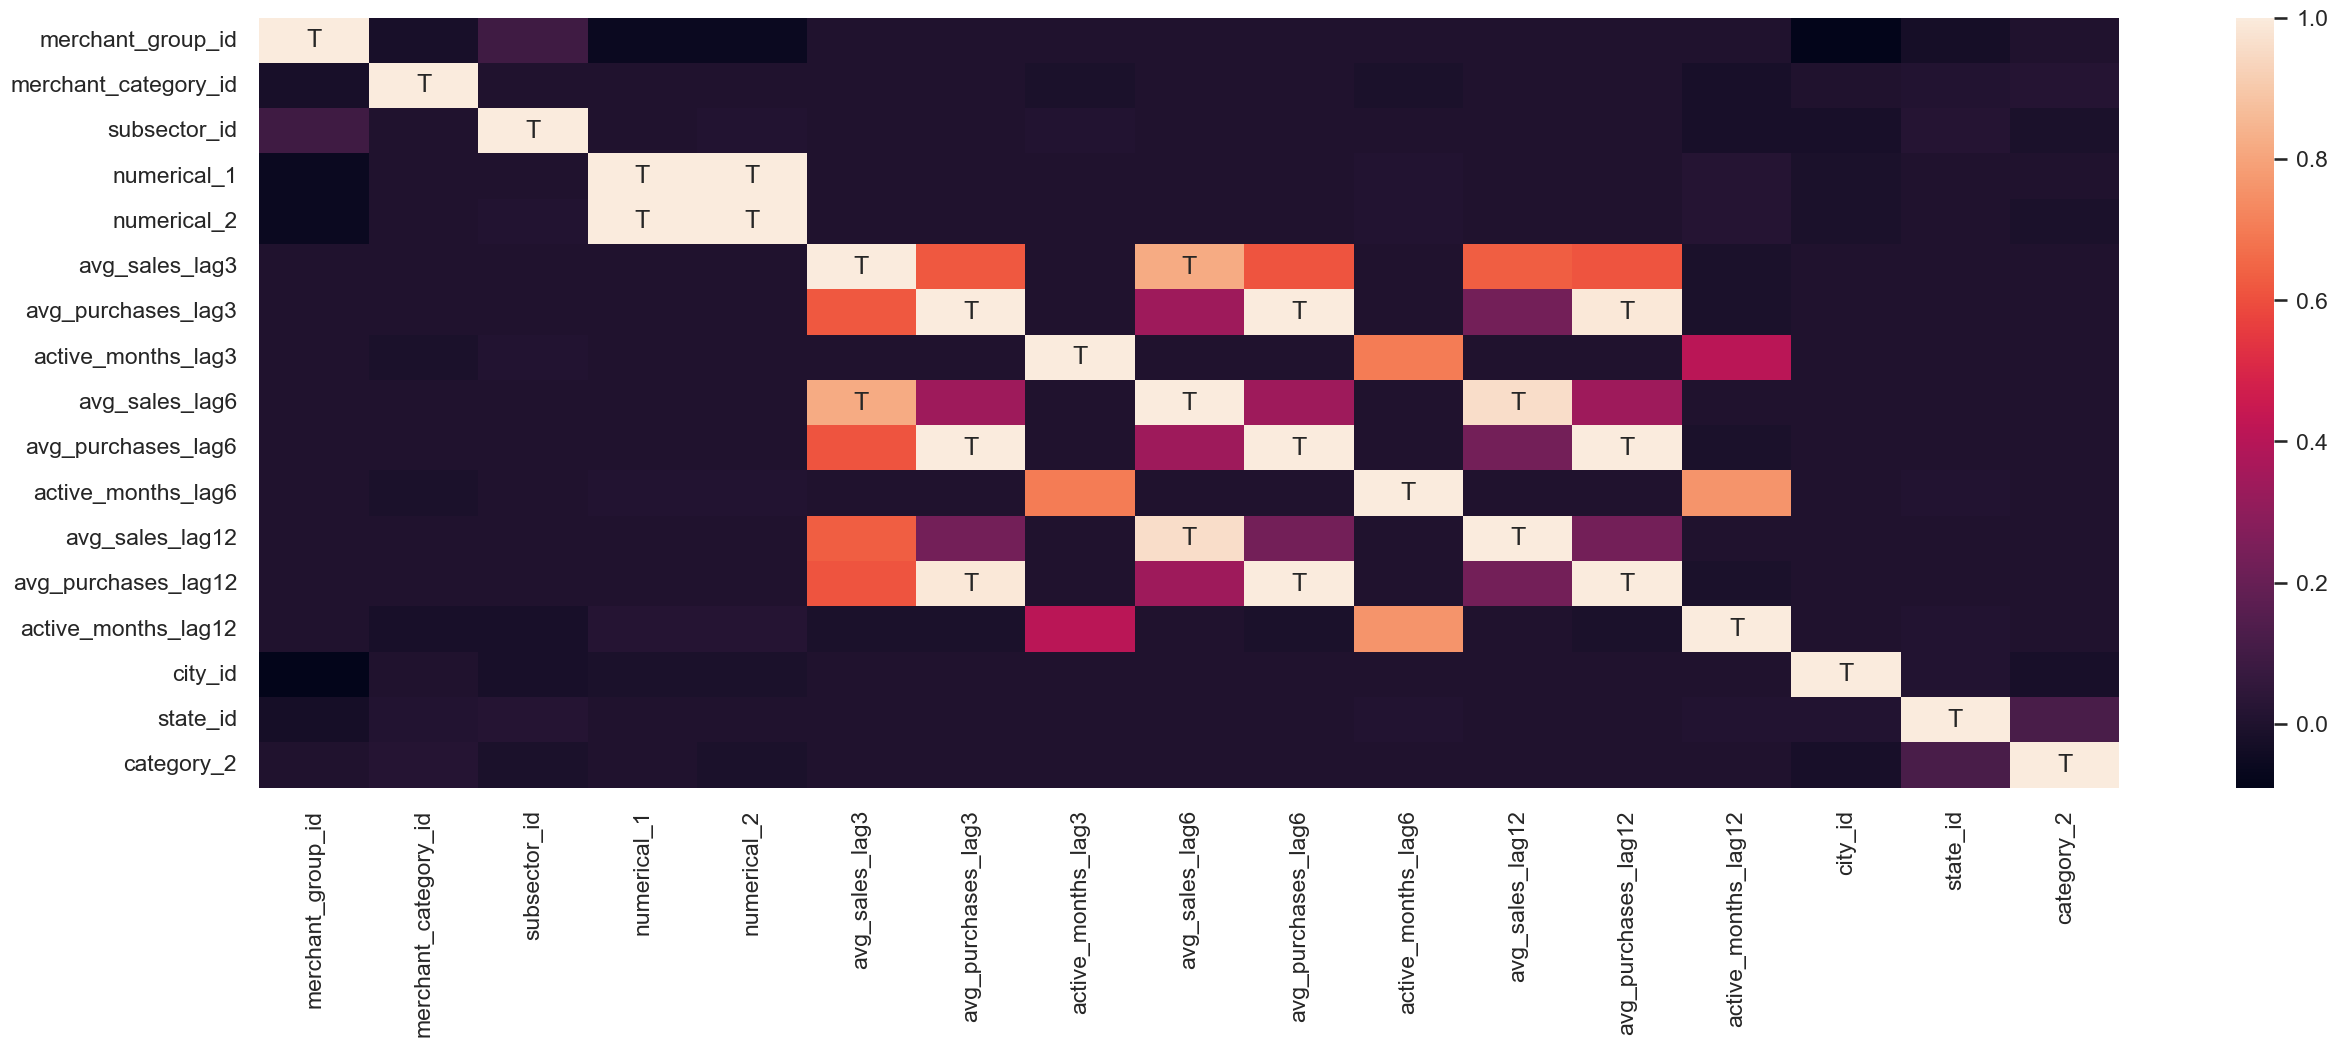

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
cor_df = merchants.corr(method = "pearson").round(2)
sns.heatmap(cor_df, ax=ax, annot=True)

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T'
# Plot hearmap with the annotations
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(cor_df, annot=annot_labels, fmt='')

- from this above correlation map , i will drop useless cols.

- Yes, There is a multicollinearity in our total_data,as many of attributes has a high correlation with others so, i will drop some of them as they are useless.(as shown in the code)

In [ ]:
# make a a list of different columns which we see useless
dropped=["numerical_1","avg_sales_lag6","active_months_lag6",
         "avg_purchases_lag6","avg_purchases_lag12"]
total_data.drop(dropped, axis=1, inplace=True)

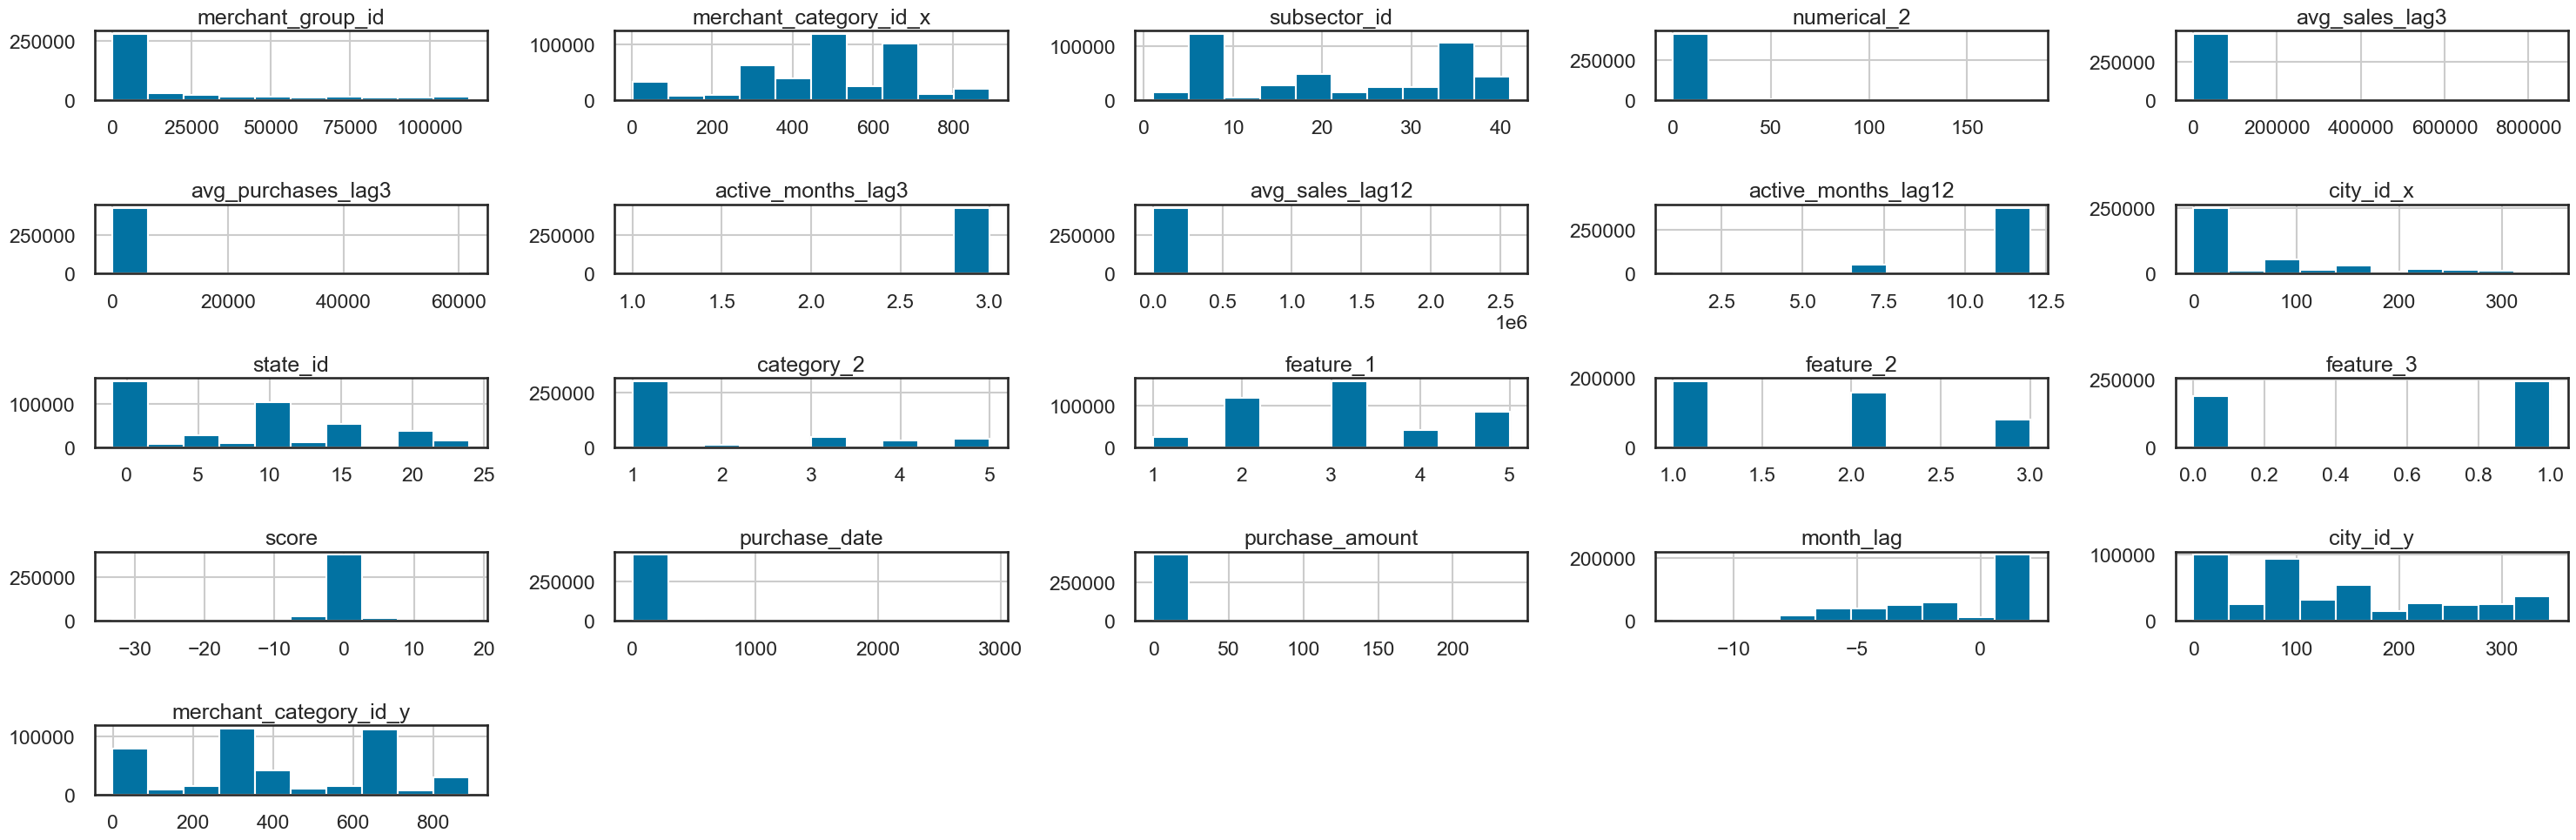

In [ ]:
# Visualize distribution of each feature
total_data.hist(figsize=(30,10))
plt.tight_layout();

In [ ]:
# deal with condition and quality attributes
def OrdinalsToNumerics(input_data):
    input_data['category_1'] = input_data['category_1'].map(lambda x: {'Y':5,'N':1}.get(x, 0))
    input_data['most_recent_sales_range'] = input_data['most_recent_sales_range'].map(lambda x: {'E':1, 'D':2, 'C':3, 'B':4, 'A':5}.get(x, 0))

    input_data['most_recent_purchases_range'] = input_data['most_recent_purchases_range'].map(lambda x: {'E':1, 'D':2, 'C':3, 'B':4, 'A':5}.get(x, 0))
    input_data['authorized_flag'] = input_data['authorized_flag'].map(lambda x: {'Y':5,'N':1 }.get(x, 0))


    ordinal_cols = ['category_1', 'most_recent_sales_range', 'most_recent_purchases_range','authorized_flag']

    input_data[ordinal_cols] = input_data[ordinal_cols].apply(pd.to_numeric, axis=1)

OrdinalsToNumerics(total_data)

In [ ]:
total_data
total_data.info()

,merchant_group_id,merchant_category_id_x,subsector_id,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,...,feature_1,feature_2,feature_3,score,purchase_date,purchase_amount,month_lag,authorized_flag,city_id_y,merchant_category_id_y
0,321,690,1,-0.057,5,1,1,1.000,1084.000,3,...,1,2,0,4.806,11,-0.083,-5.455,5,-1,690
1,321,690,1,-0.057,5,1,1,1.000,1084.000,3,...,2,1,0,0.779,2,0.016,1.500,5,-1,690
2,321,690,1,-0.057,5,1,1,1.000,1084.000,3,...,2,3,0,5.708,30,0.323,-1.367,5,-1,690
3,321,690,1,-0.057,5,1,1,1.000,1084.000,3,...,2,1,0,-0.457,6,-0.279,-4.667,5,-1,690
4,321,690,1,-0.057,5,1,1,1.000,1084.000,3,...,2,2,0,1.540,2,-0.017,2.000,5,-1,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430282,35,606,17,-0.057,1,5,5,0.900,0.914,3,...,2,2,0,0.699,152,-0.675,-2.487,5,69,560
430283,35,606,17,-0.057,1,5,5,0.900,0.914,3,...,2,3,0,2.293,22,-0.565,-2.182,5,69,278
430284,35,606,17,-0.057,1,5,5,0.900,0.914,3,...,5,1,1,-1.891,1,-0.678,2.000,5,69,606
430285,35,606,17,-0.057,1,5,5,0.900,0.914,3,...,2,1,0,0.000,33,-0.718,-5.485,5,69,606


<class 'pandas.core.frame.DataFrame'>
Int64Index: 430287 entries, 0 to 430286
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_group_id            430287 non-null  int64  
 1   merchant_category_id_x       430287 non-null  int64  
 2   subsector_id                 430287 non-null  int64  
 3   numerical_2                  430287 non-null  float64
 4   category_1                   430287 non-null  int64  
 5   most_recent_sales_range      430287 non-null  int64  
 6   most_recent_purchases_range  430287 non-null  int64  
 7   avg_sales_lag3               430287 non-null  float64
 8   avg_purchases_lag3           430287 non-null  float64
 9   active_months_lag3           430287 non-null  int64  
 10  avg_sales_lag12              430287 non-null  float64
 11  active_months_lag12          430287 non-null  int64  
 12  category_4                   430287 non-null  object 
 13 

> As there are two object , I will convert them using labelEncoder

In [ ]:

from sklearn.preprocessing import LabelEncoder



# Create a label encoder
encoder = LabelEncoder()

# Encode the categorical features
for column in total_data.select_dtypes(include='object'):
    total_data[column] = encoder.fit_transform(total_data[column])

# Save the encoded data
total_data.to_csv('encoded_data.csv', index=False)

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430287 entries, 0 to 430286
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_group_id            430287 non-null  int64  
 1   merchant_category_id_x       430287 non-null  int64  
 2   subsector_id                 430287 non-null  int64  
 3   numerical_2                  430287 non-null  float64
 4   category_1                   430287 non-null  int64  
 5   most_recent_sales_range      430287 non-null  int64  
 6   most_recent_purchases_range  430287 non-null  int64  
 7   avg_sales_lag3               430287 non-null  float64
 8   avg_purchases_lag3           430287 non-null  float64
 9   active_months_lag3           430287 non-null  int64  
 10  avg_sales_lag12              430287 non-null  float64
 11  active_months_lag12          430287 non-null  int64  
 12  category_4                   430287 non-null  int32  
 13 

> Save the label value in variable as i will drop it to create model with k-means

In [ ]:
score_col=total_data['score']

In [ ]:
total_data.drop('score', axis=1, inplace=True)

In [ ]:
# feature normalization, you can also try what if not performing this step.
scaler = StandardScaler()
feat_scaled = scaler.fit_transform(total_data)

feat_scaled = pd.DataFrame(total_data)
feat_scaled.describe()

,merchant_group_id,merchant_category_id_x,subsector_id,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,...,first_active_month,feature_1,feature_2,feature_3,purchase_date,purchase_amount,month_lag,authorized_flag,city_id_y,merchant_category_id_y
count,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,...,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000,430287.000
mean,19492.726,490.459,21.296,3.112,2.361,3.352,3.379,22.101,4.120,3.000,...,40.866,3.093,1.745,0.565,49.061,-0.536,-1.235,4.971,129.904,421.680
std,30965.807,207.511,11.918,16.848,1.895,1.487,1.476,4118.516,298.620,0.015,...,22.680,1.180,0.753,0.496,85.009,0.888,3.046,0.337,104.415,259.689
min,2.000,2.000,1.000,-0.057,1.000,1.000,1.000,0.330,0.333,1.000,...,0.000,1.000,1.000,0.000,1.000,-0.747,-12.452,1.000,-1.000,-1.000
25%,35.000,307.000,7.000,-0.057,1.000,2.000,2.000,0.940,0.949,3.000,...,18.000,2.000,1.000,0.000,5.000,-0.687,-3.600,5.000,51.000,278.000
50%,840.000,511.000,20.000,-0.057,1.000,3.000,3.000,1.010,1.021,3.000,...,42.000,3.000,2.000,1.000,16.000,-0.634,-0.750,5.000,96.000,333.000
75%,28460.000,703.000,33.000,-0.038,5.000,5.000,5.000,1.110,1.109,3.000,...,62.000,4.000,2.000,1.000,57.000,-0.527,1.500,5.000,212.000,705.000
max,112586.000,891.000,41.000,182.079,5.000,5.000,5.000,851844.640,61851.333,3.000,...,74.000,5.000,3.000,1.000,2912.000,238.047,2.000,5.000,347.000,891.000
